In [8]:
import numpy as np
import scipy.misc
import cv2

import glob

import matplotlib.pyplot as plt
import thinning as th
%matplotlib inline

In [9]:
scale = 1./16. #0.125
conversion = 0.345

In [10]:
masks = glob.glob('./masks_170719/*.tif')
result_dir = './results_170719/'
masks

['./masks_170719/Mask7-3a-1.tif',
 './masks_170719/BOX3-3 - DAPImask.tif',
 './masks_170719/BOX2-4 - DAPImask.tif',
 './masks_170719/Mask7-3-1.tif',
 './masks_170719/Mask10-6a-2.tif',
 './masks_170719/_BOX10-7__TUNEL_HOECST_01_01 - DAPImask.tif',
 './masks_170719/_BOX9-5__TUNEL_HOECST_01_01 - DAPImask.tif',
 './masks_170719/_BOX1-2__TUNEL_HOECST_01_01 - DAPImask.tif',
 './masks_170719/Mask6-2a-2.tif',
 './masks_170719/Mask7-3-2.tif',
 './masks_170719/BOX4-2 - DAPI mask.tif',
 './masks_170719/_BOX4-1__TUNEL_HOECST_01_01 - DAPI mask.tif',
 './masks_170719/_BOX3bis-3__TUNEL_HOECST_01_01 - DAPI mask.tif',
 './masks_170719/BOX1-1 - DAPImask.tif',
 './masks_170719/Mask6-2bis.tif',
 './masks_170719/BOX10-7 DAPI mask.tif',
 './masks_170719/Mask10-6-1.tif',
 './masks_170719/_BOX1-5__TUNEL_HOECST_01_01 - DAPImask.tif',
 './masks_170719/BOX5-1 DAPI mask.tif',
 './masks_170719/BOX8-4 - DAPI mask.tif',
 './masks_170719/_BOX3-4__TUNEL_HOECST_01_01 - DAPImask.tif',
 './masks_170719/Mask3-4-1.tif',
 '

In [11]:
results = {}

In [14]:
for filename in masks:
    mask_name = str.split(str.split(filename,'/')[-1],'.')[0]
    #read
    mask = cv2.imread(filename)
    #rescale
    mask1 = scipy.misc.imresize(mask, scale) 
    #grayscale
    mask_g = cv2.cvtColor(mask1, cv2.COLOR_BGR2GRAY)
    #threshold
    ret, mask_bw = cv2.threshold(mask_g, 127, 255, cv2.THRESH_BINARY)
    #invert
    mask_bw = 255 - mask_bw
    # write mask to file
    cv2.imwrite(result_dir+mask_name+'_msk.jpg',mask_bw)
    # thinning algo
    bw2 = th.thinning(mask_bw)
    # save thinned image
    cv2.imwrite(result_dir+mask_name+'_thin.jpg',bw2)
    # distance transform
    dist = cv2.distanceTransform(mask_bw, cv2.DIST_L2, cv2.DIST_MASK_PRECISE)
    # save dist transf image
    cv2.imwrite(result_dir+mask_name+'_dt.jpg',dist)
    # compute thickness
    th_values = 2*dist[np.where(bw2>0.0)] / scale * conversion
    results[mask_name] = (np.mean(th_values), np.std(th_values), len(th_values))

In [15]:
print results

{'_BOX4-2__TUNEL_HOECST_01_01 - DAPI mask': (54.74654, 25.19488, 2071), 'Mask10-6a-2': (59.279774, 22.555094, 1501), 'Mask10-6a-1': (61.364601, 24.605206, 1532), 'Mask7-3-1': (55.198166, 20.497149, 1282), 'Mask7-3-2': (55.532593, 20.202278, 1174), '_BOX3-4__TUNEL_HOECST_01_01 - DAPImask': (58.308002, 24.281765, 1388), 'Mask7-3a-2': (57.612545, 19.401108, 1385), 'BOX8-4 - DAPI mask': (48.907688, 19.690081, 1378), 'Mask6-2bis': (55.543636, 23.634817, 1329), '_BOX3bis-3__TUNEL_HOECST_01_01 - DAPI mask': (54.071598, 24.266106, 1386), '_BOX8-4__TUNEL_HOECST_01_01 - DAPImask': (55.58173, 21.779799, 1356), 'Mask6-2a-1': (58.634186, 22.21653, 1276), 'Mask10-6-2': (56.641079, 24.972195, 1440), 'Mask10-6-1': (56.150646, 21.777122, 1418), 'Mask6-2a-2': (56.604553, 20.613455, 1416), 'BOX10-7 DAPI mask': (52.734959, 22.148426, 1309), 'BOX7-3-DAPImask': (48.745796, 16.6047, 1065), '___BOX2-4TUNEL-HOECST_01_01 - DAPImask': (58.675579, 23.418438, 1462), 'Mask3-4': (58.37431, 23.342072, 1562), 'Mask7-3

/home/claudio/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


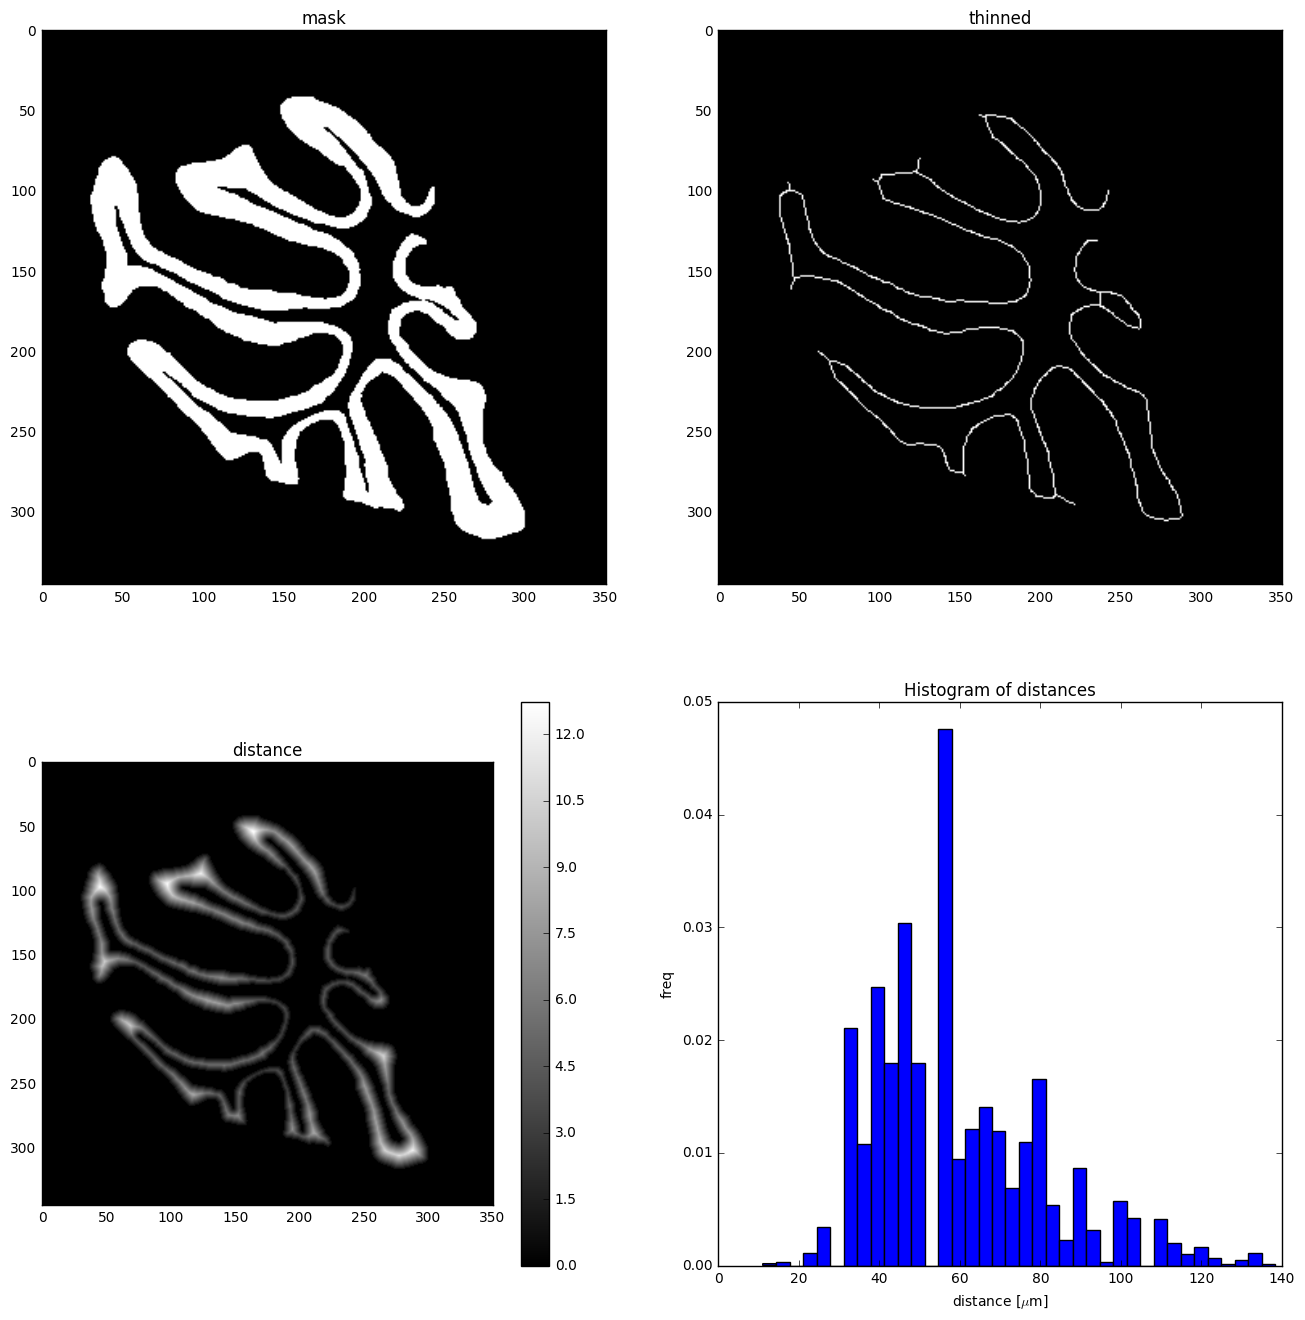

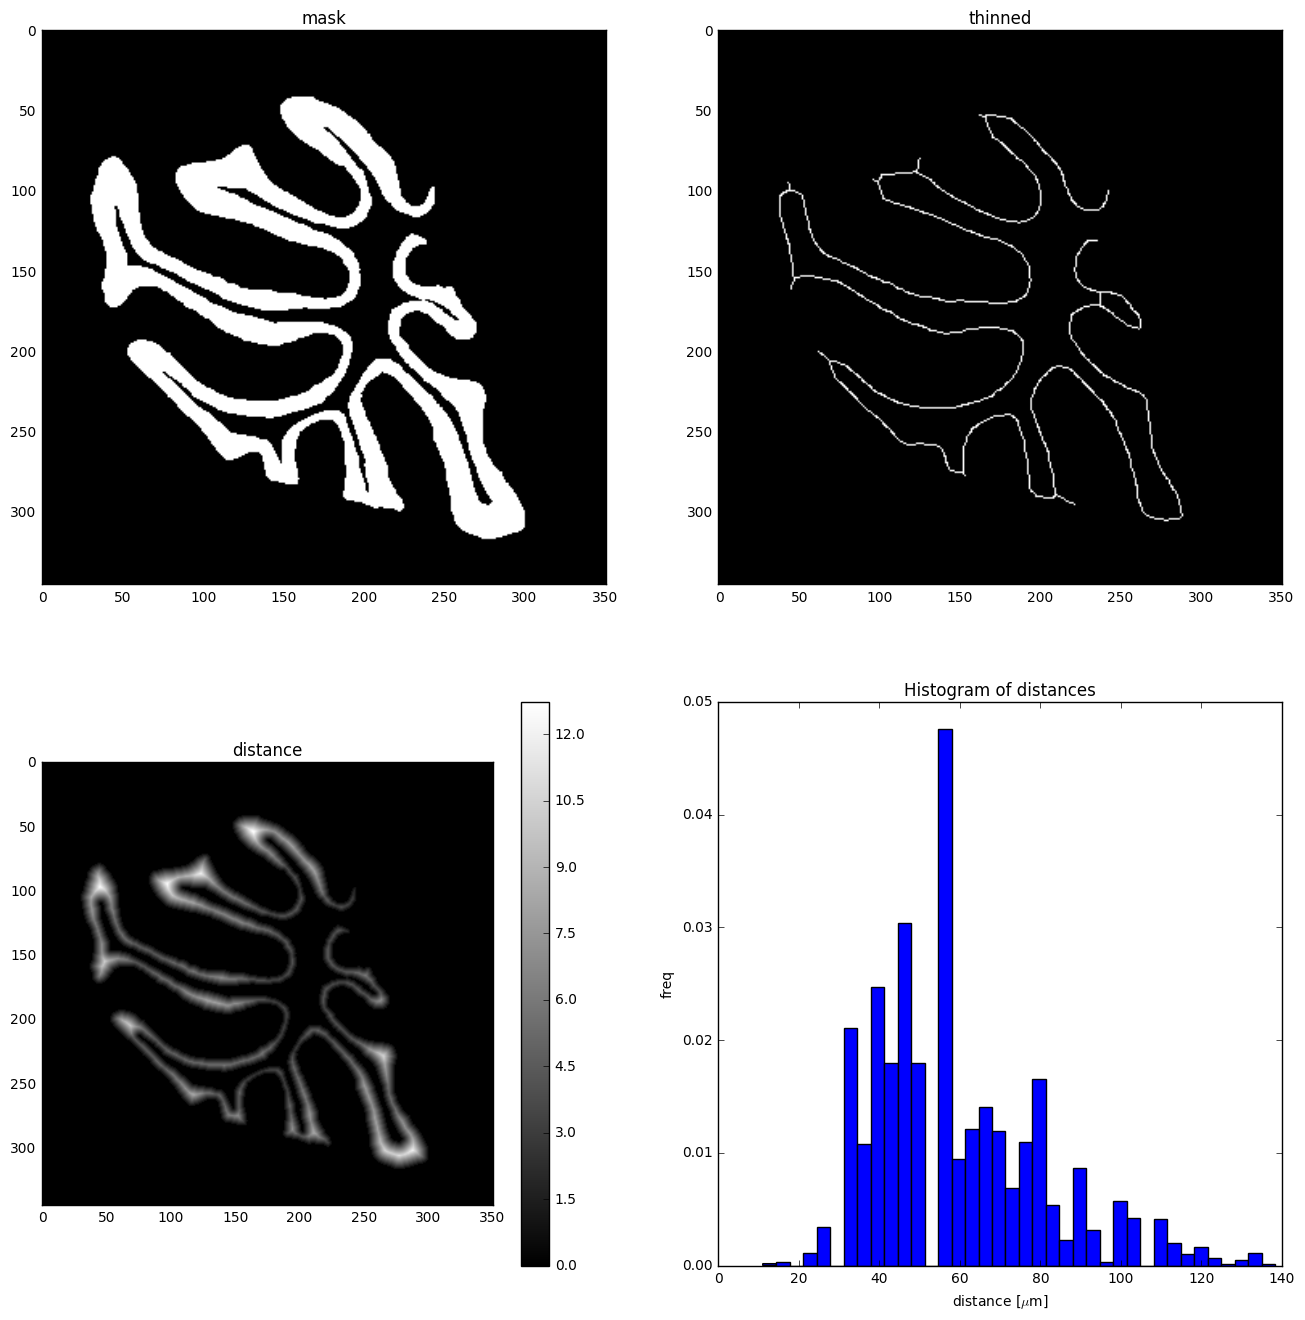

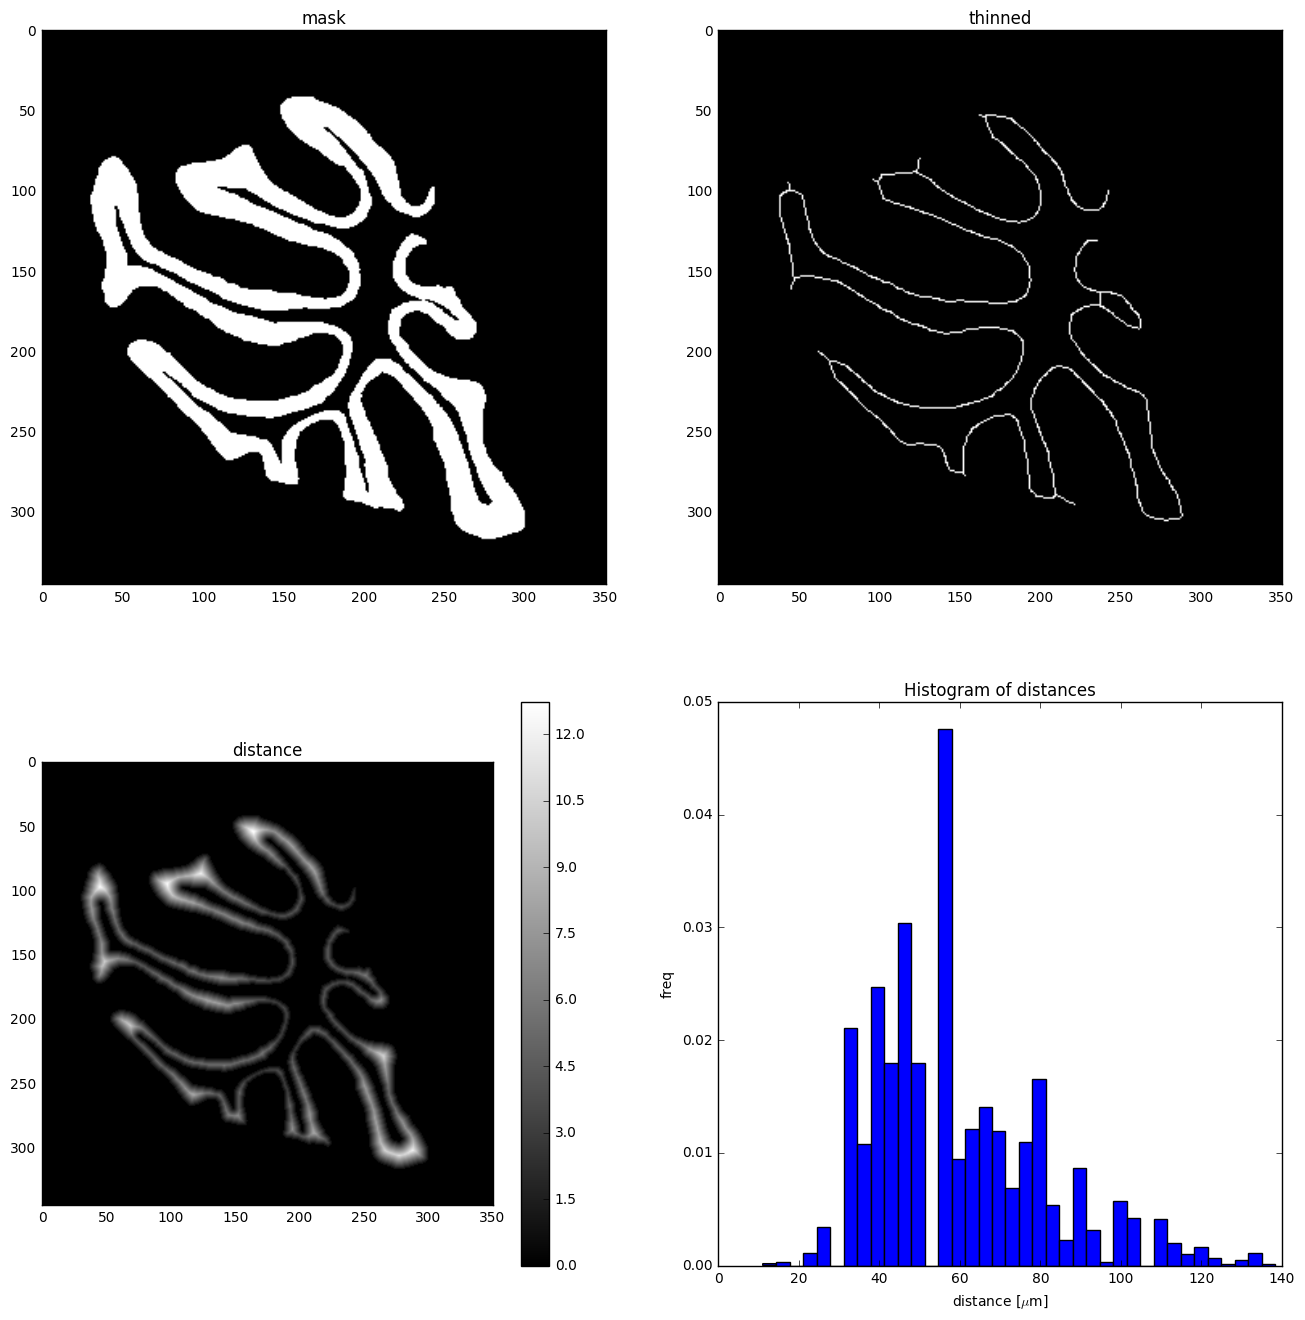

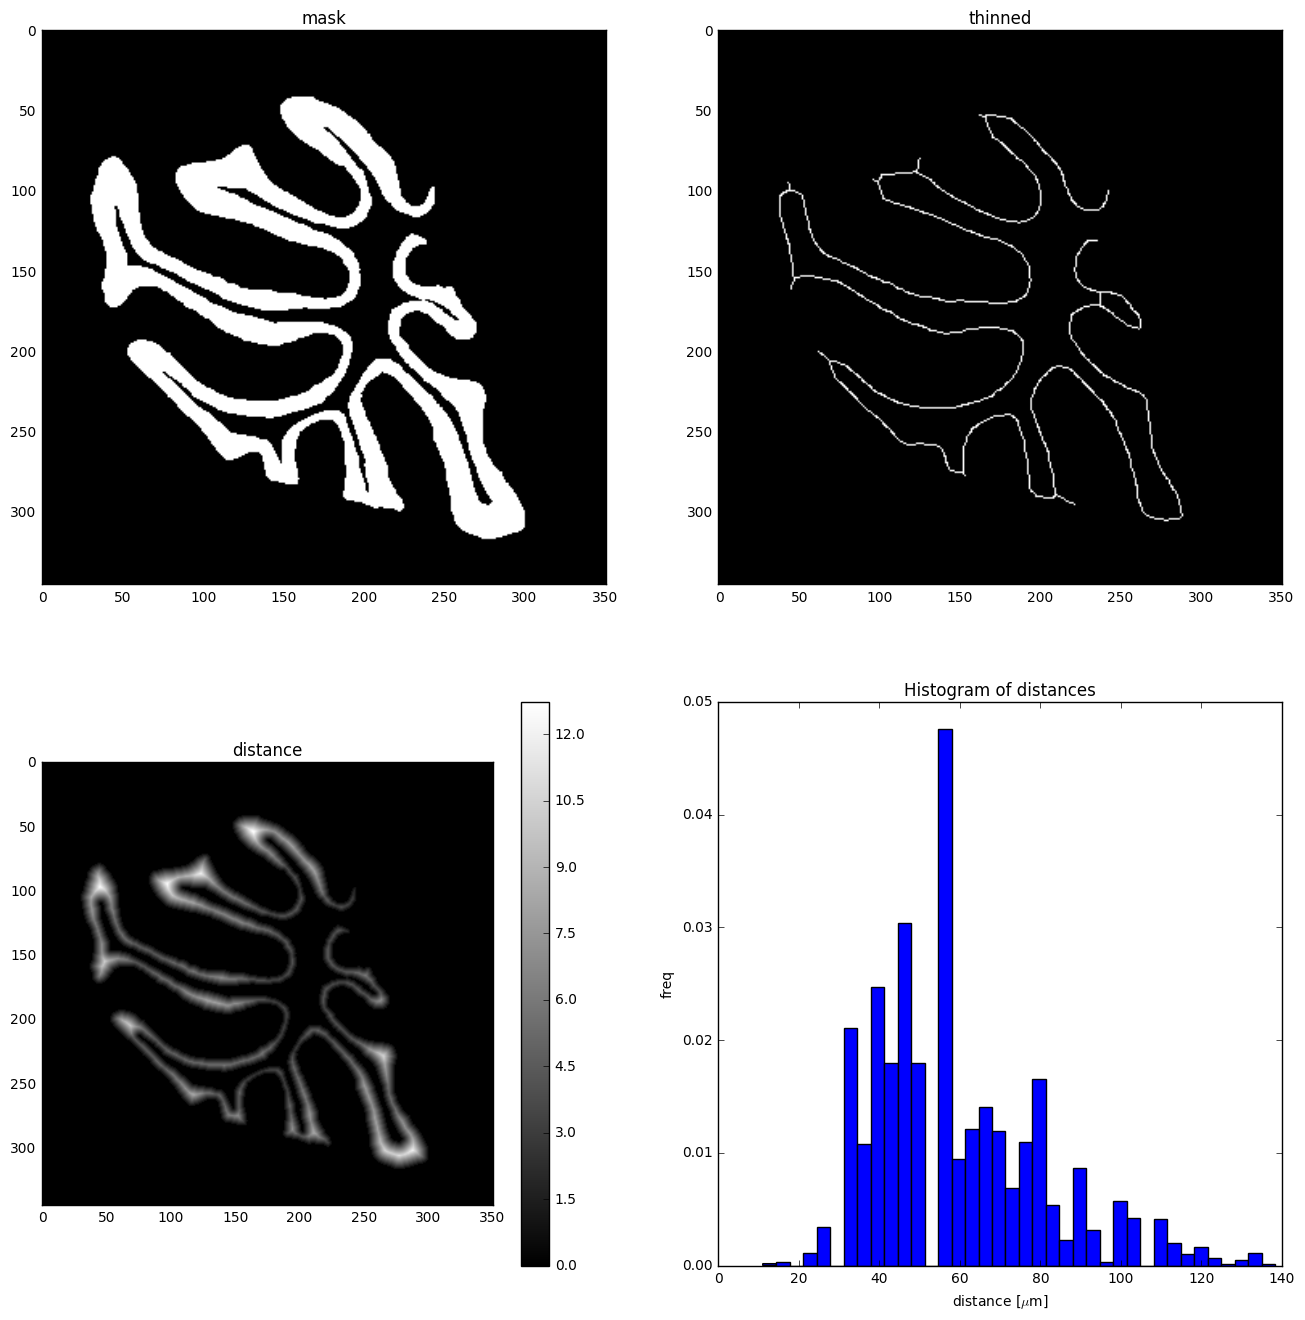

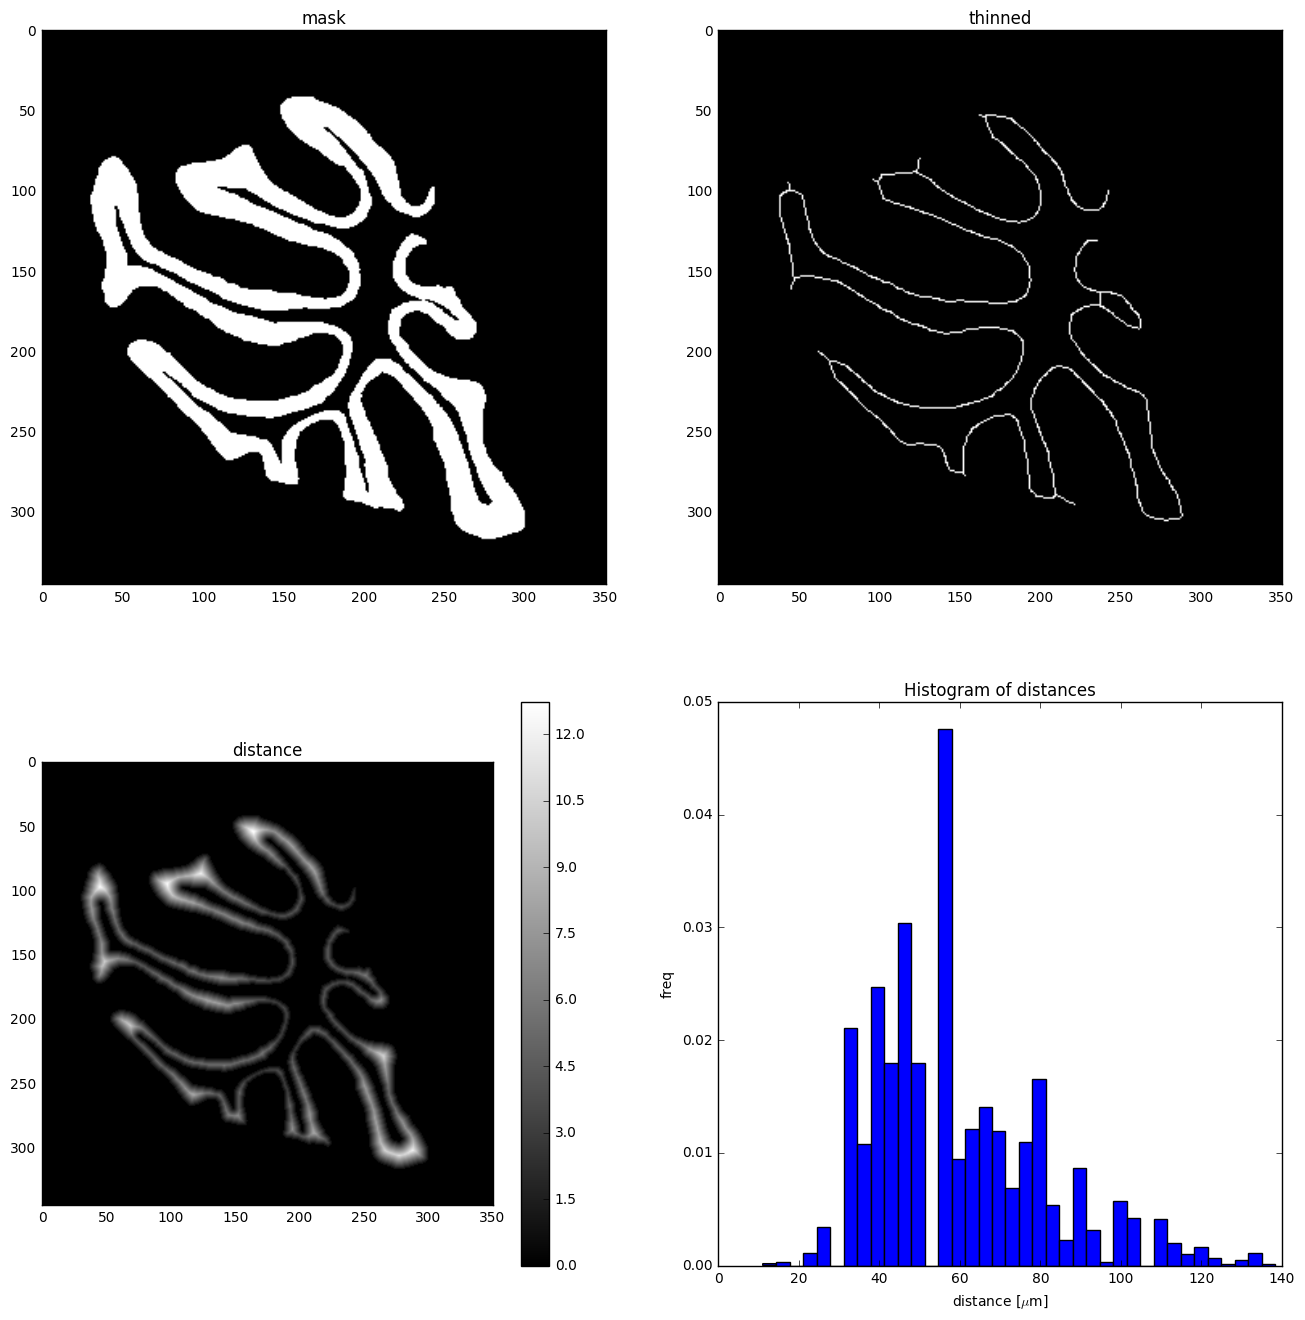

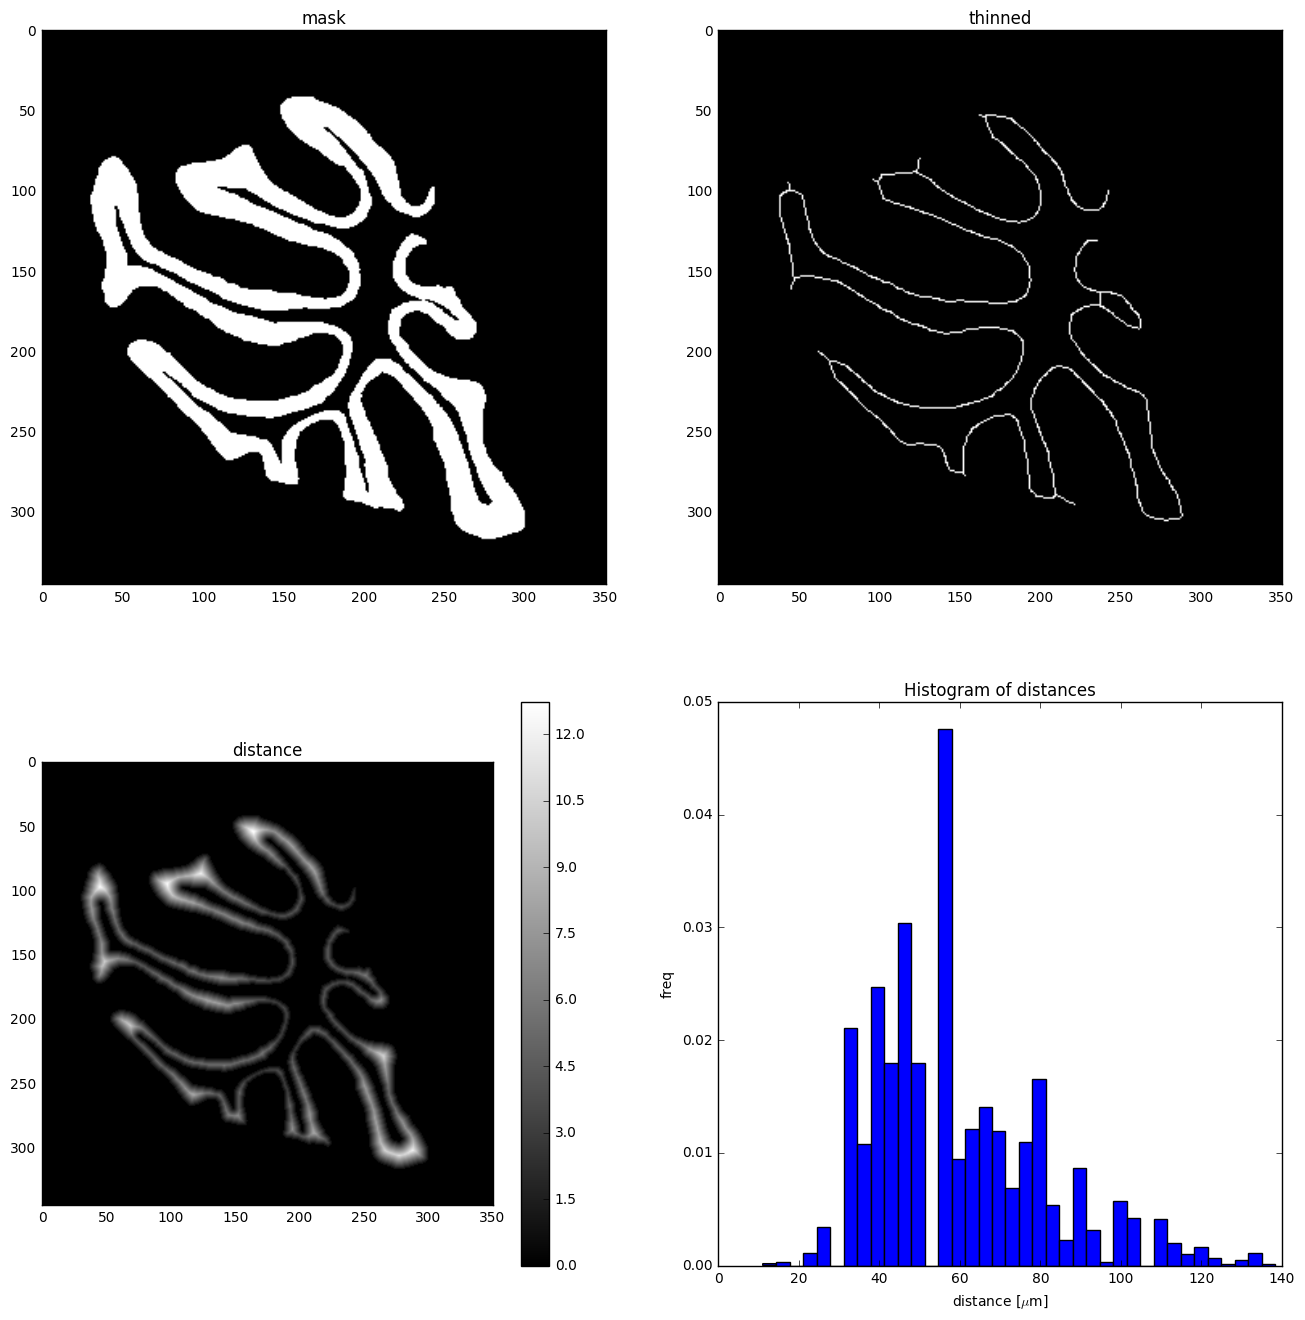

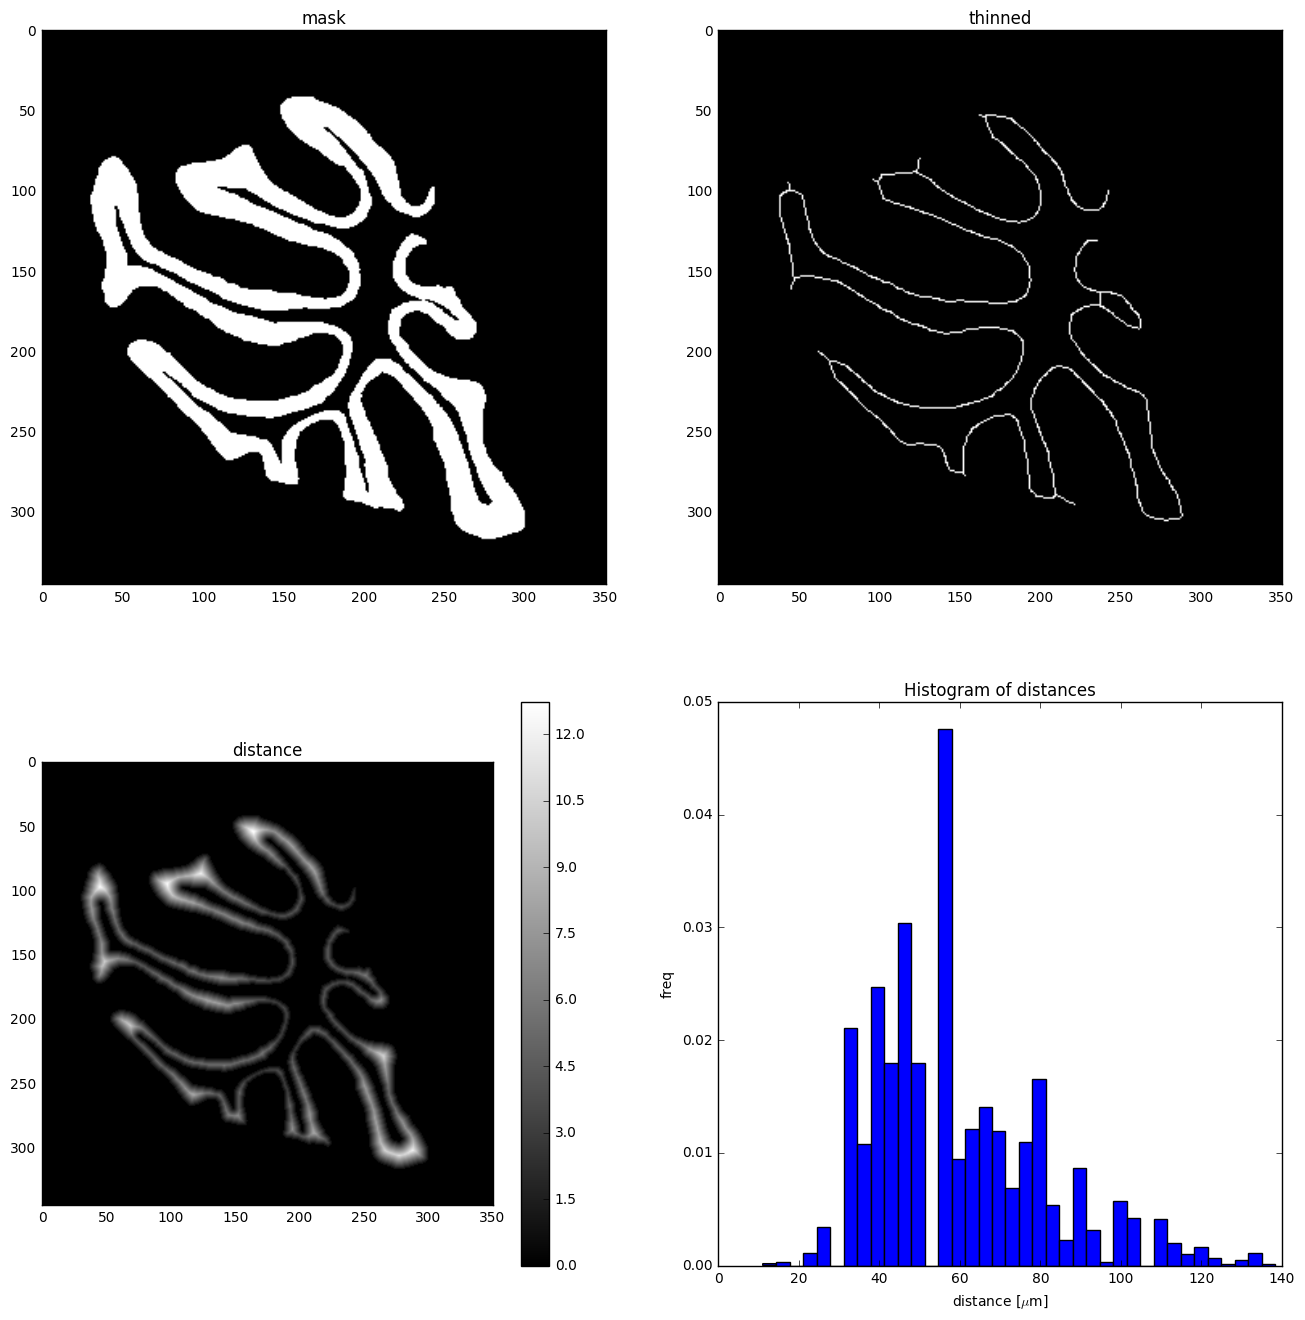

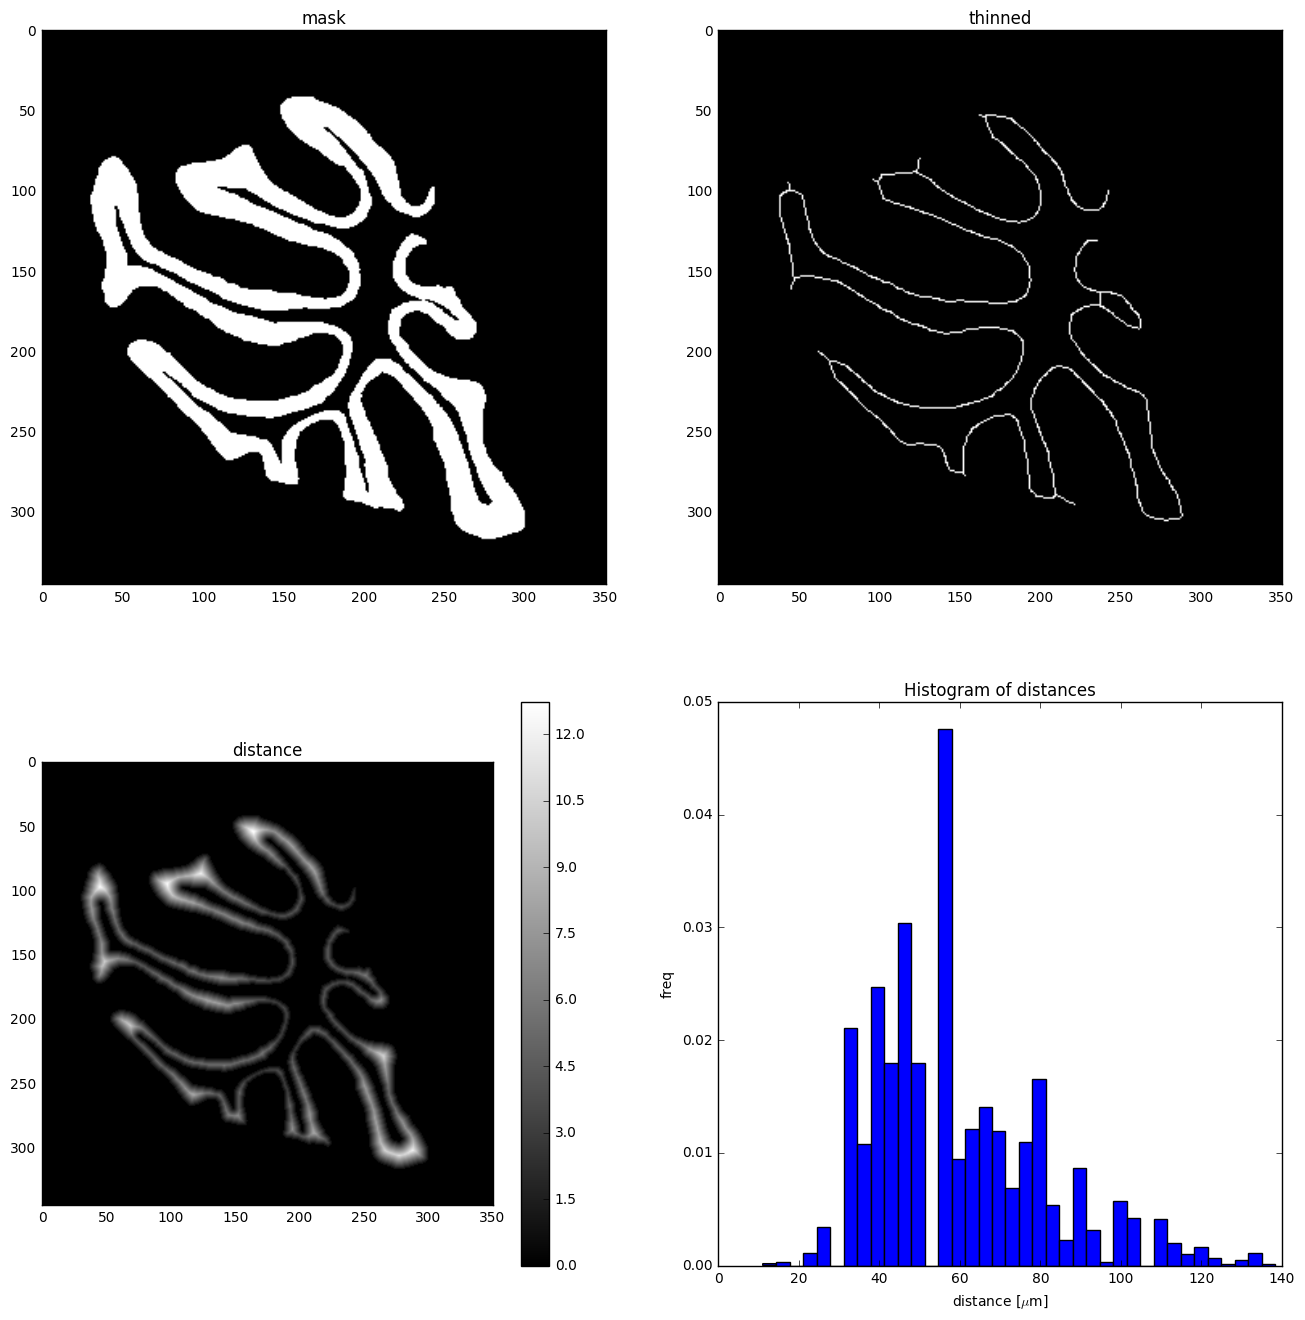

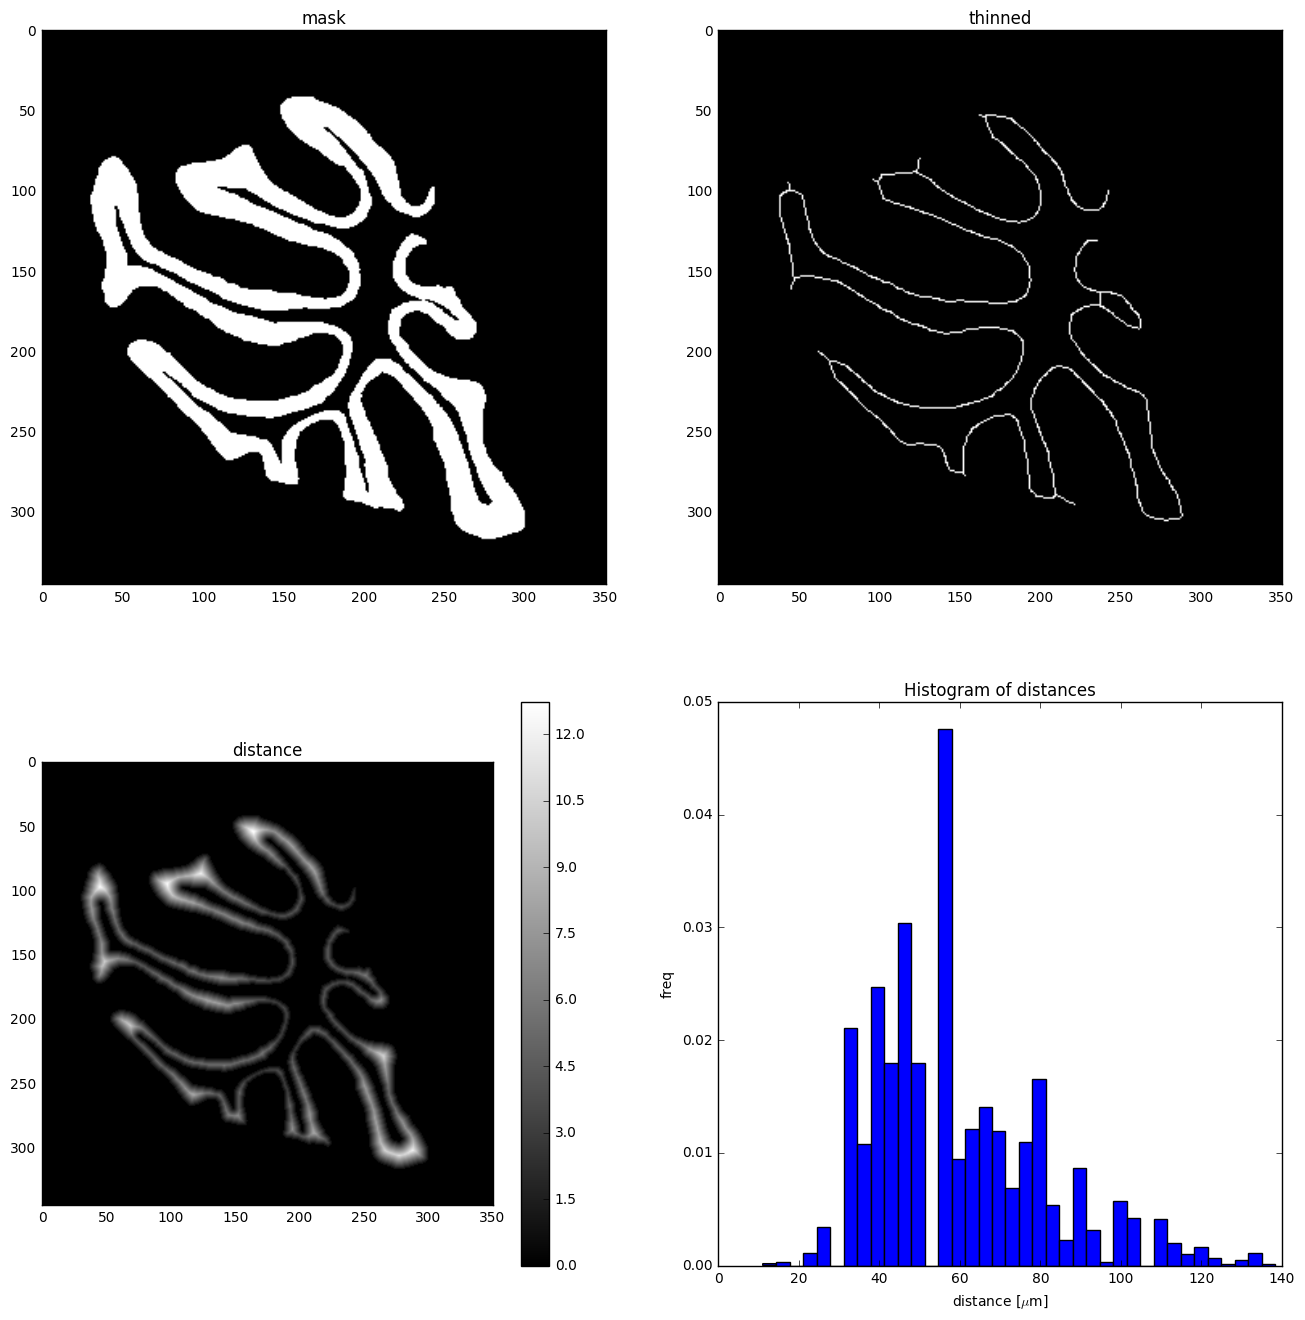

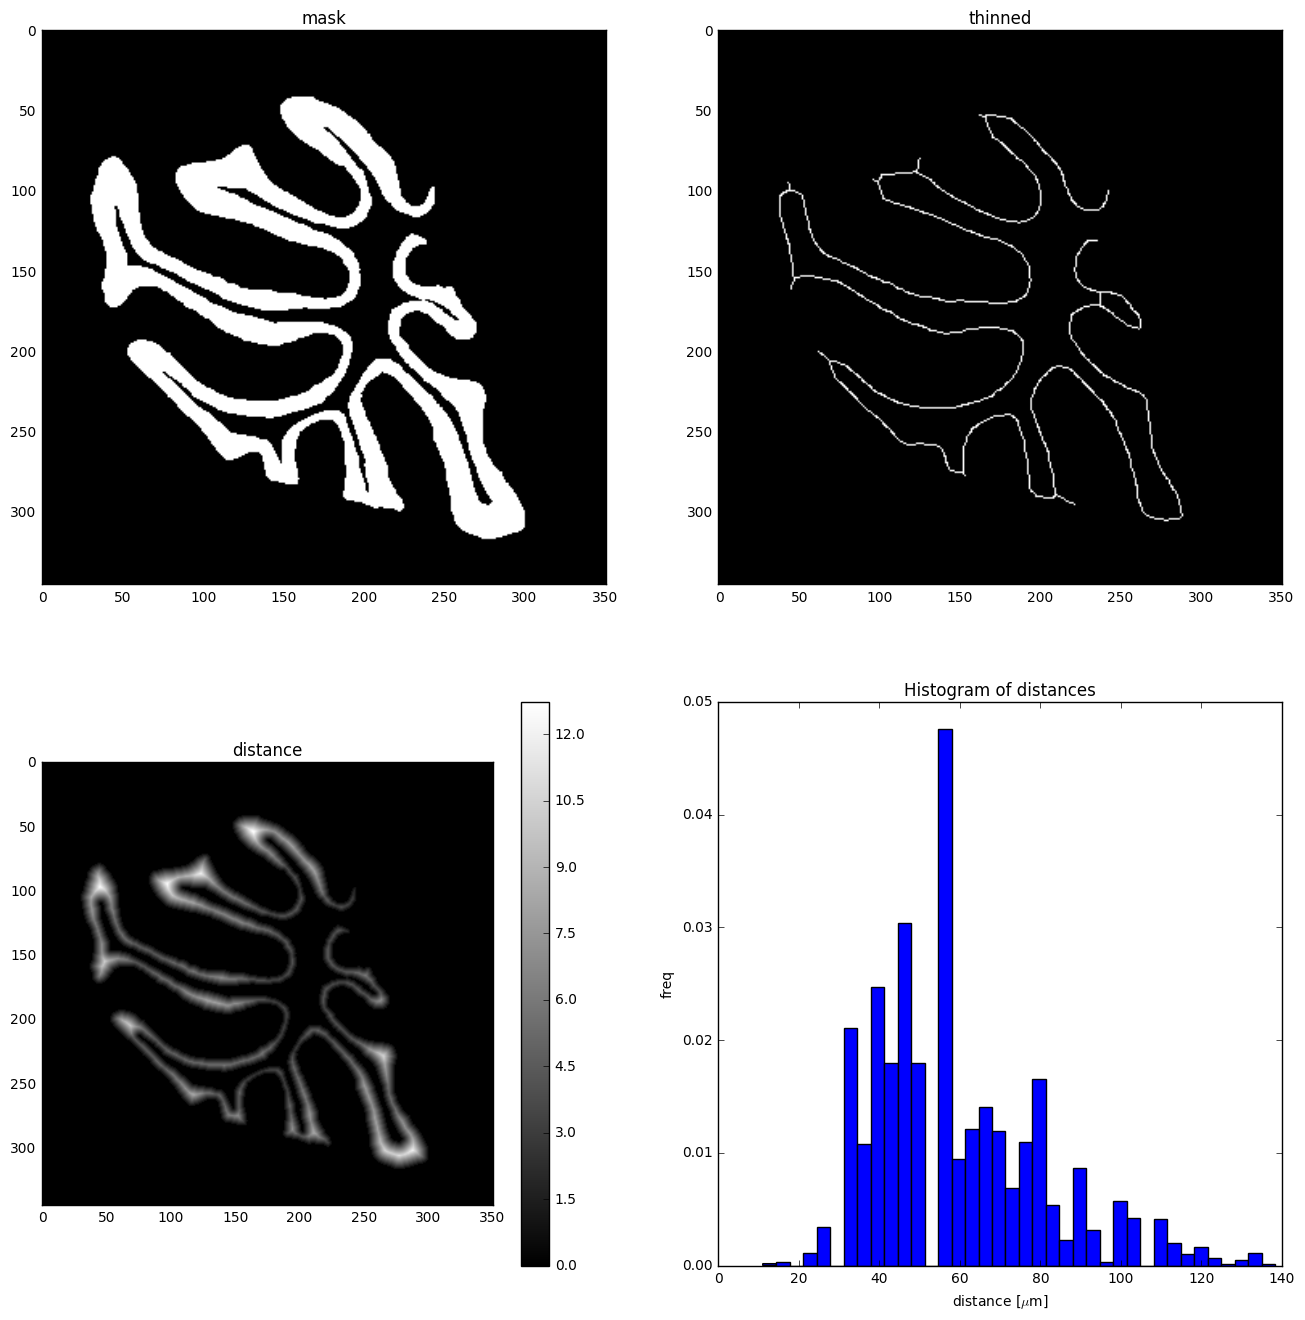

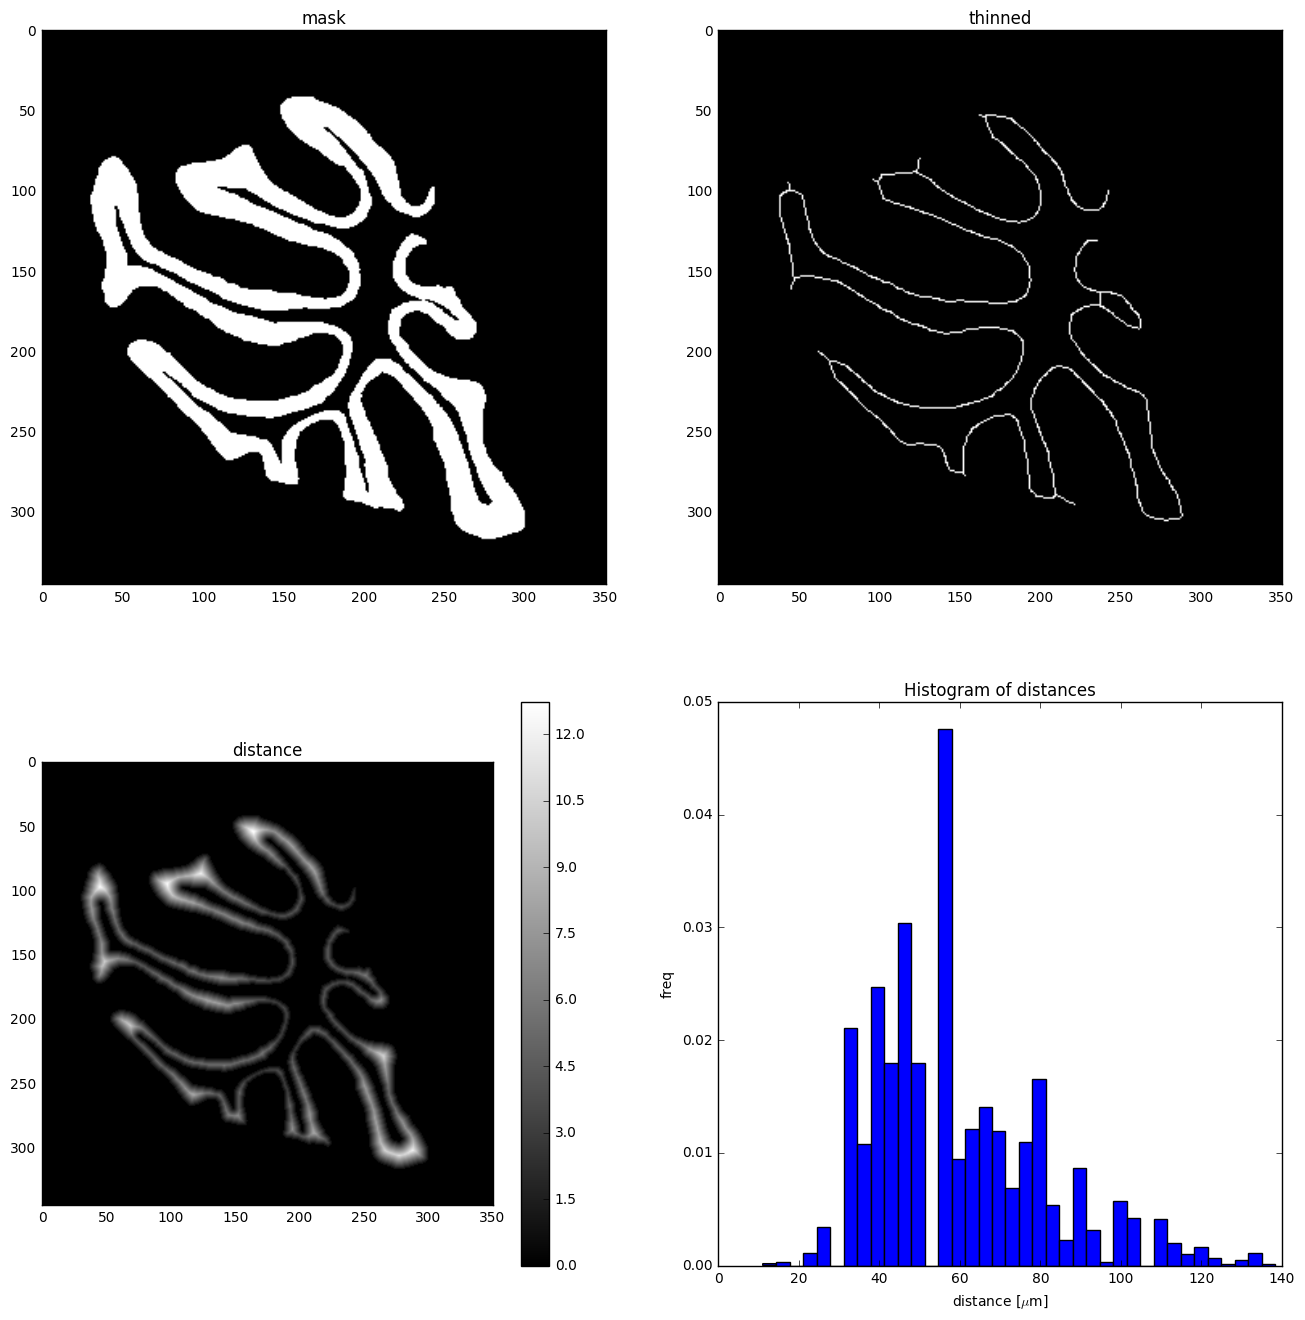

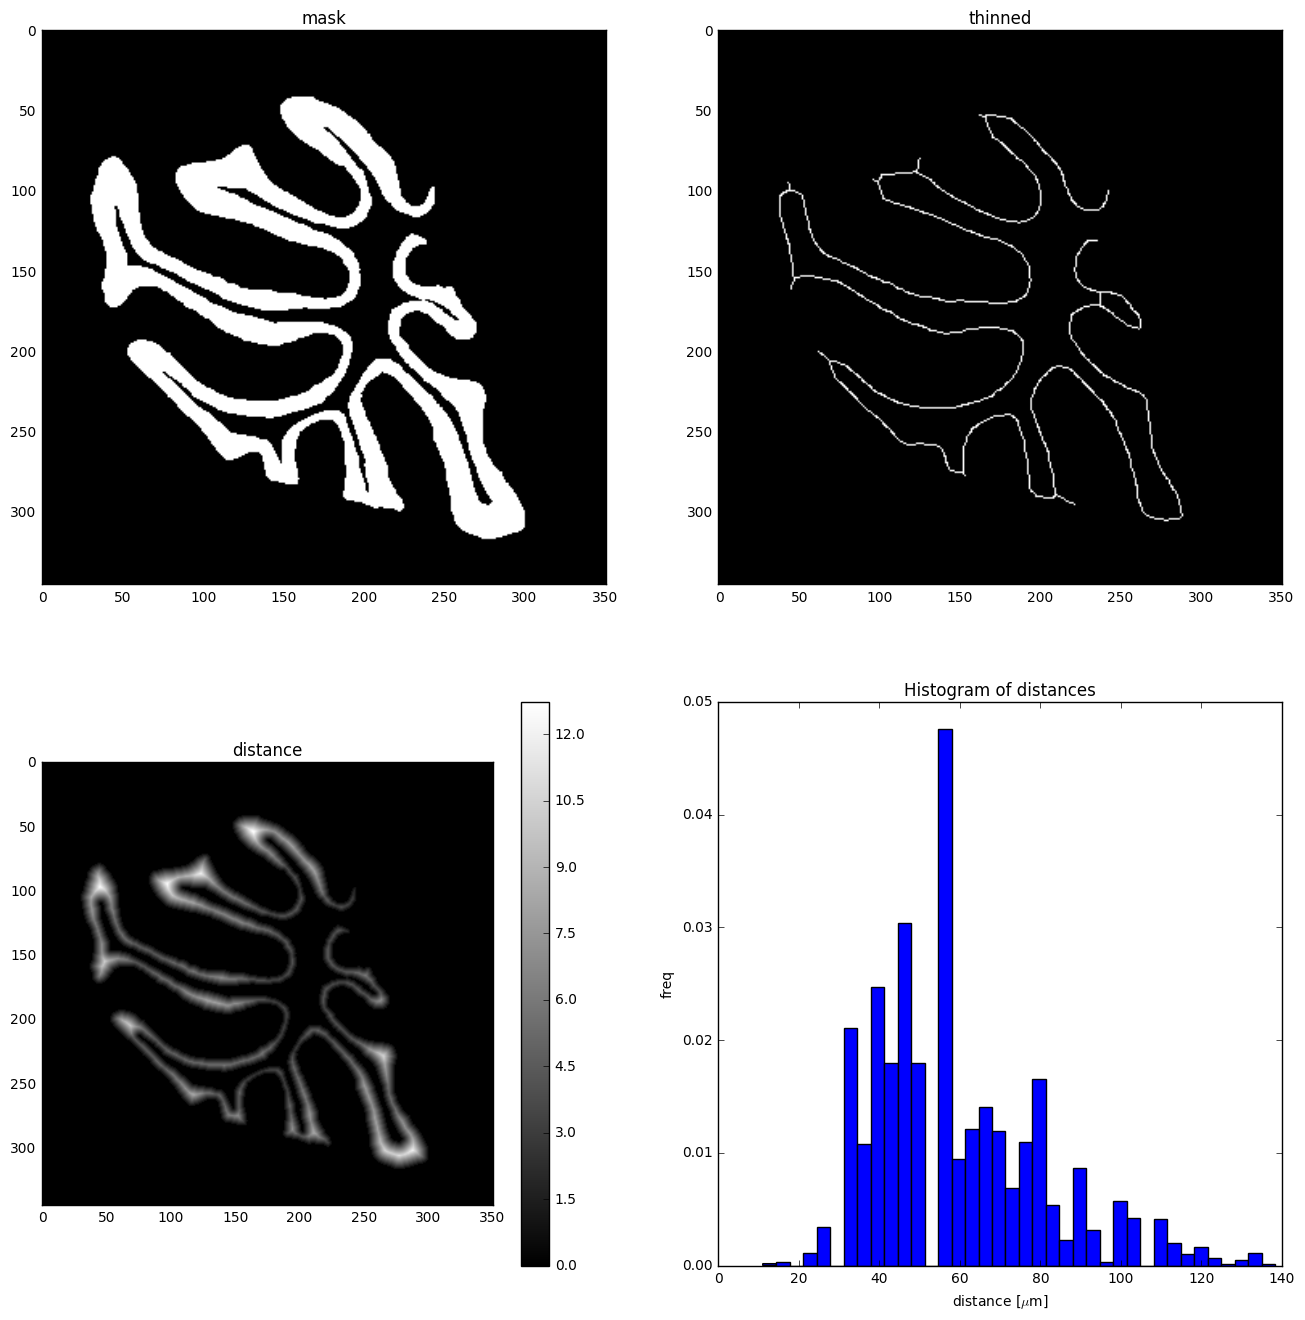

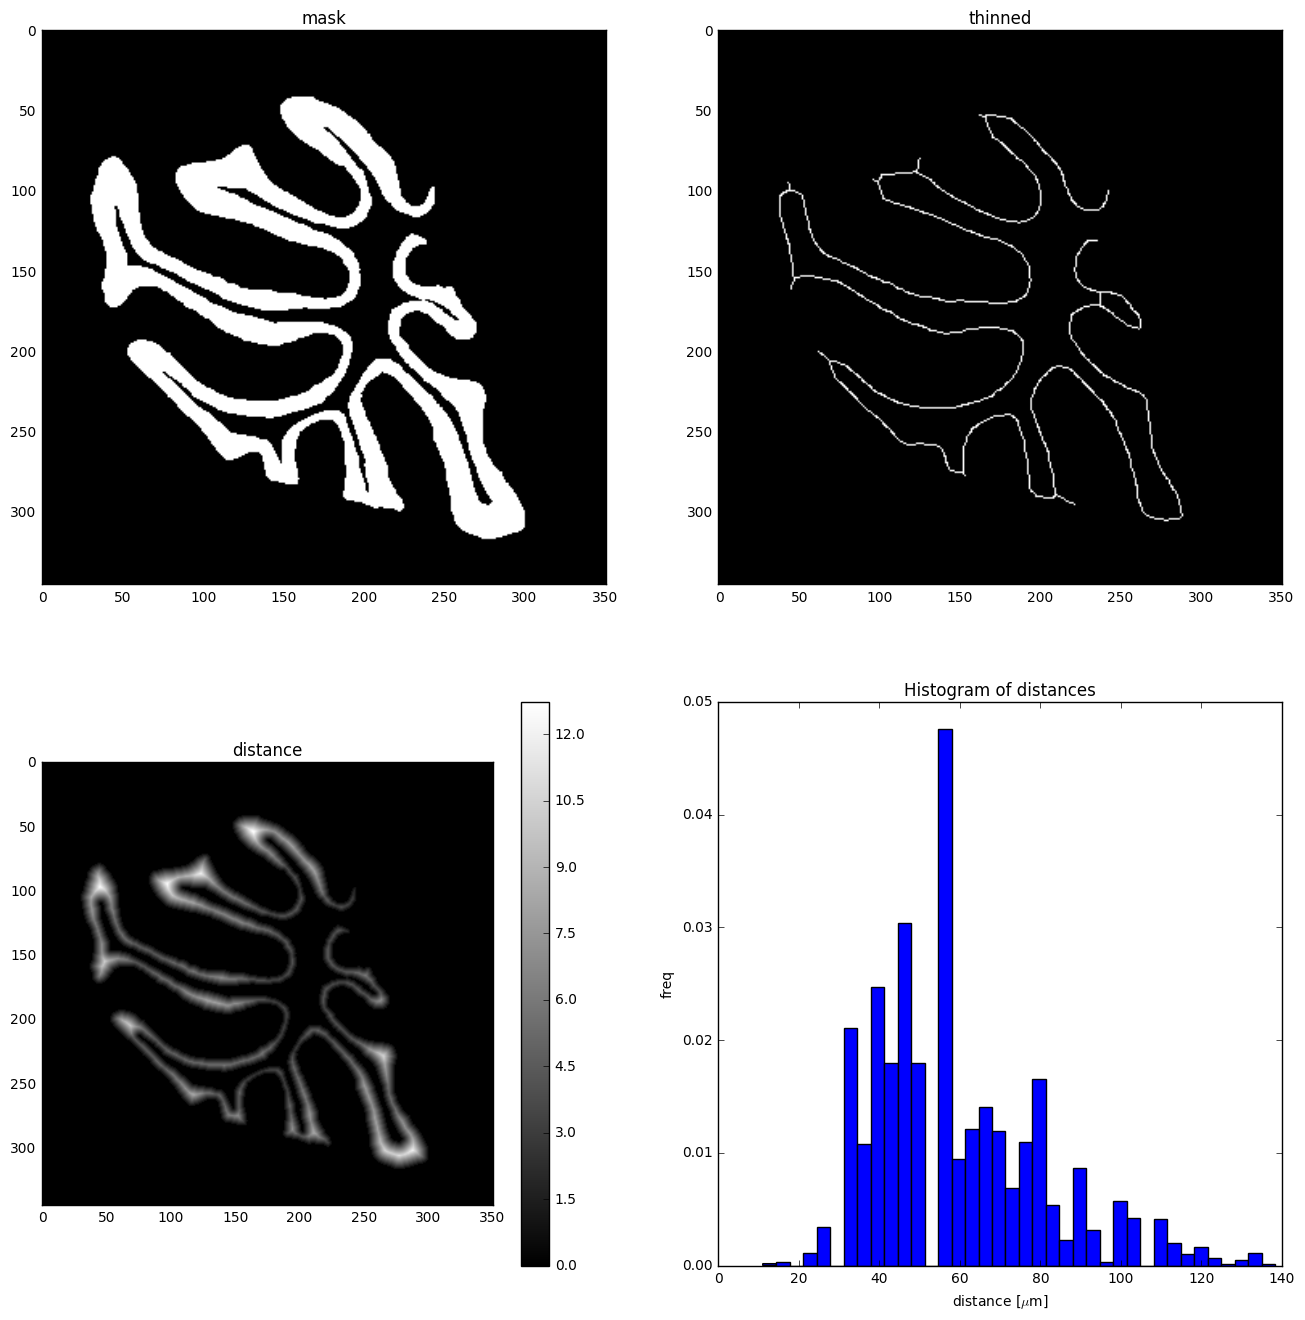

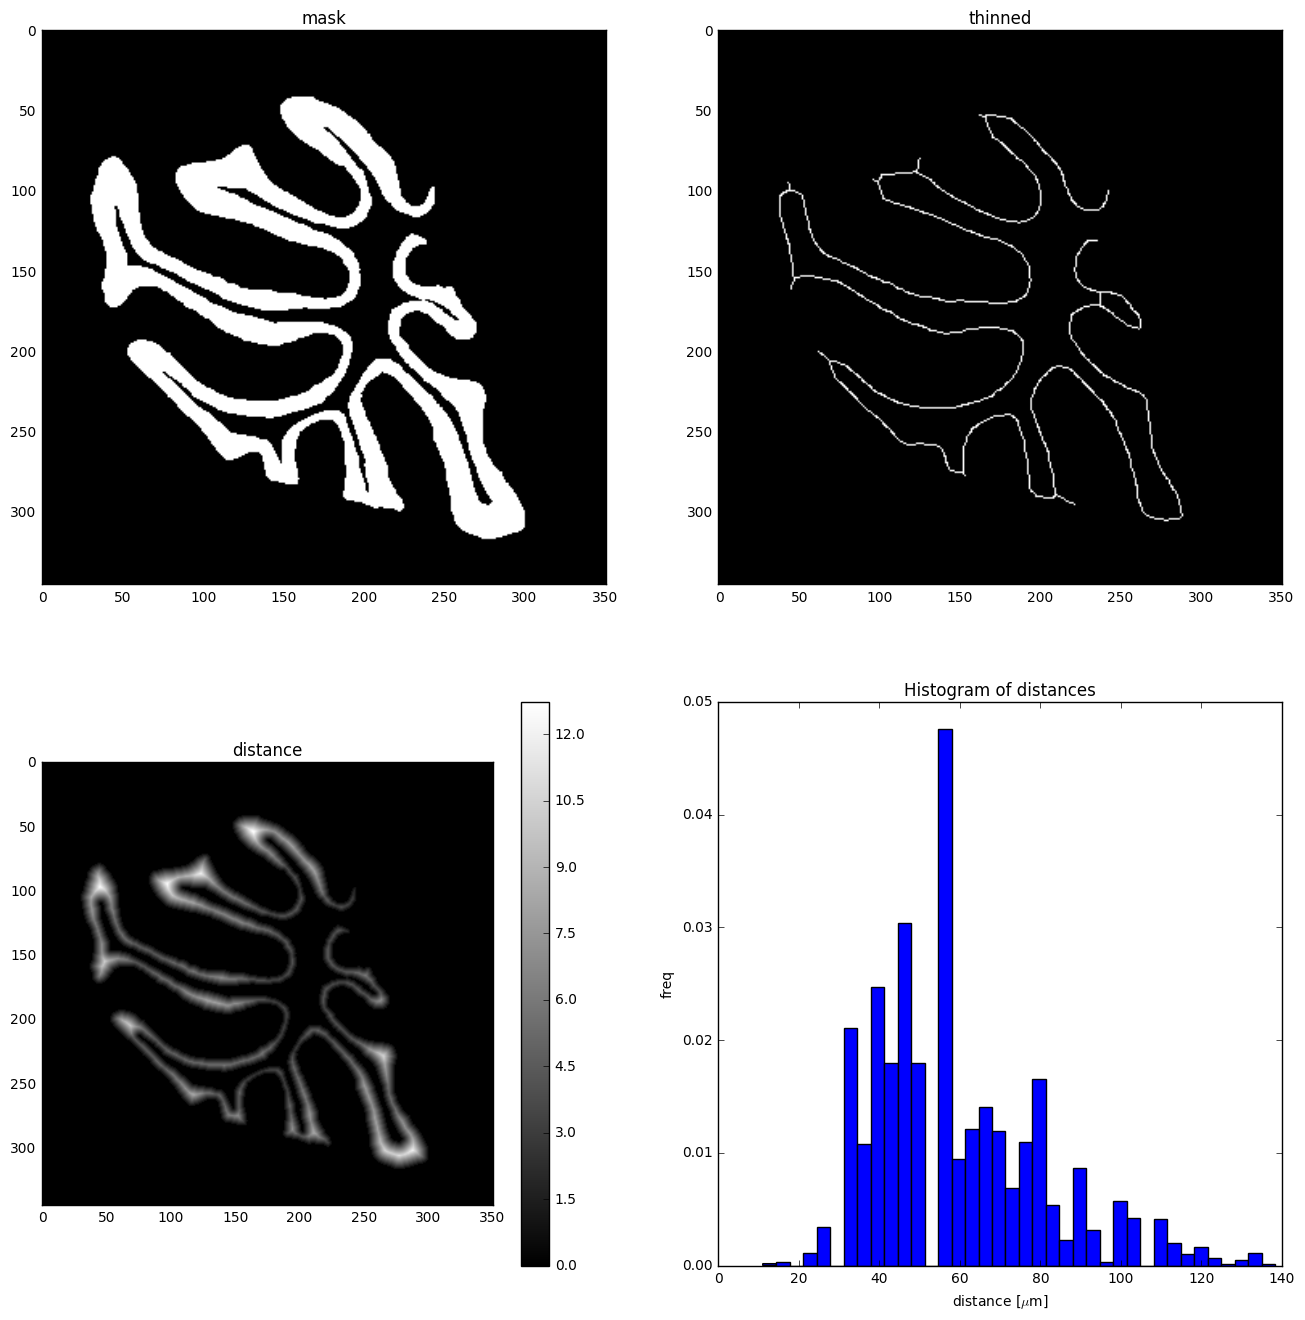

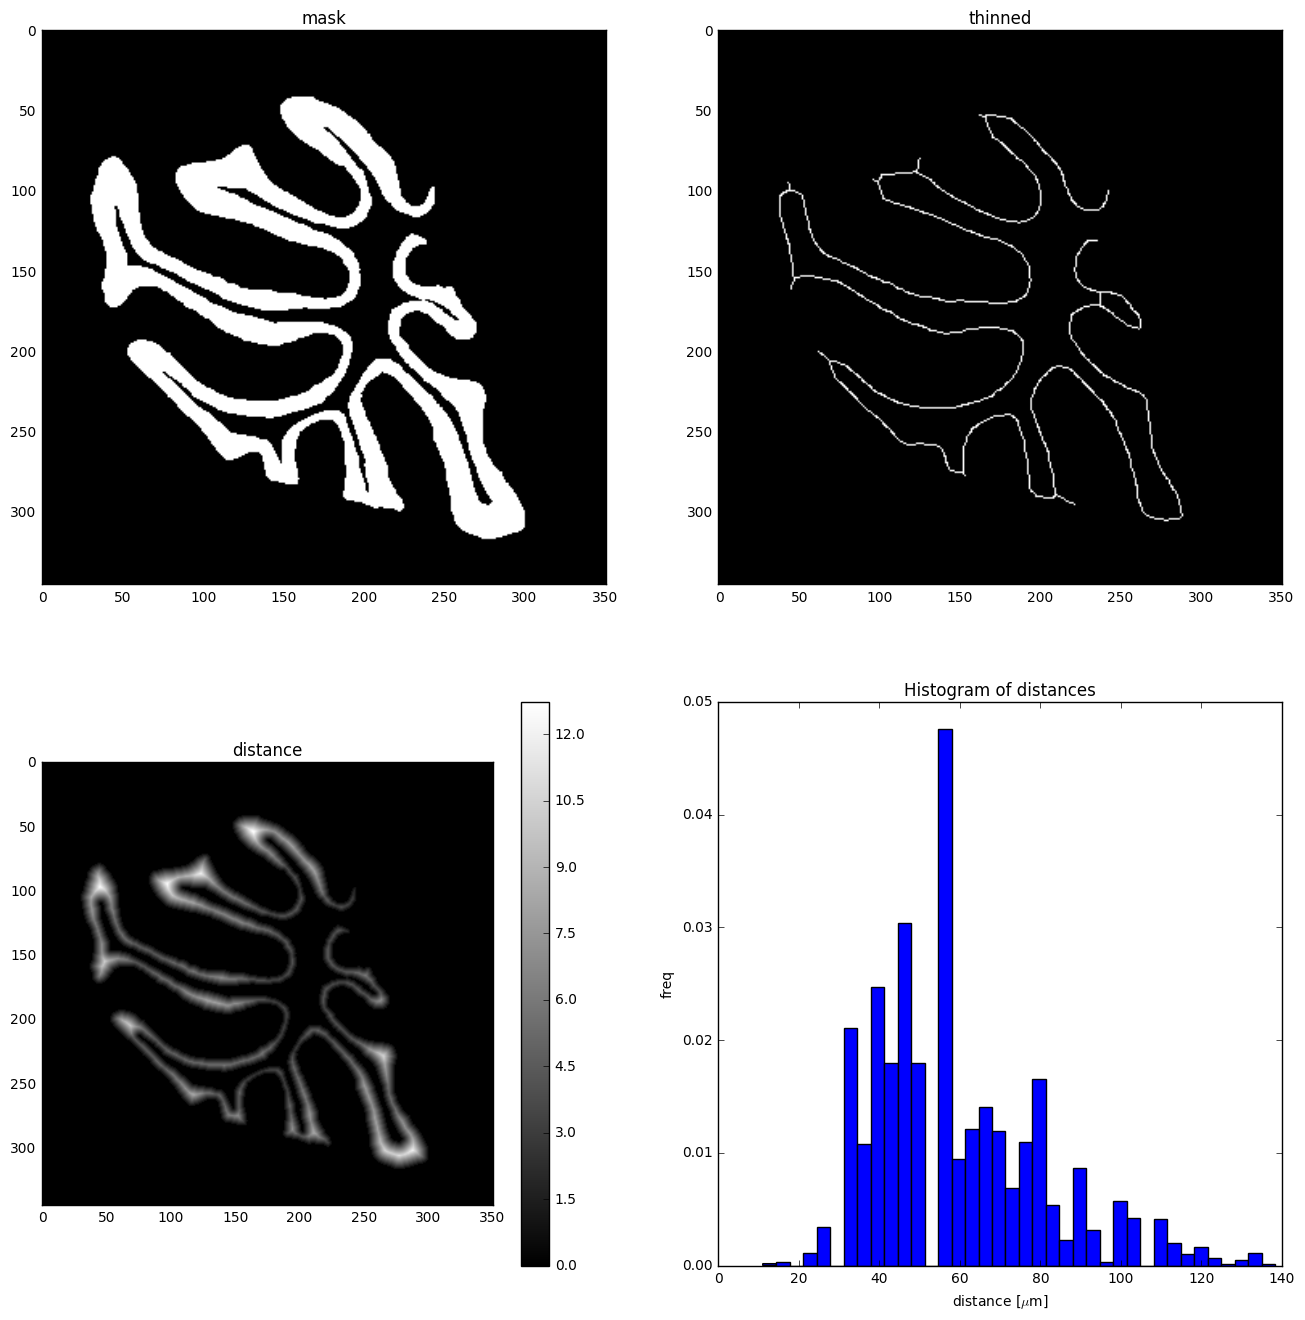

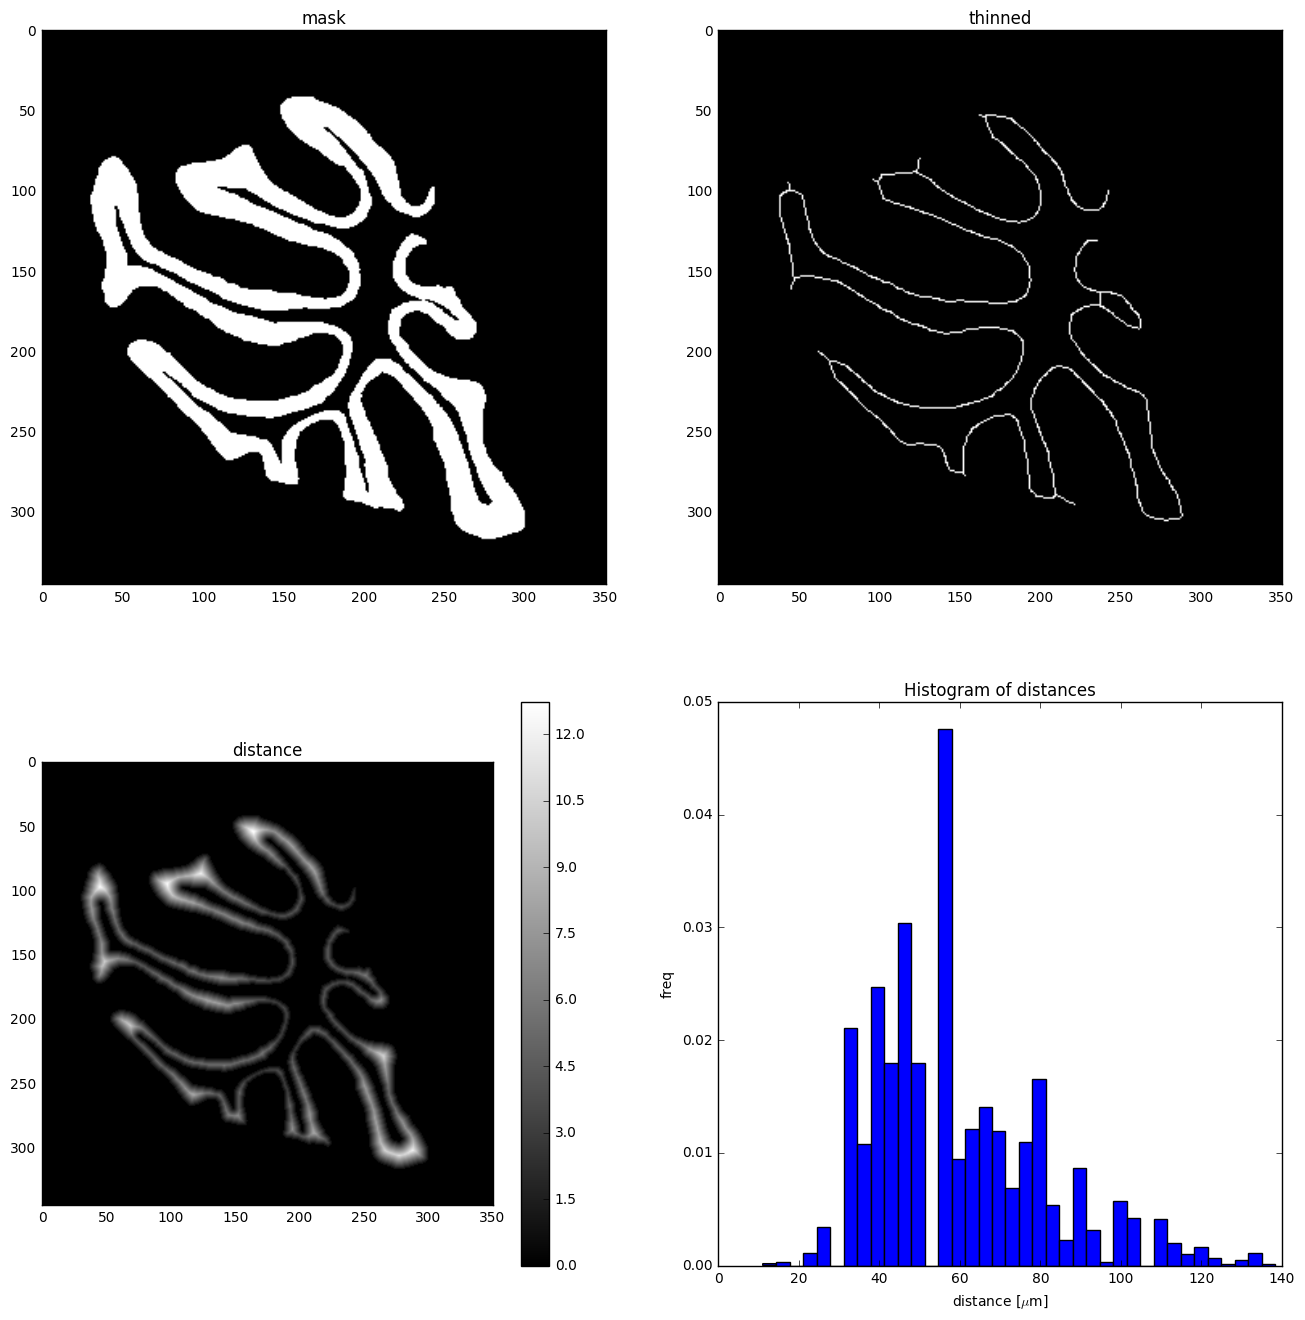

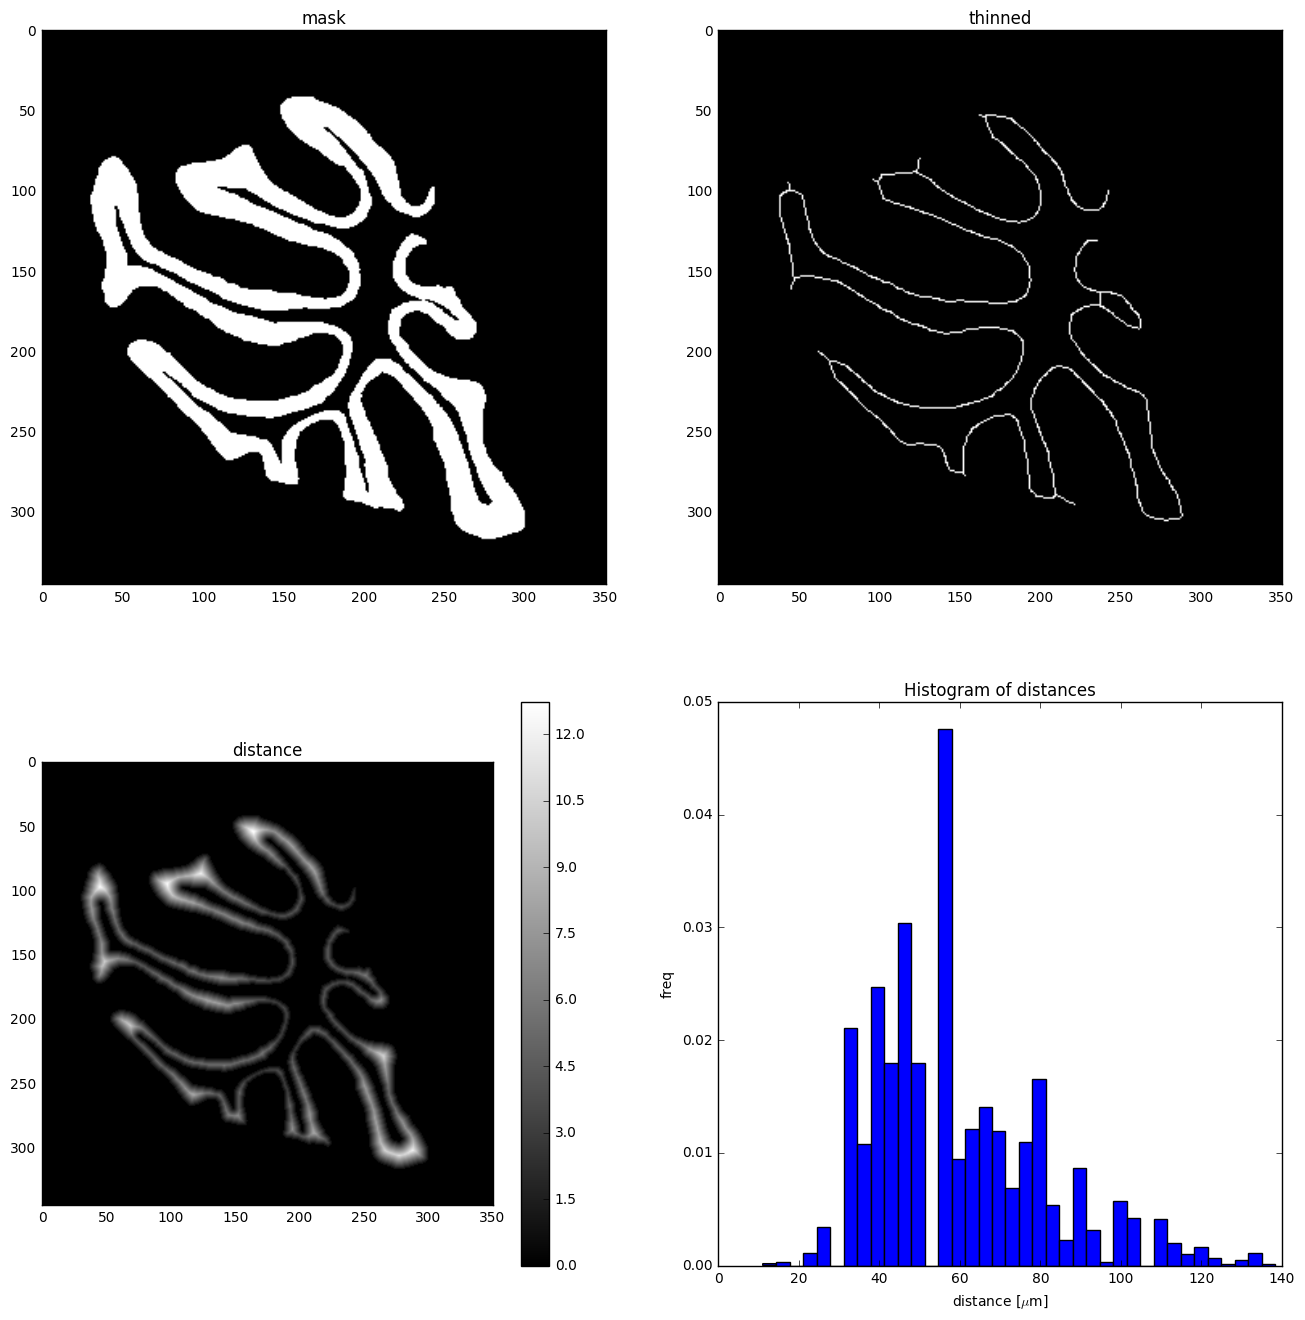

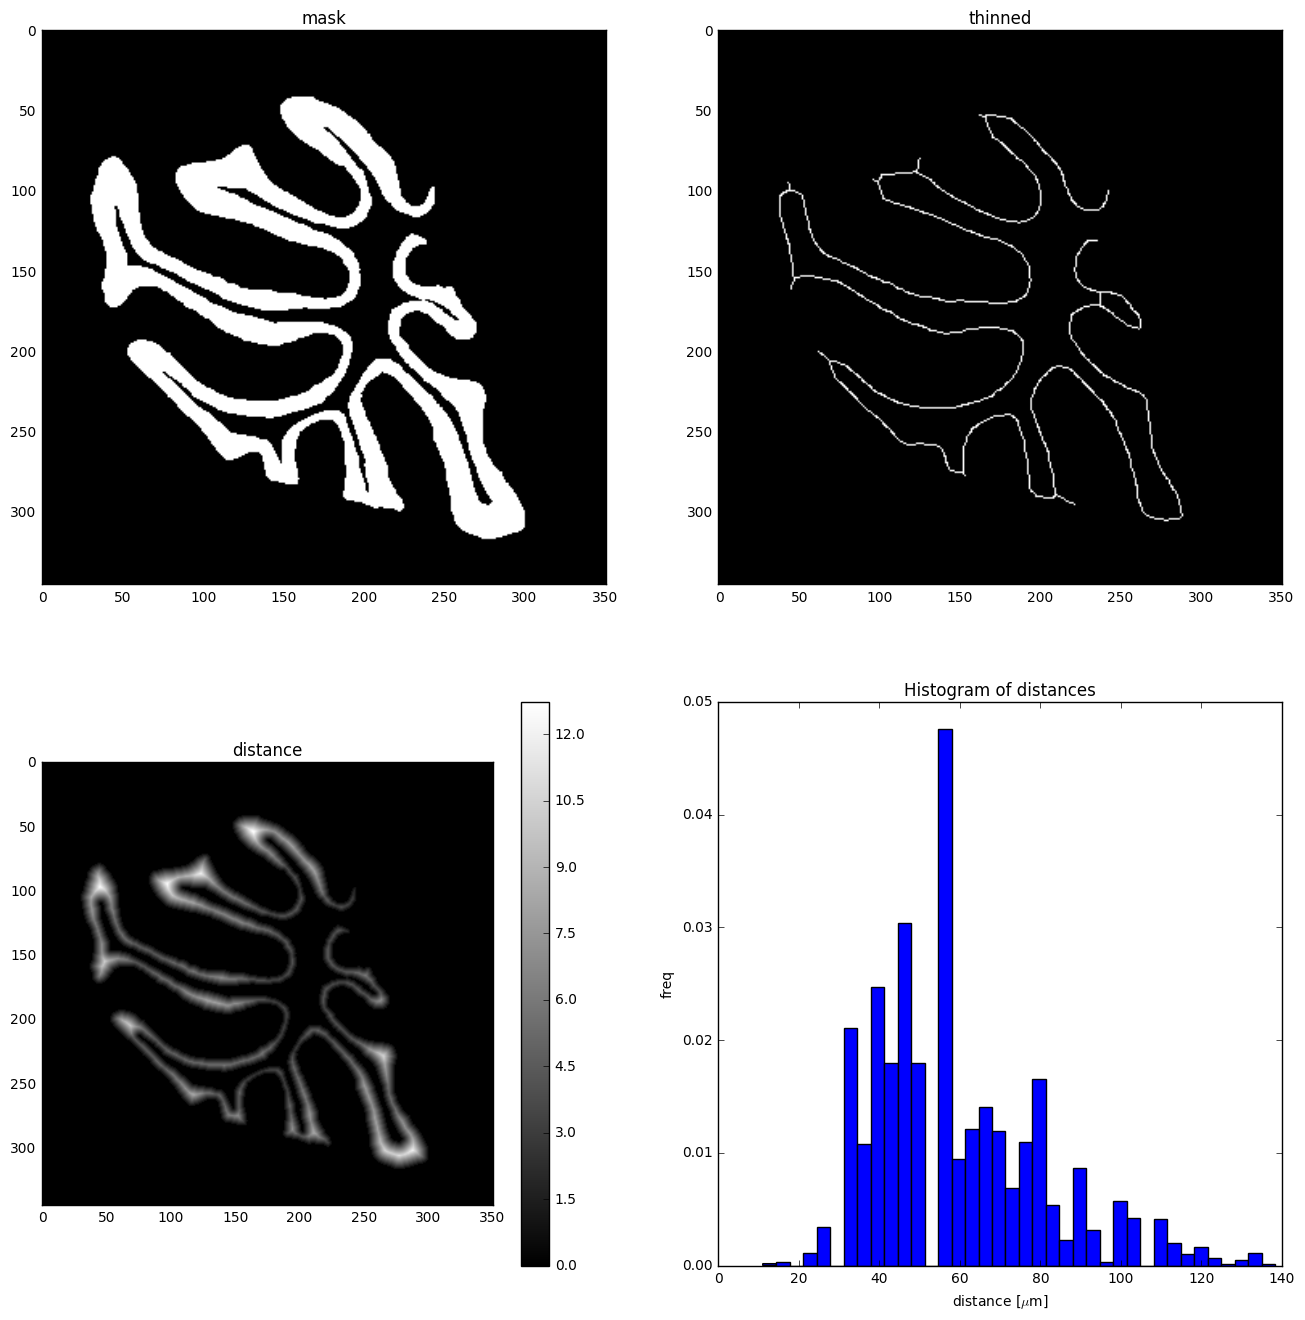

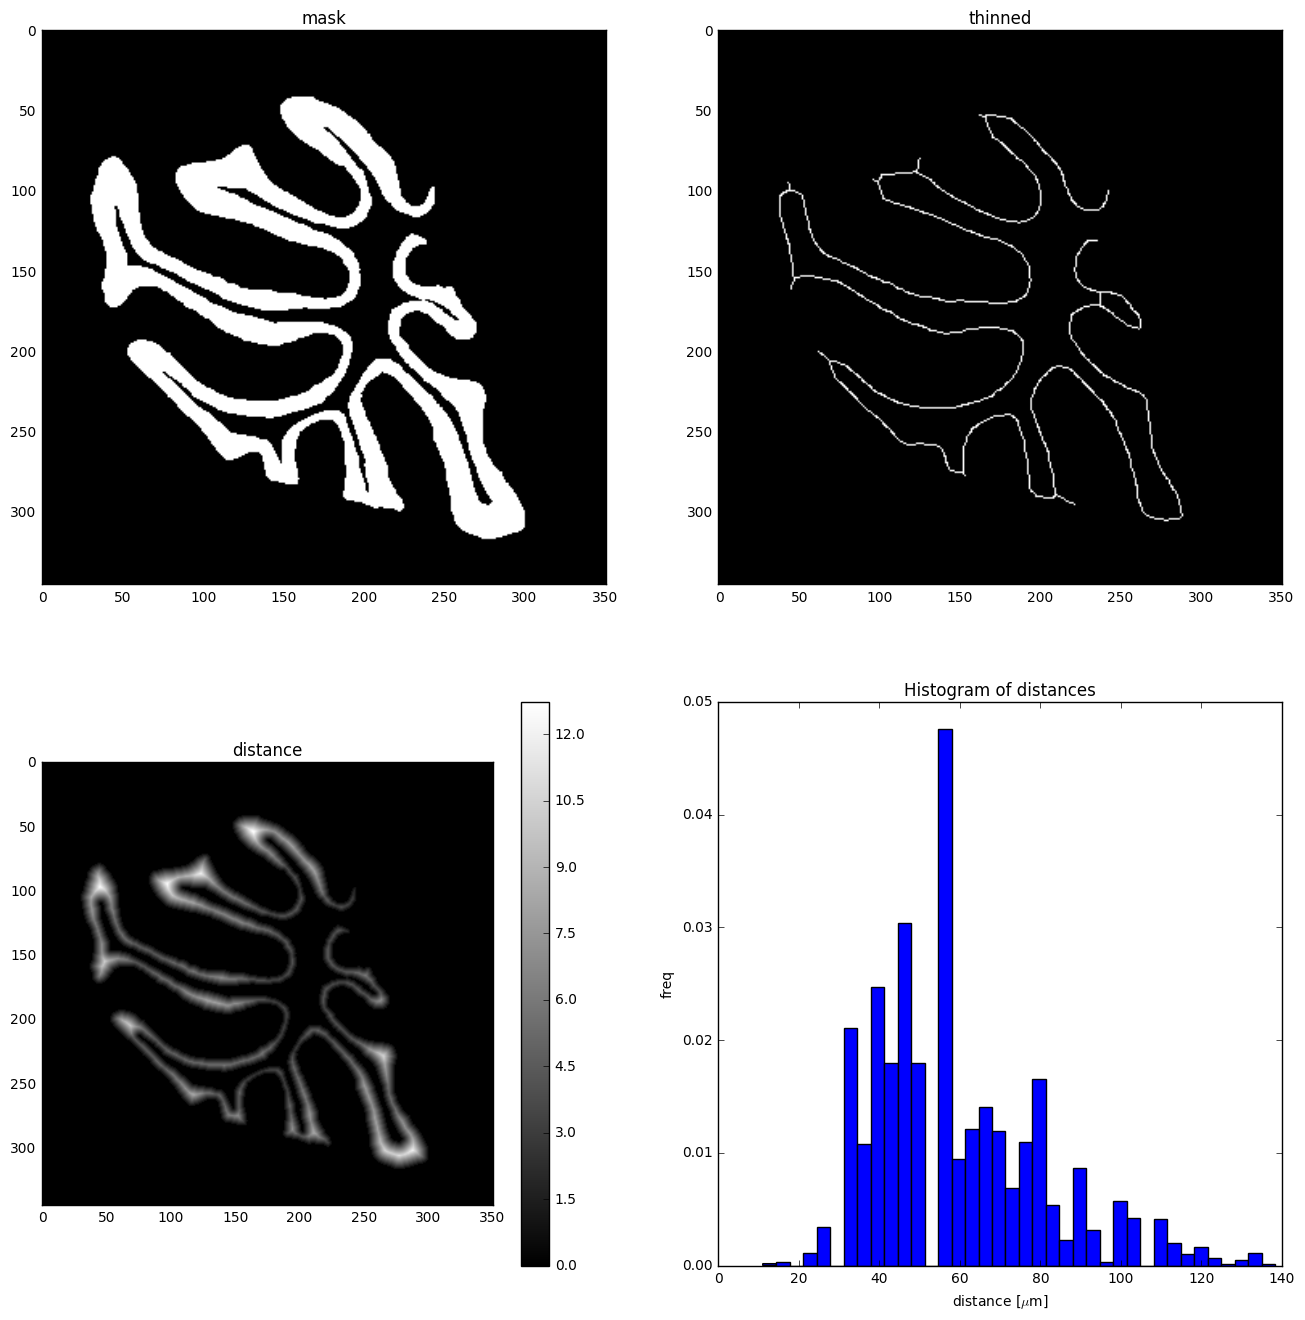

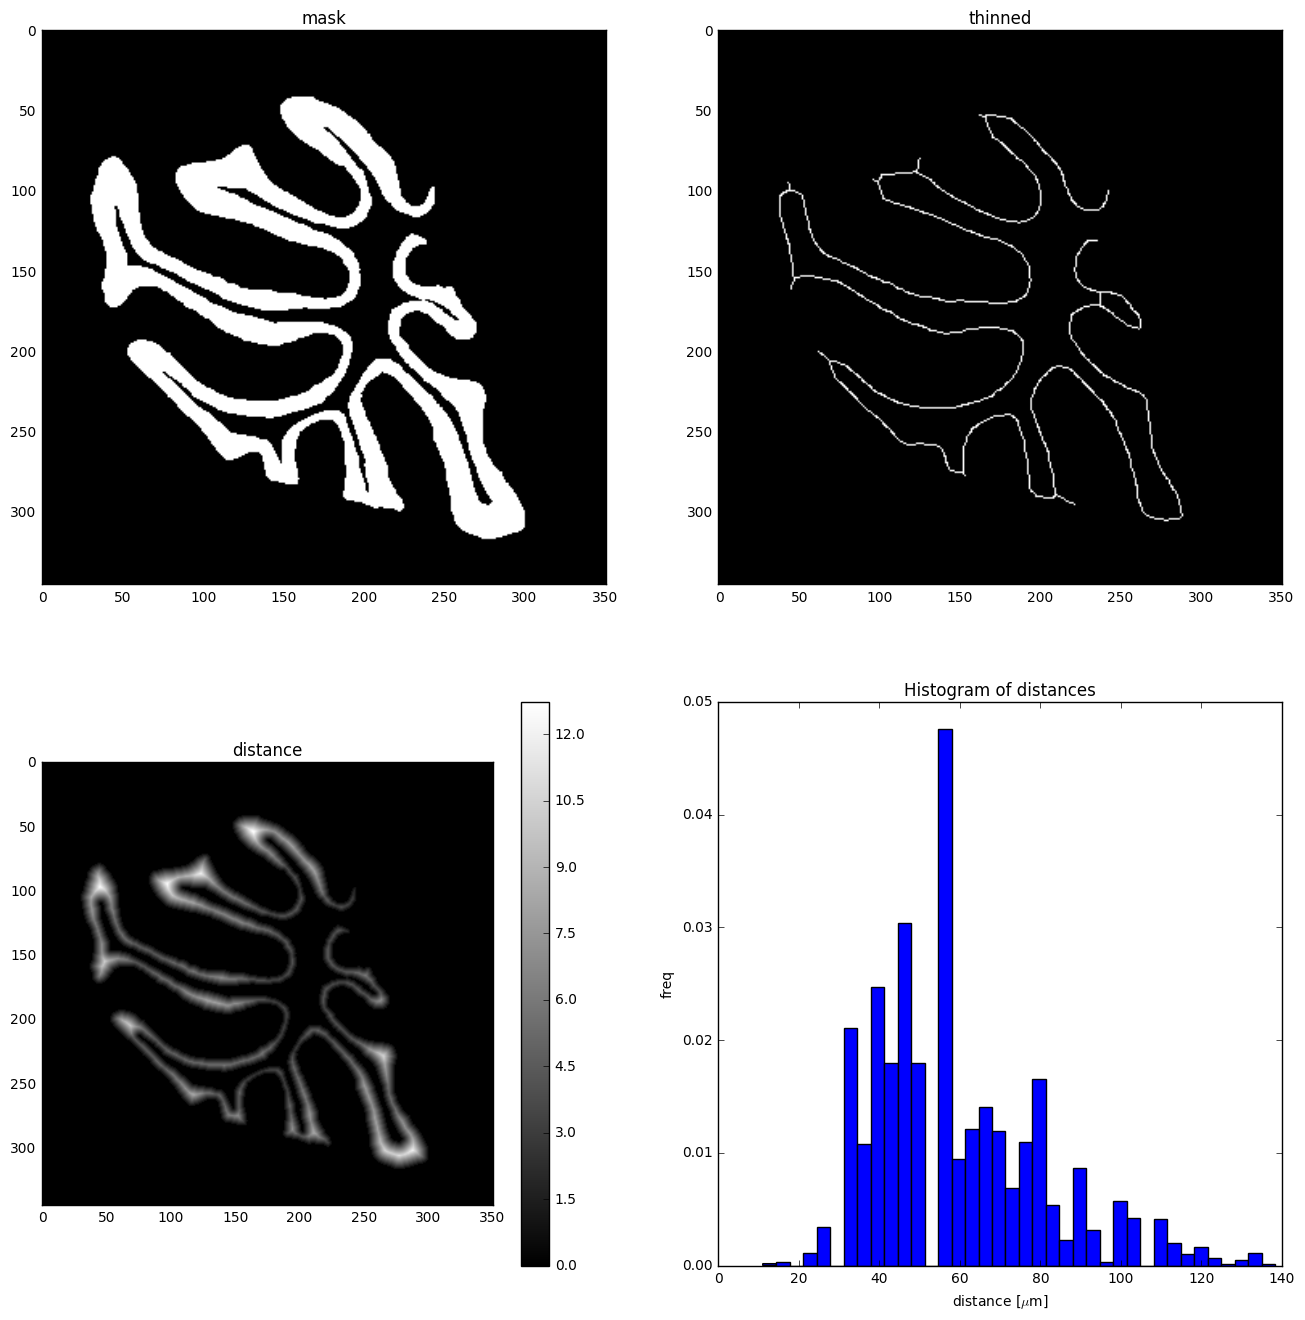

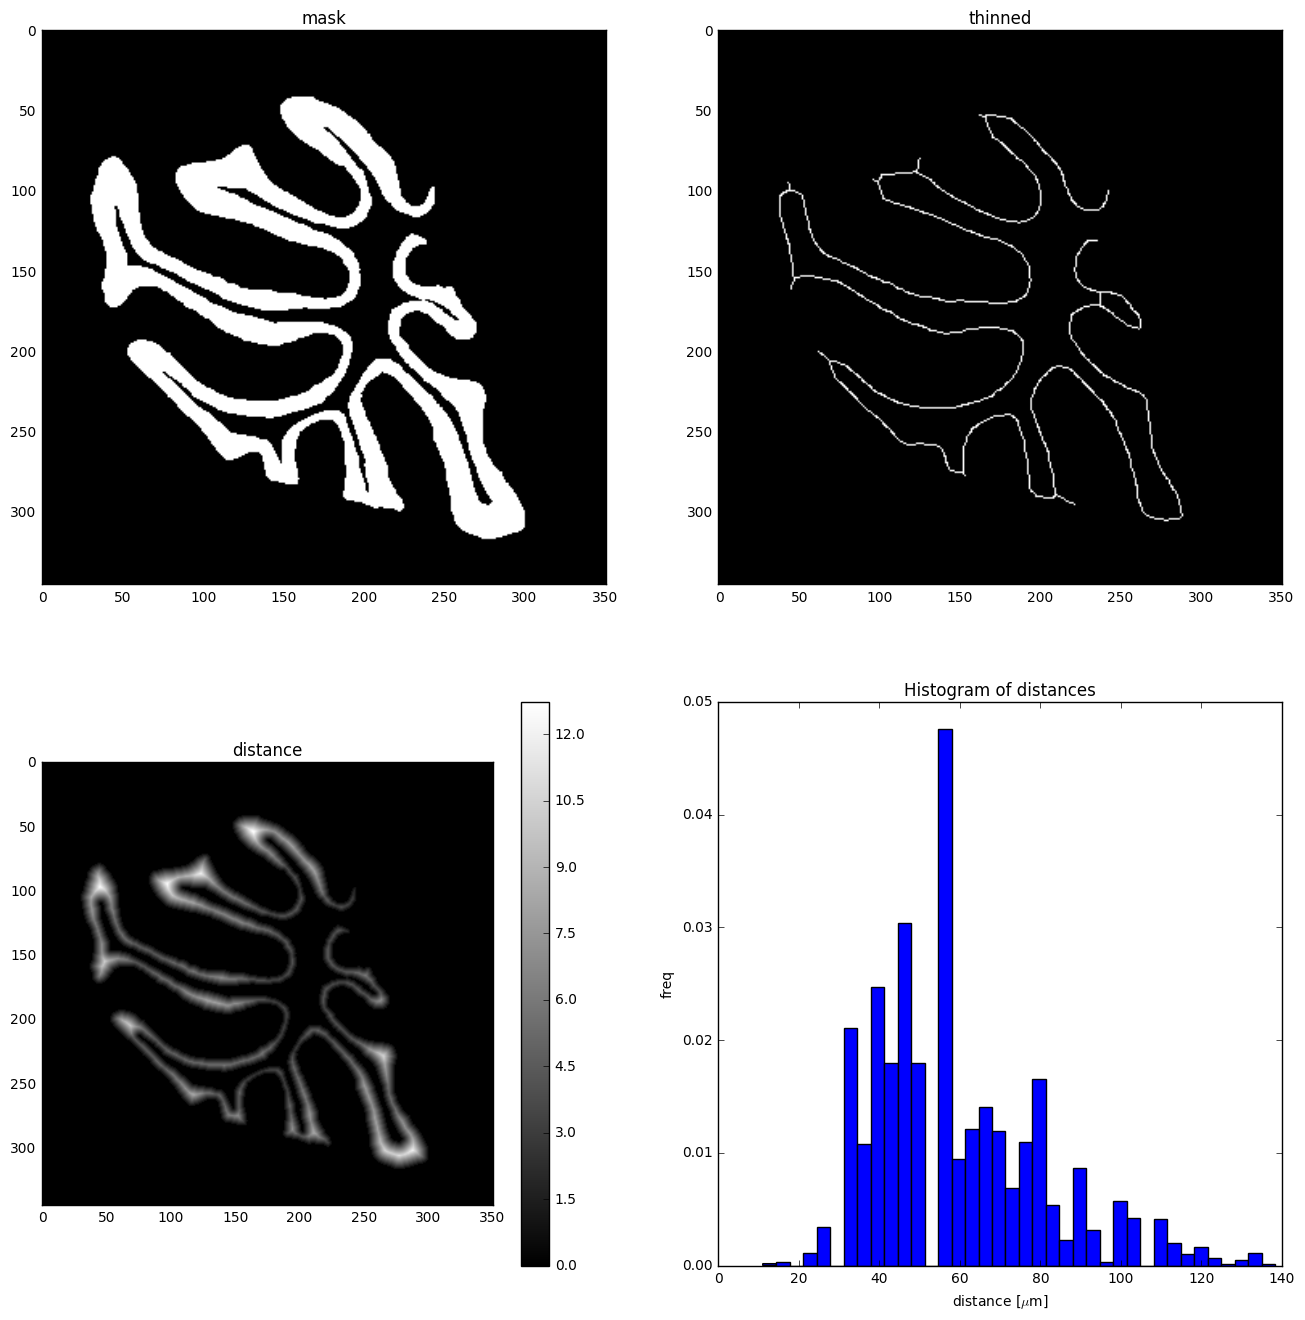

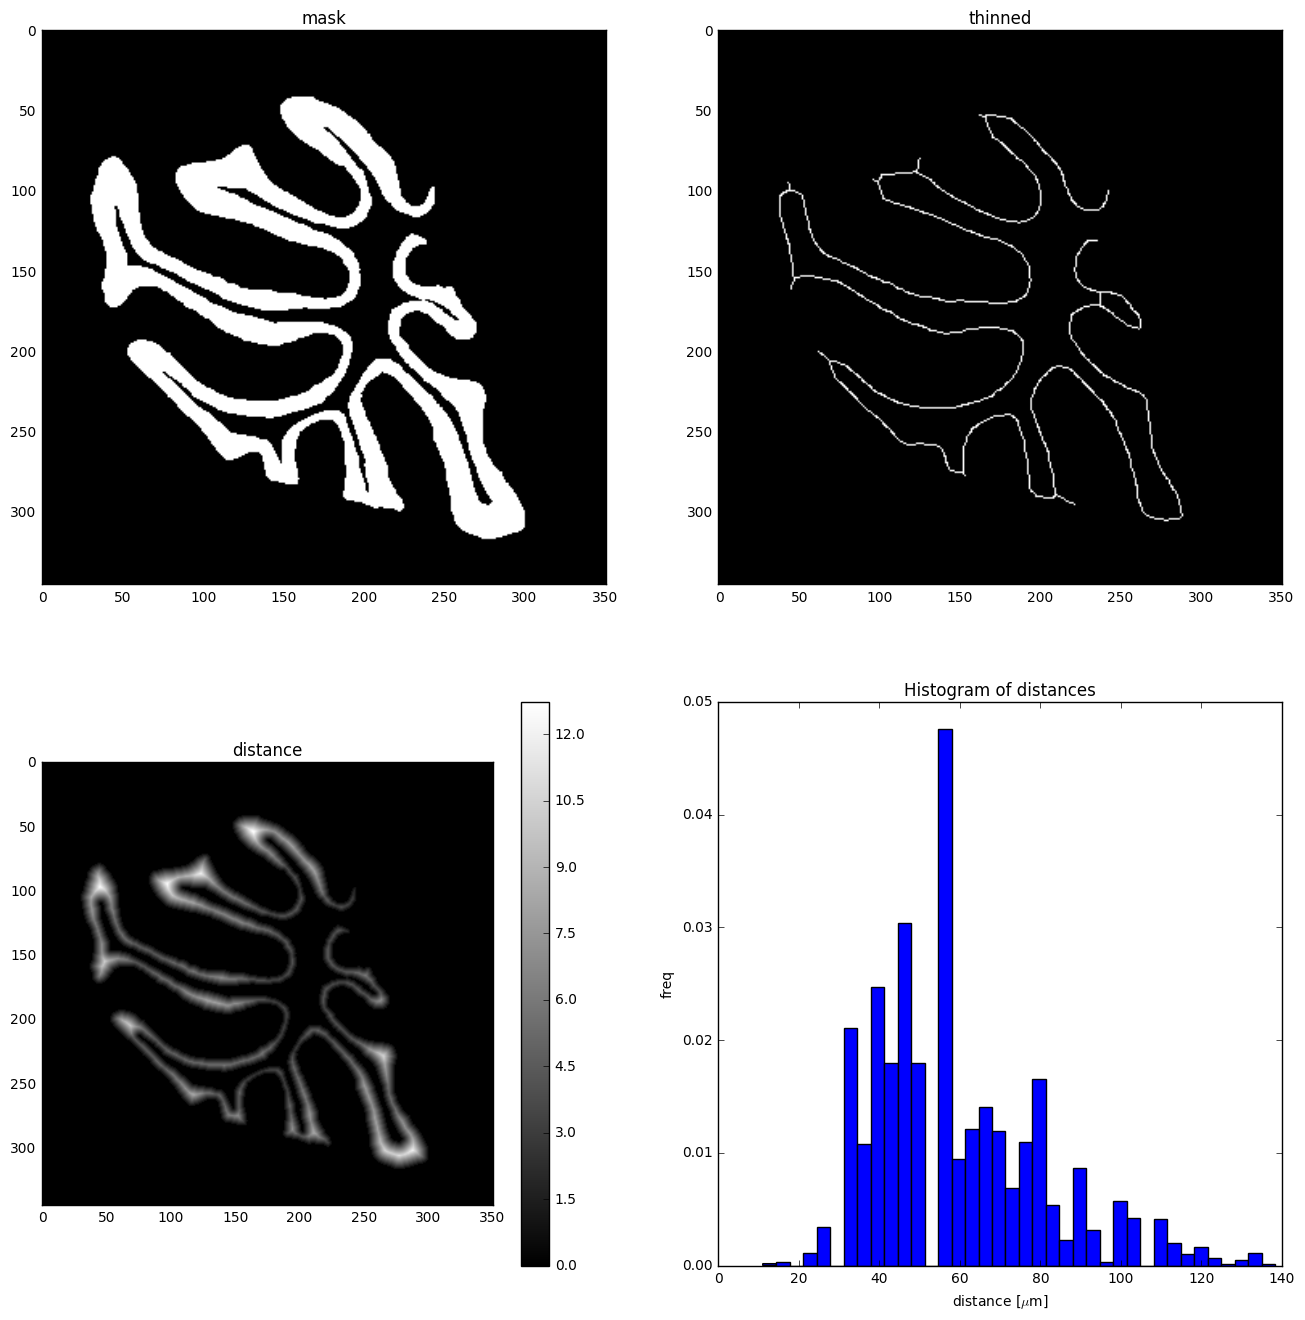

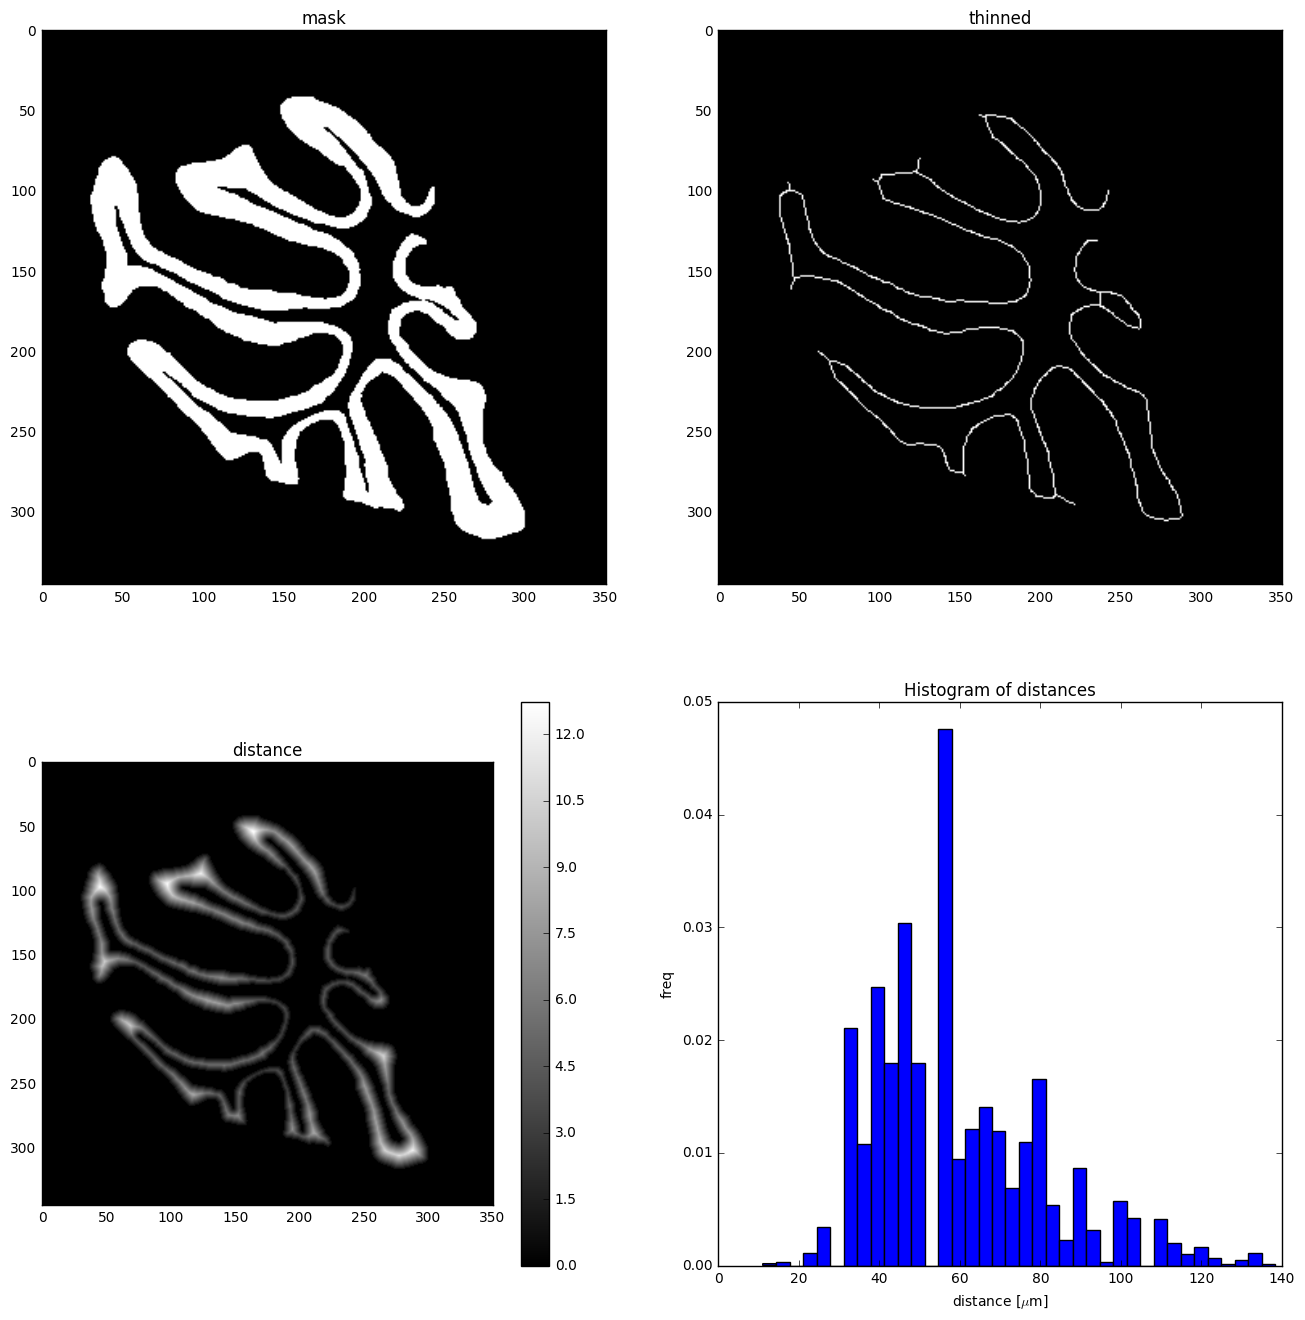

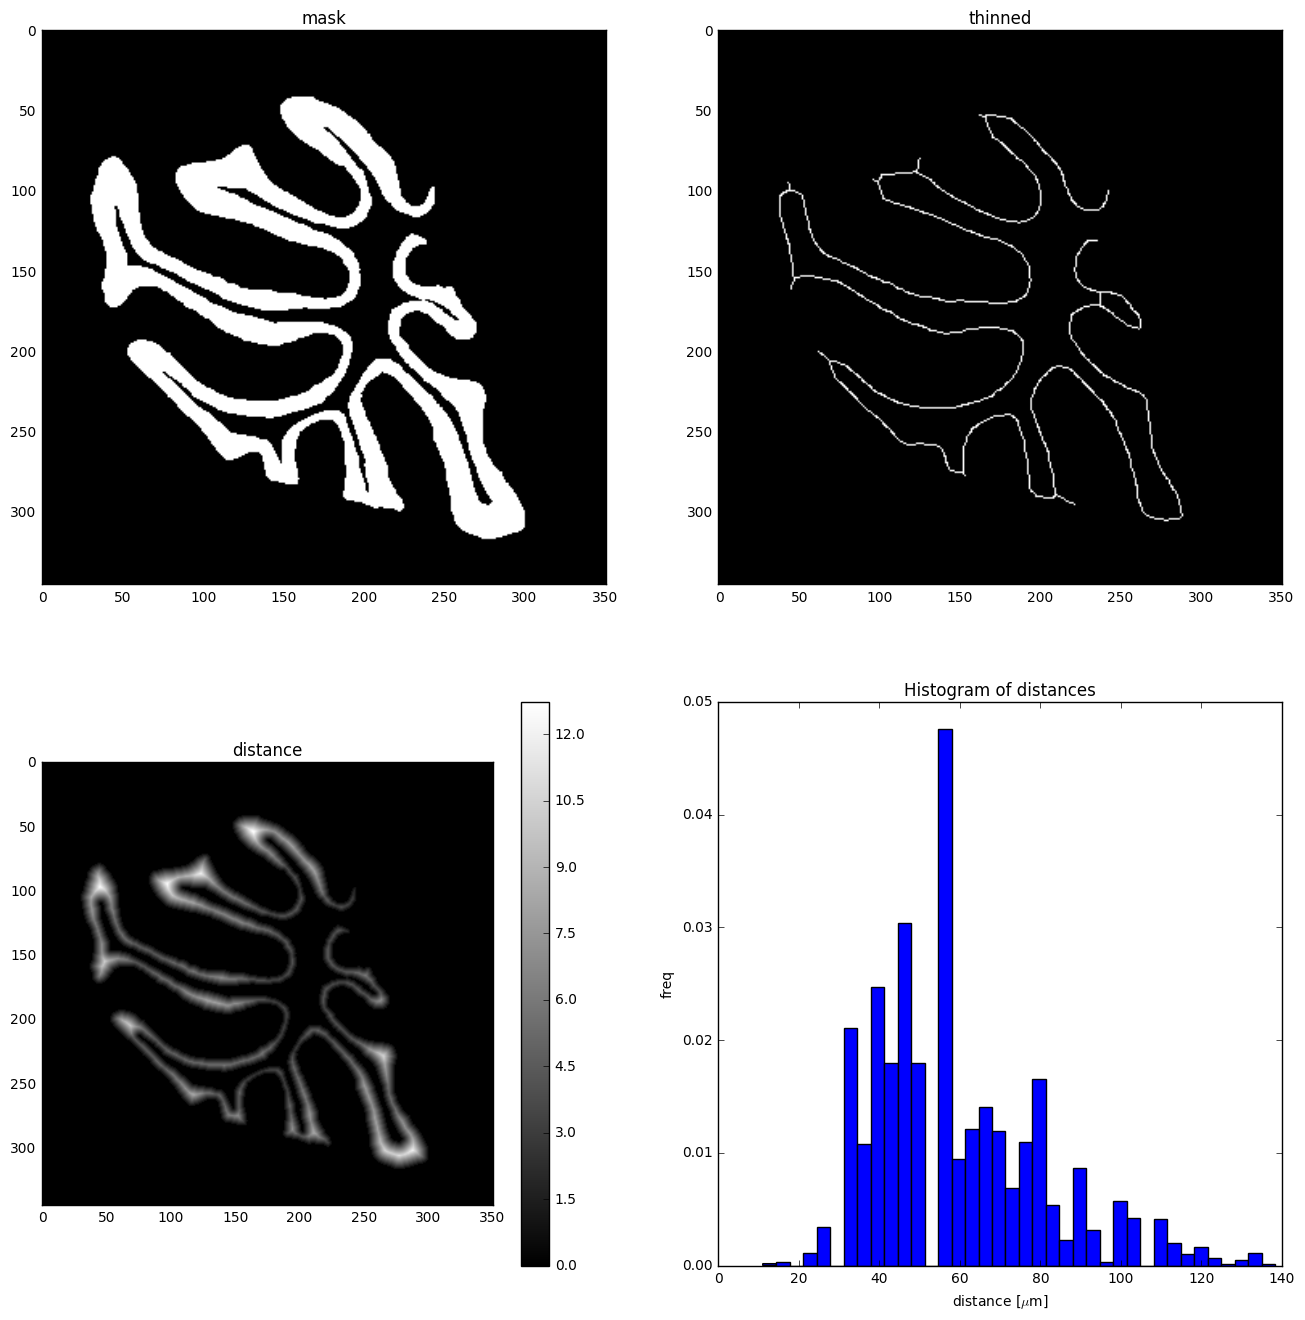

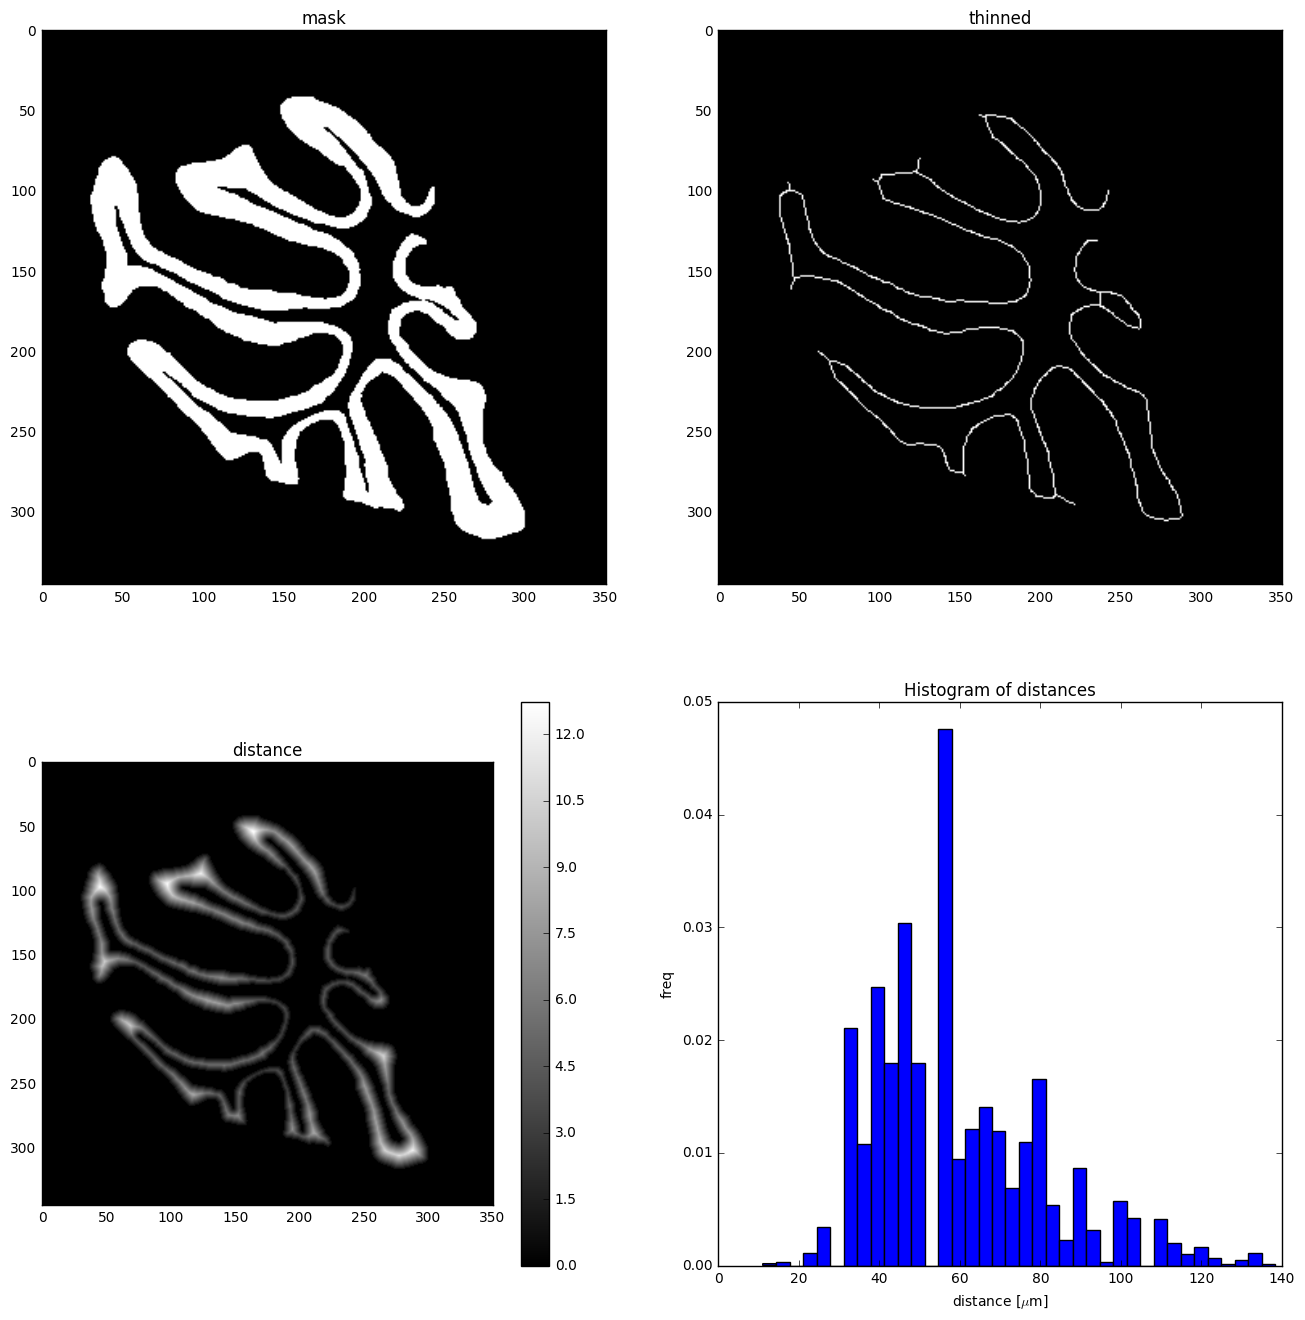

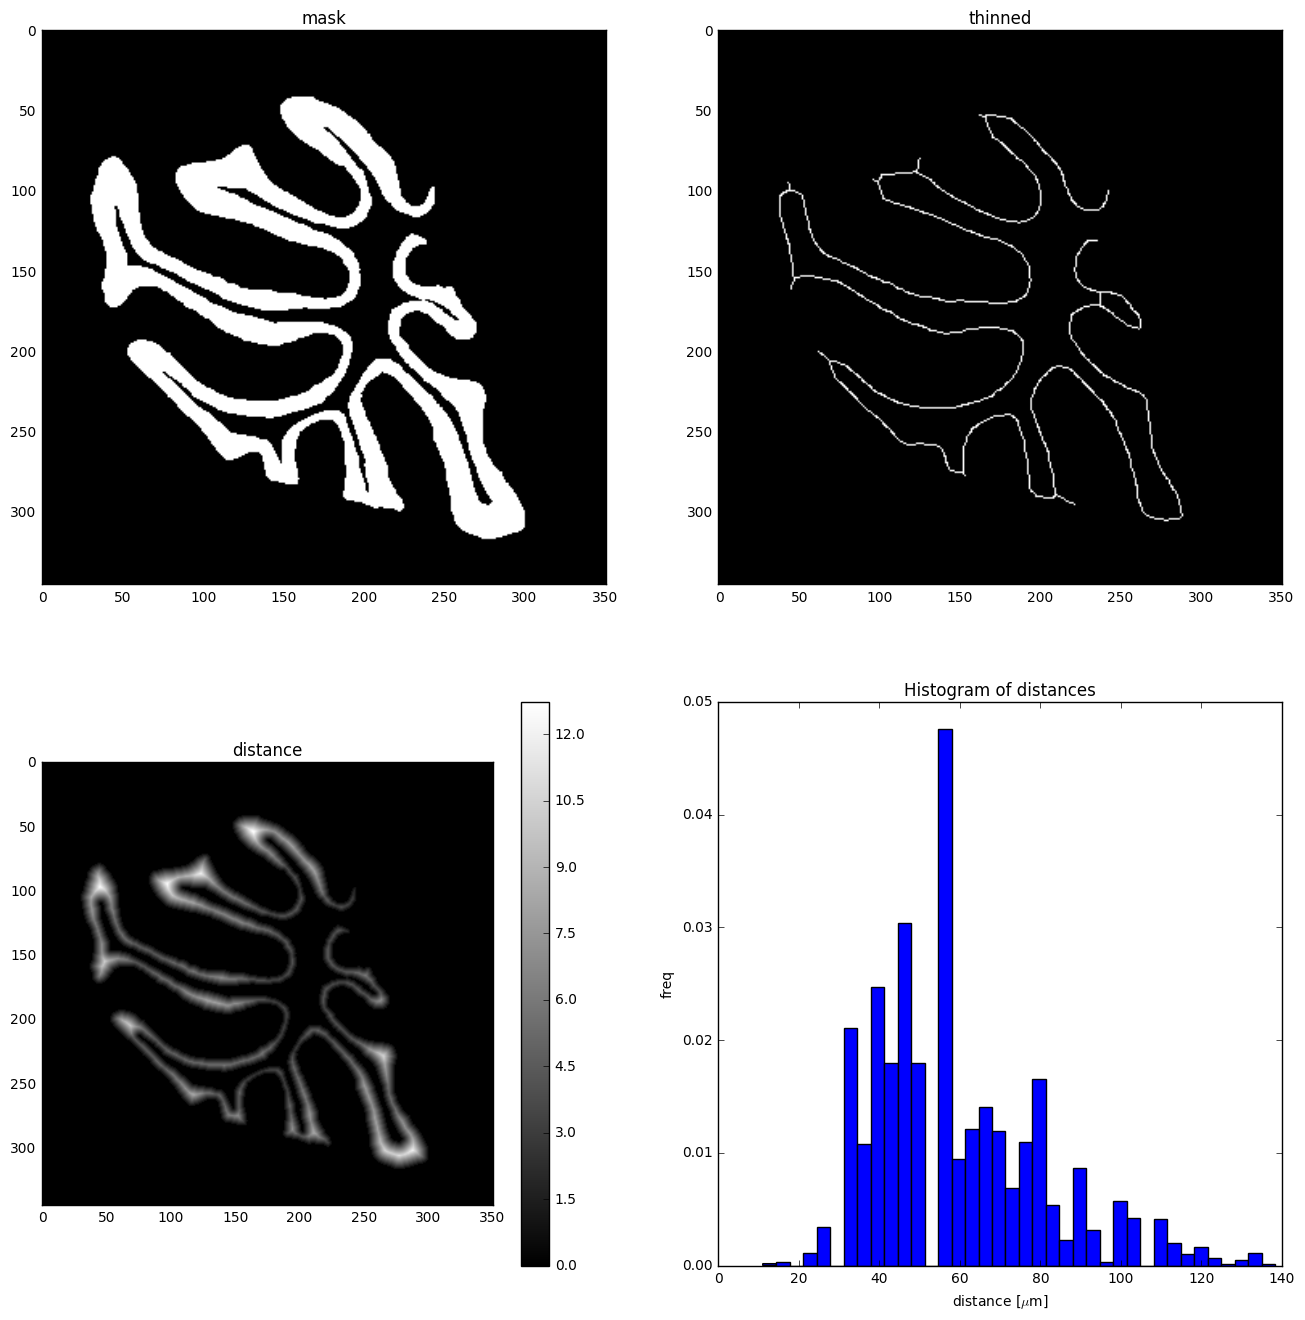

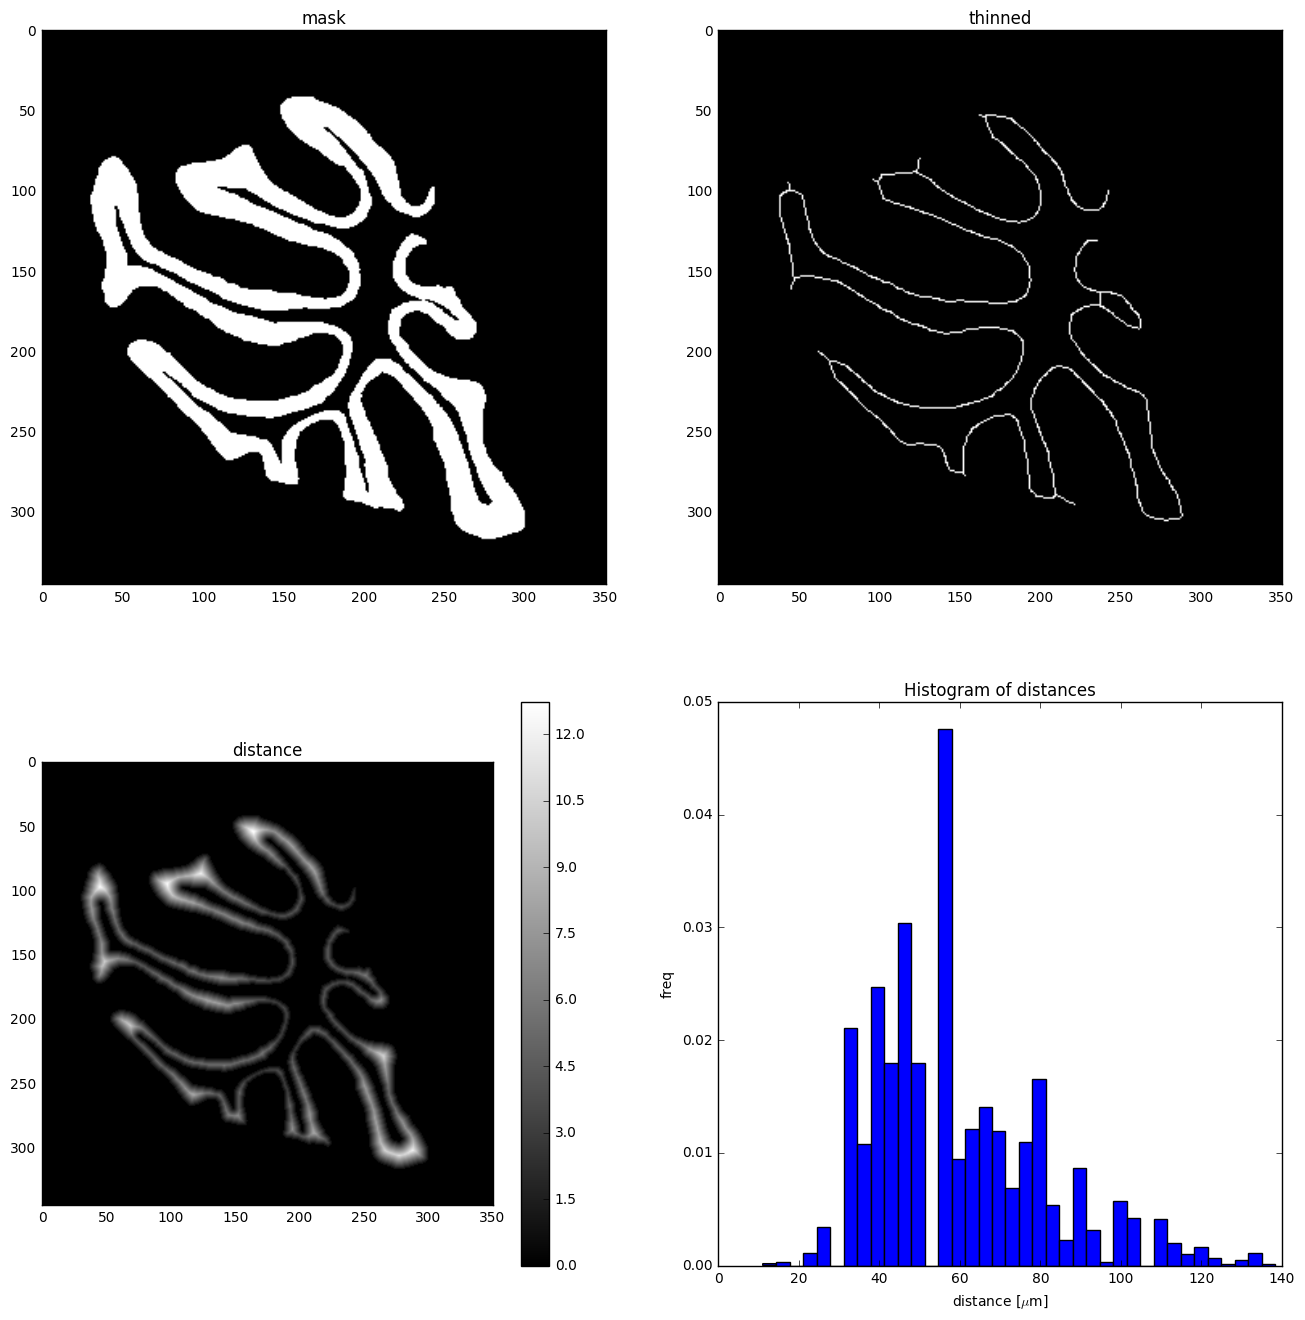

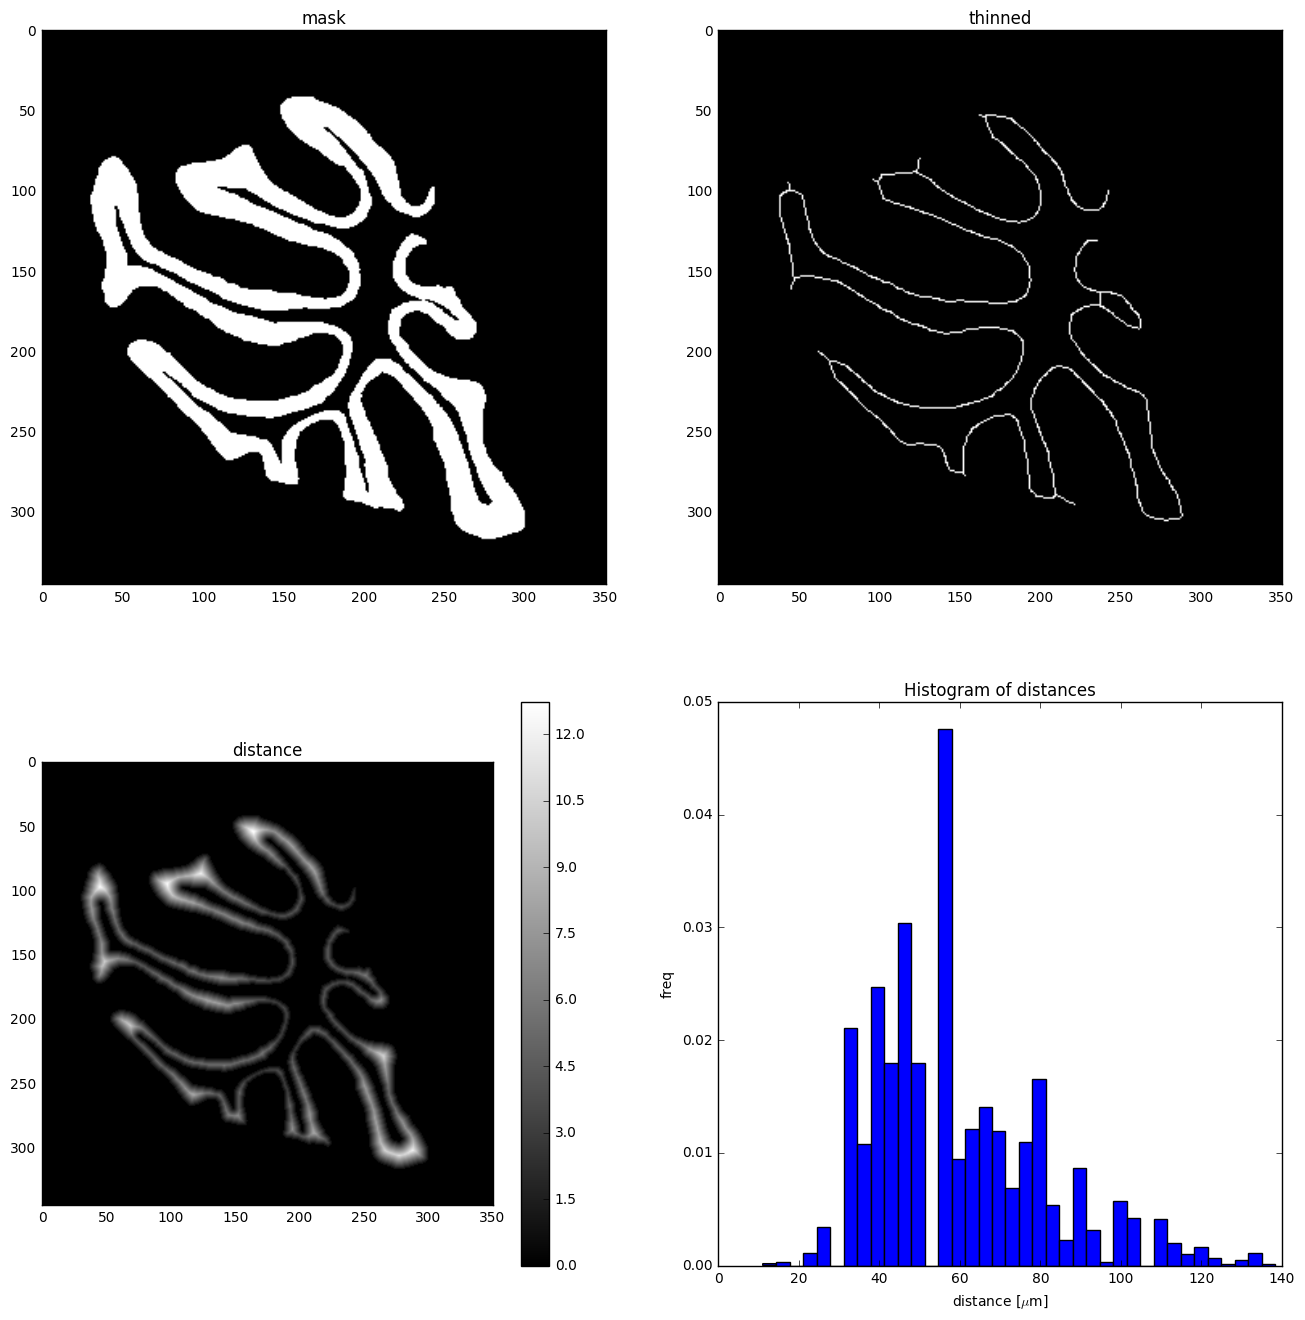

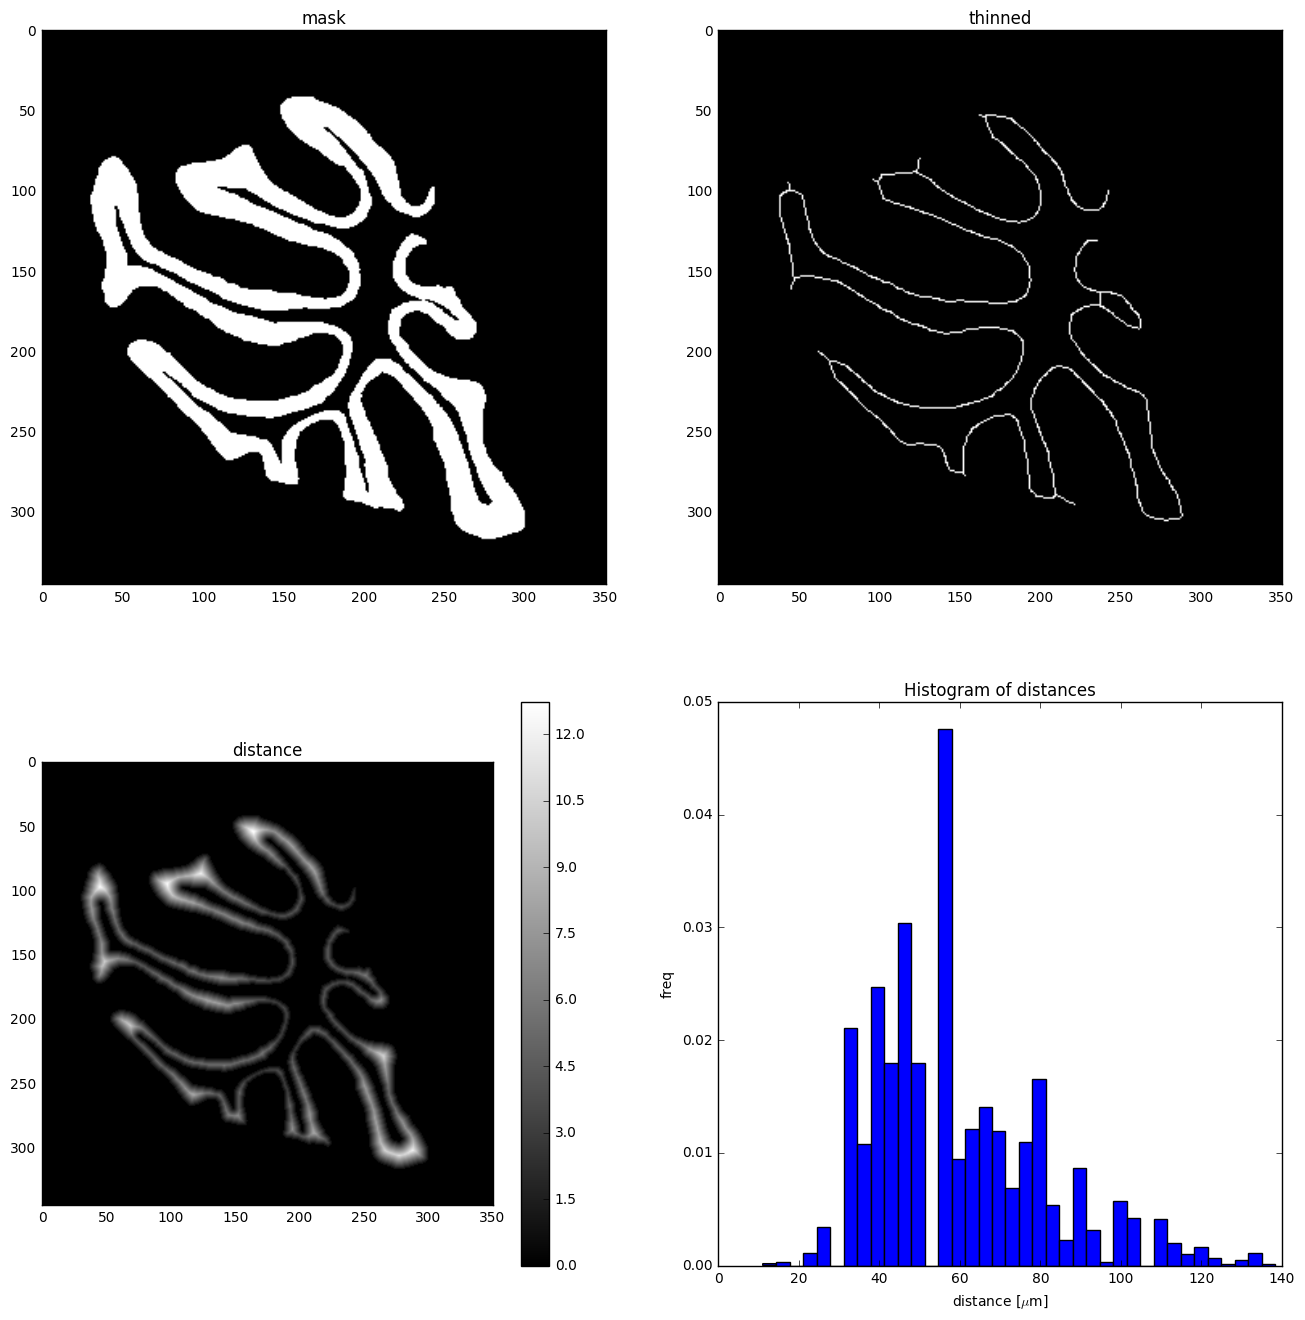

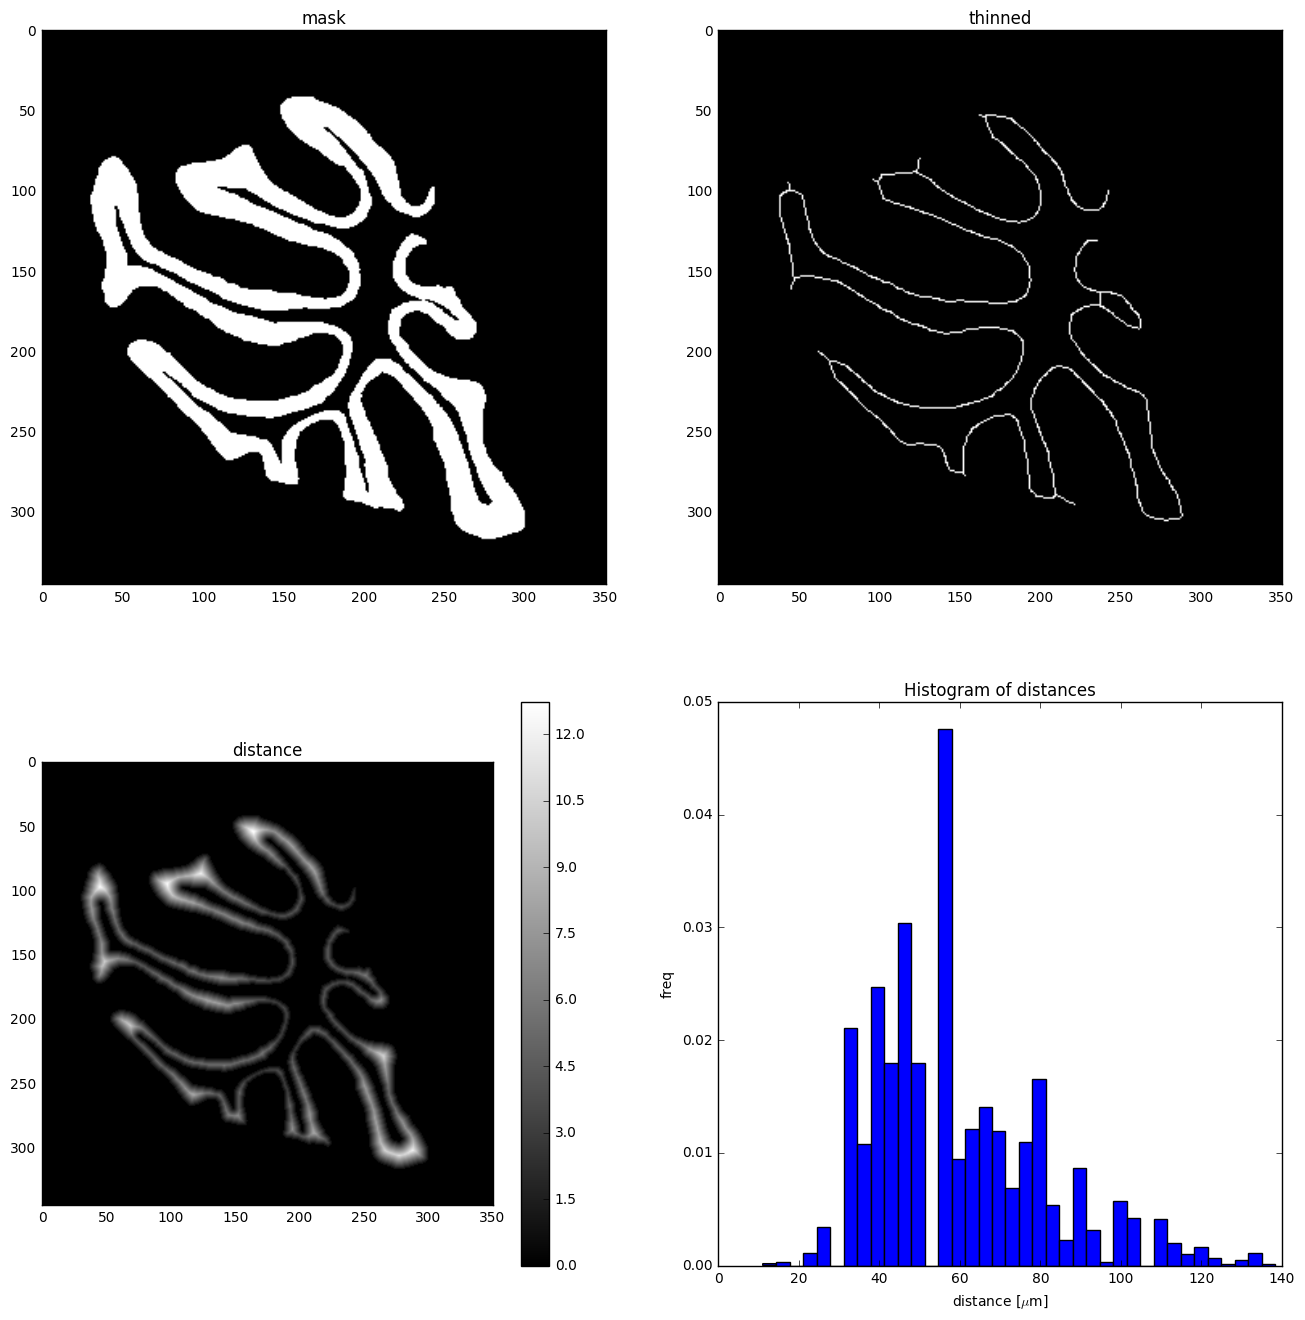

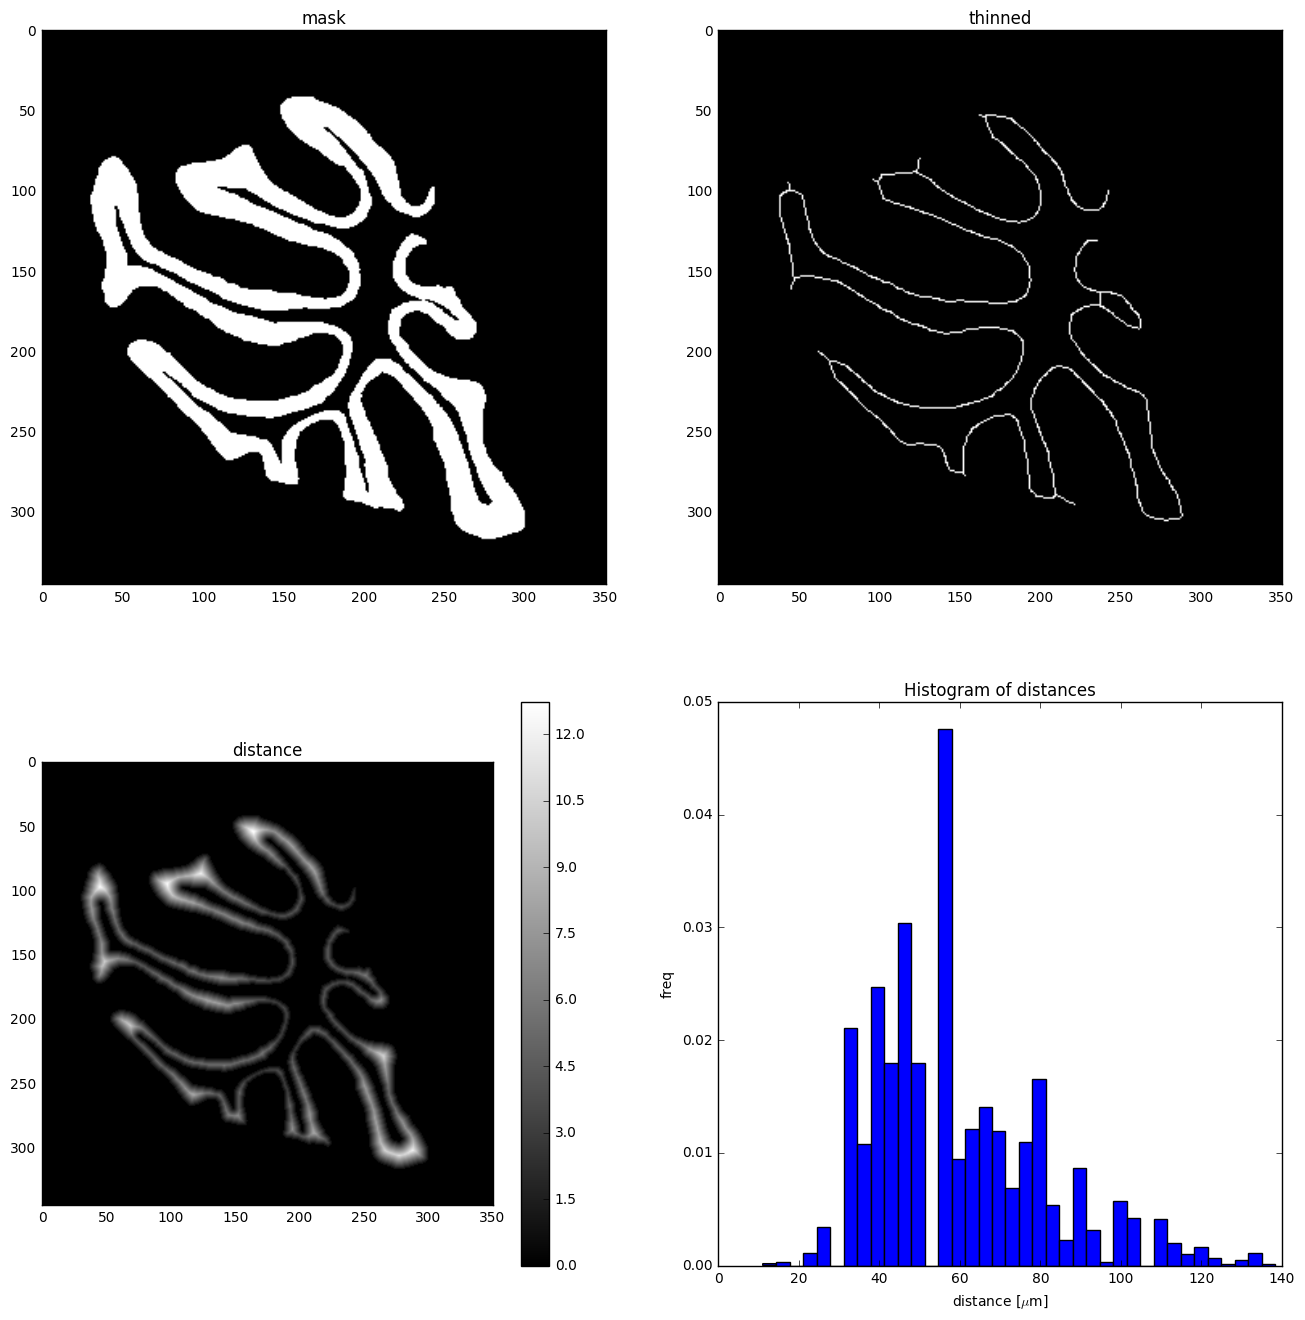

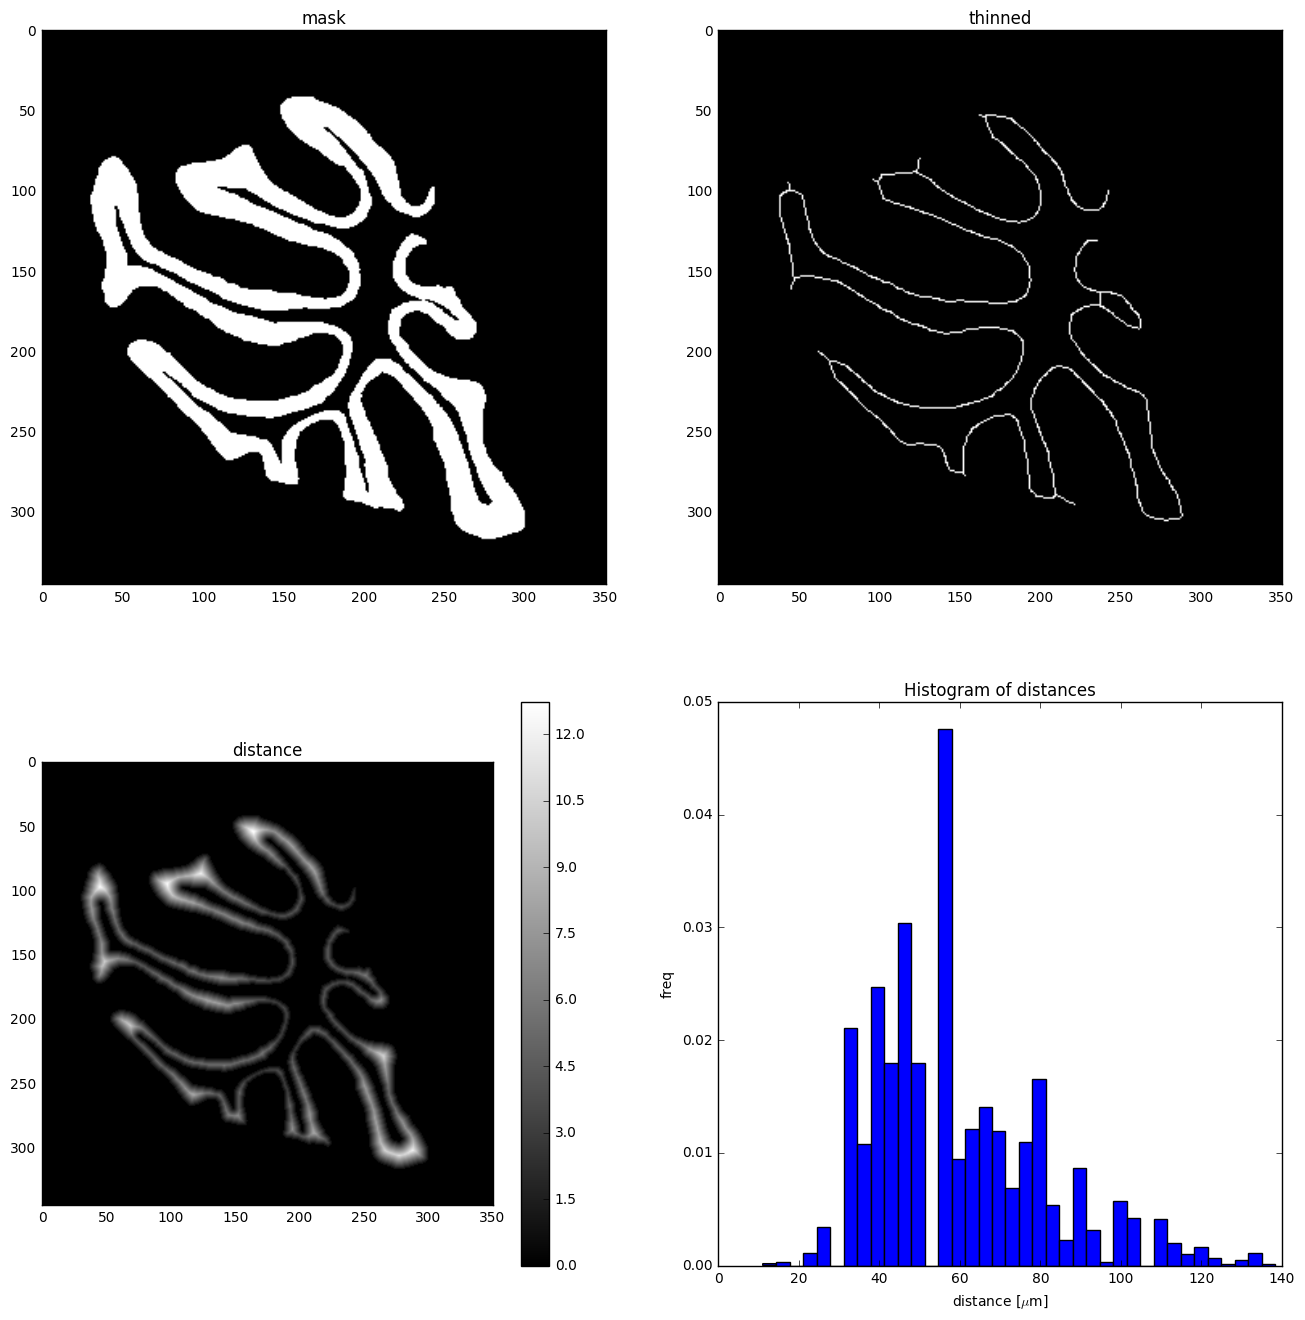

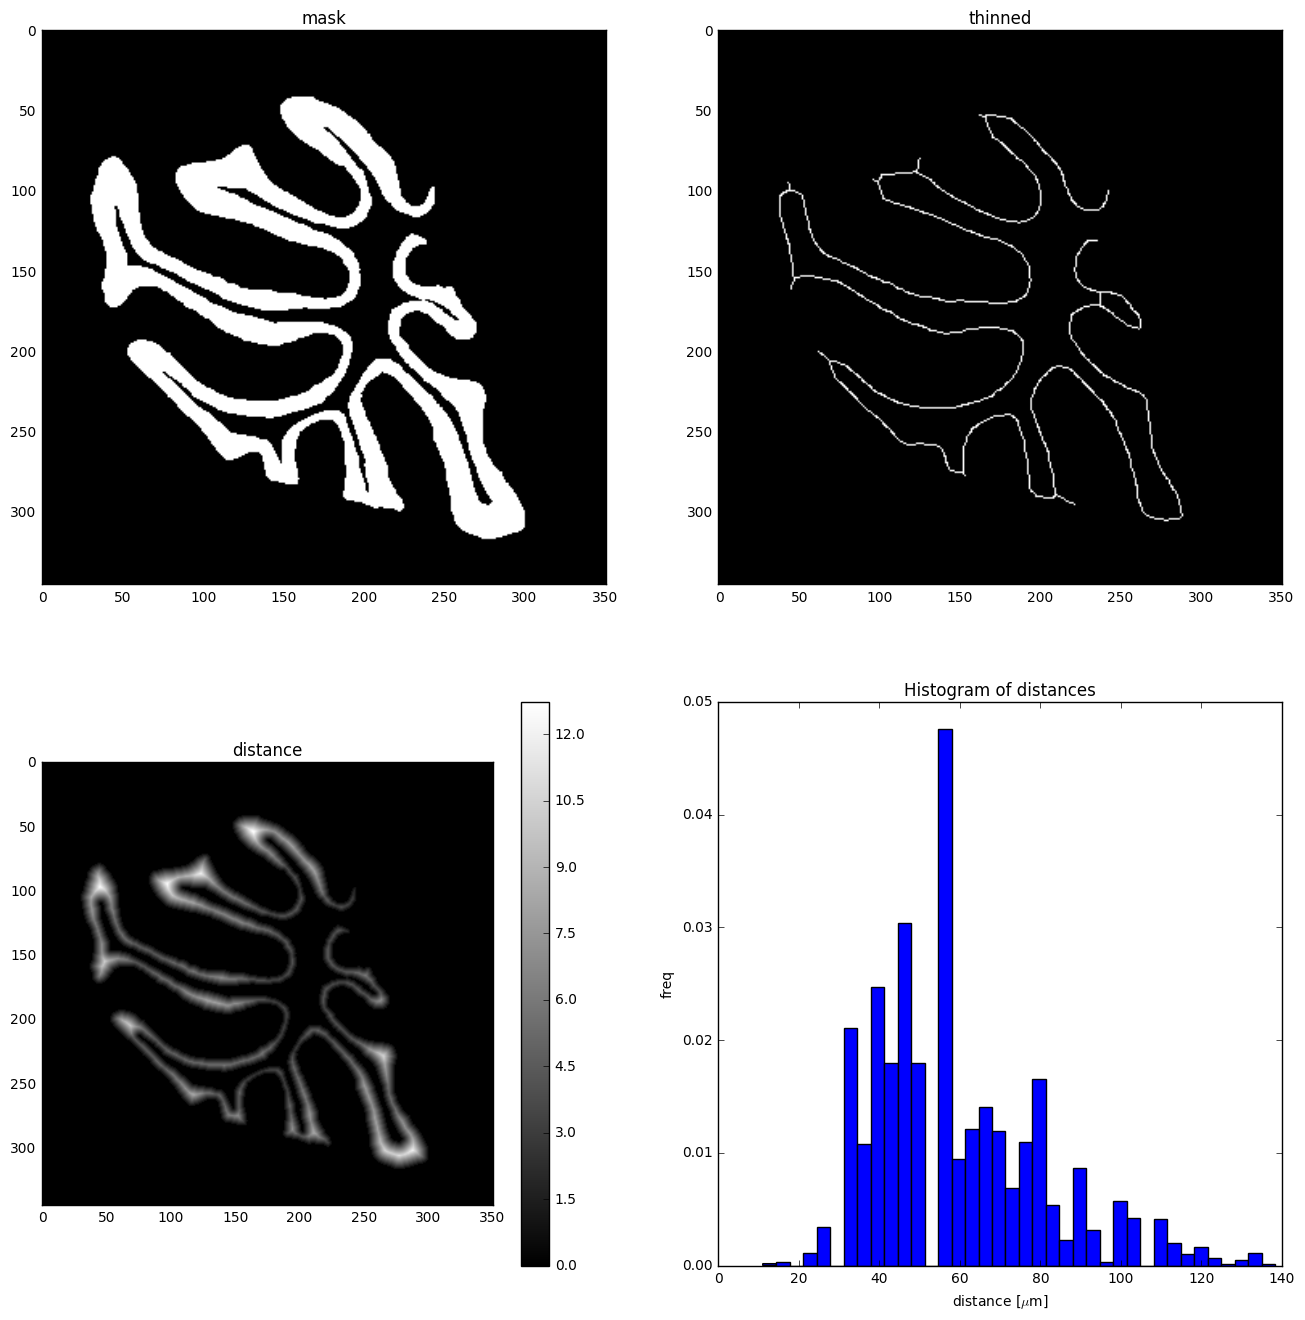

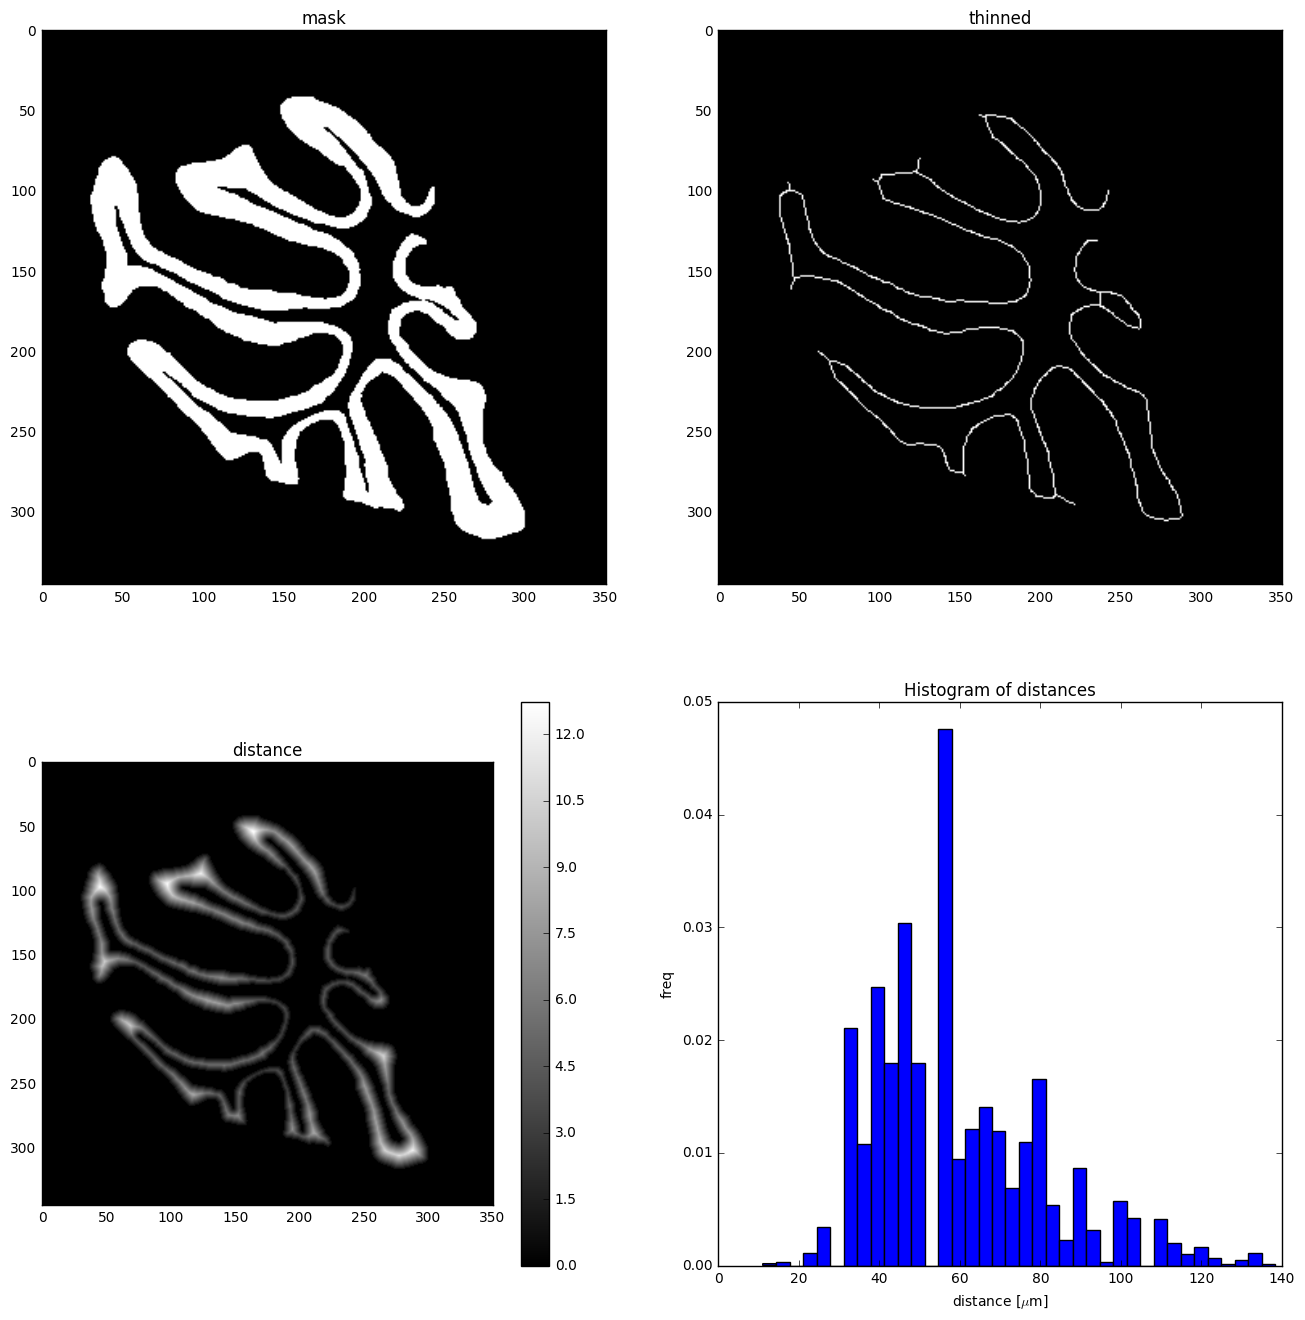

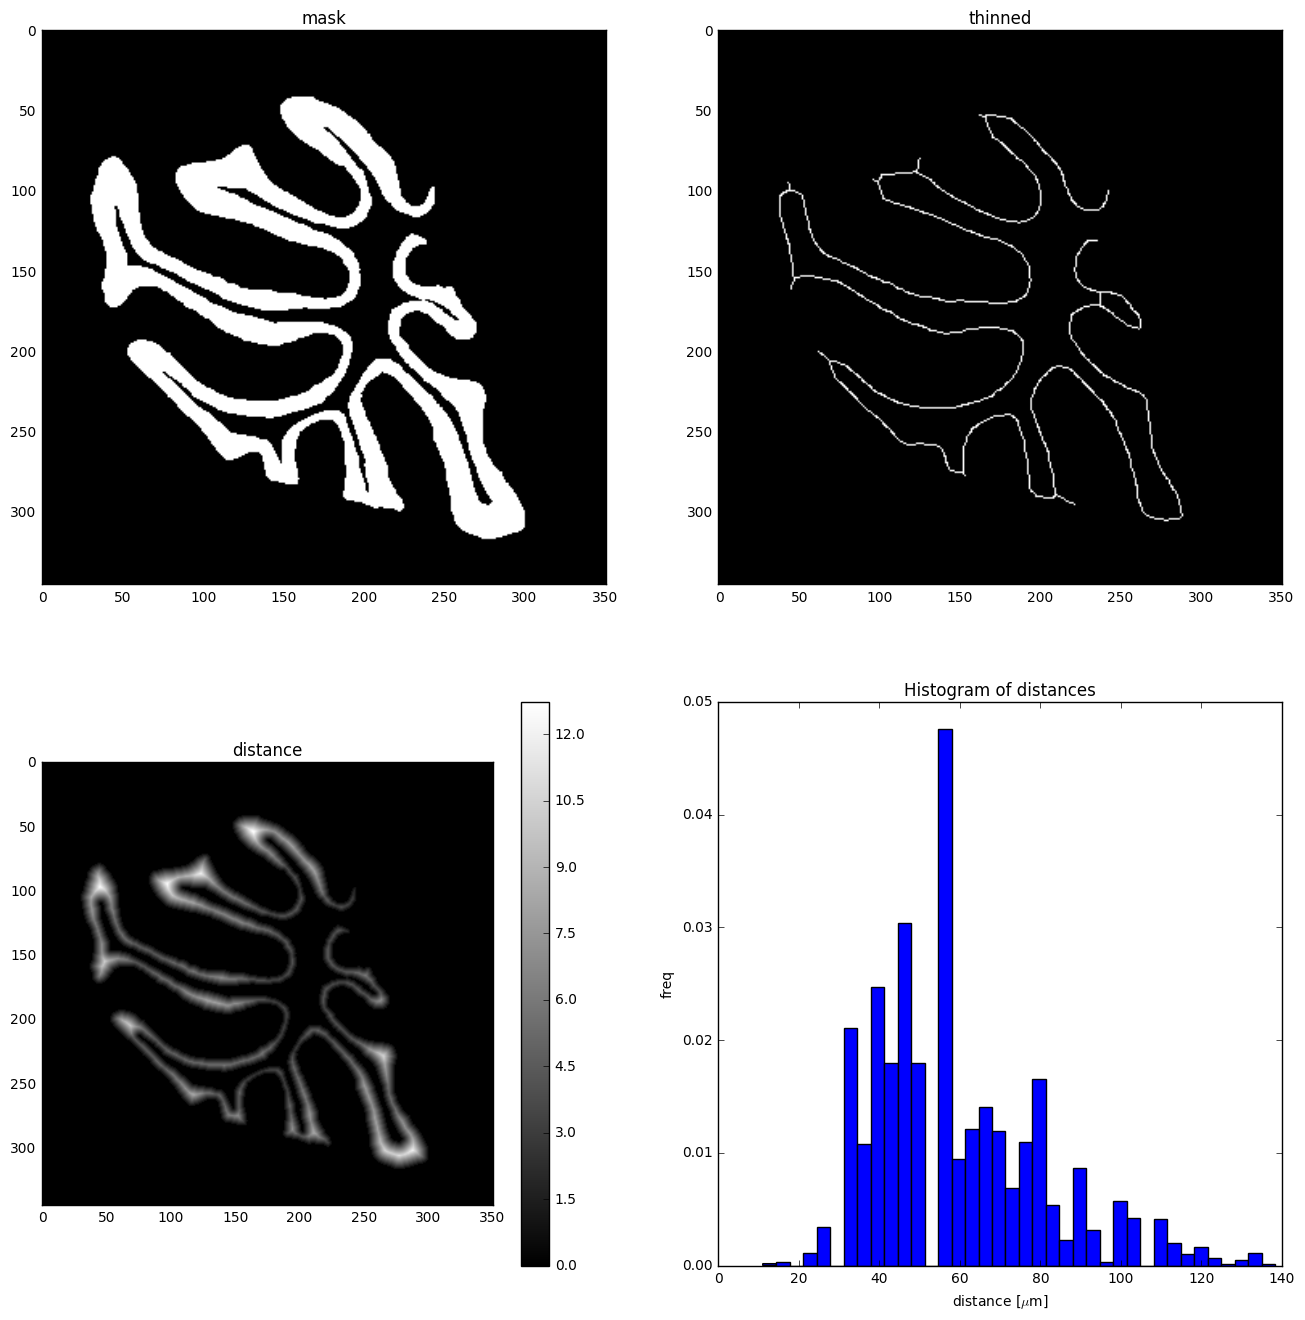

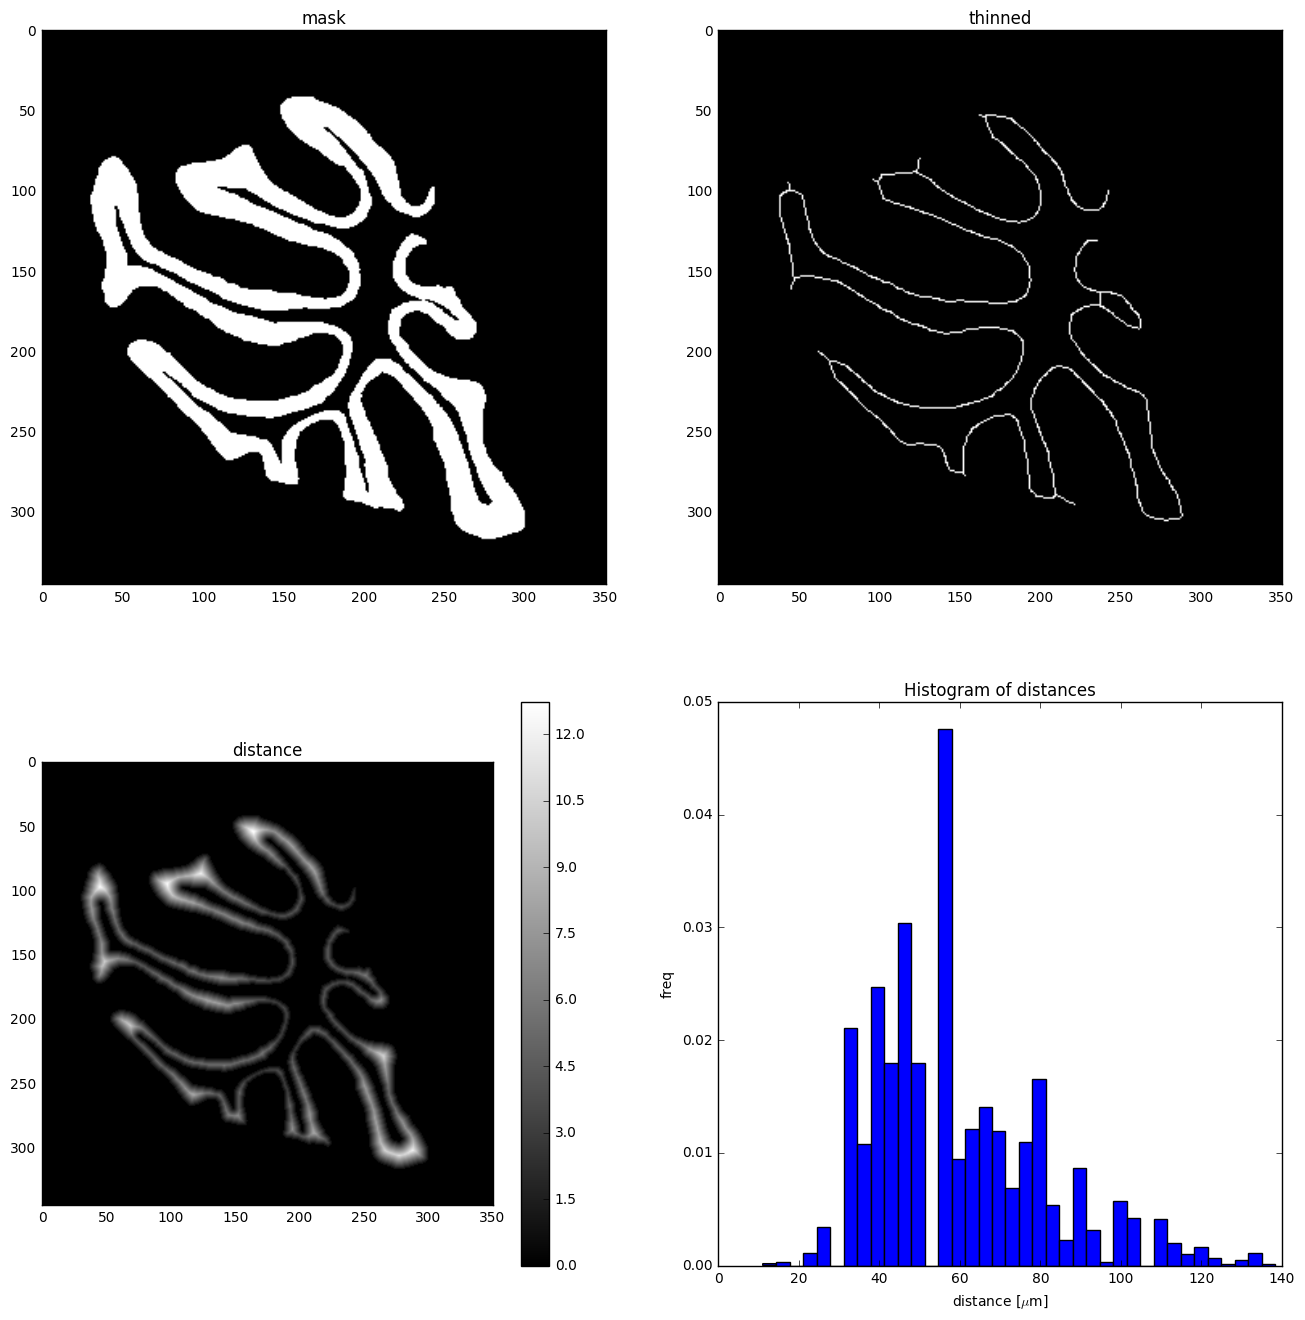

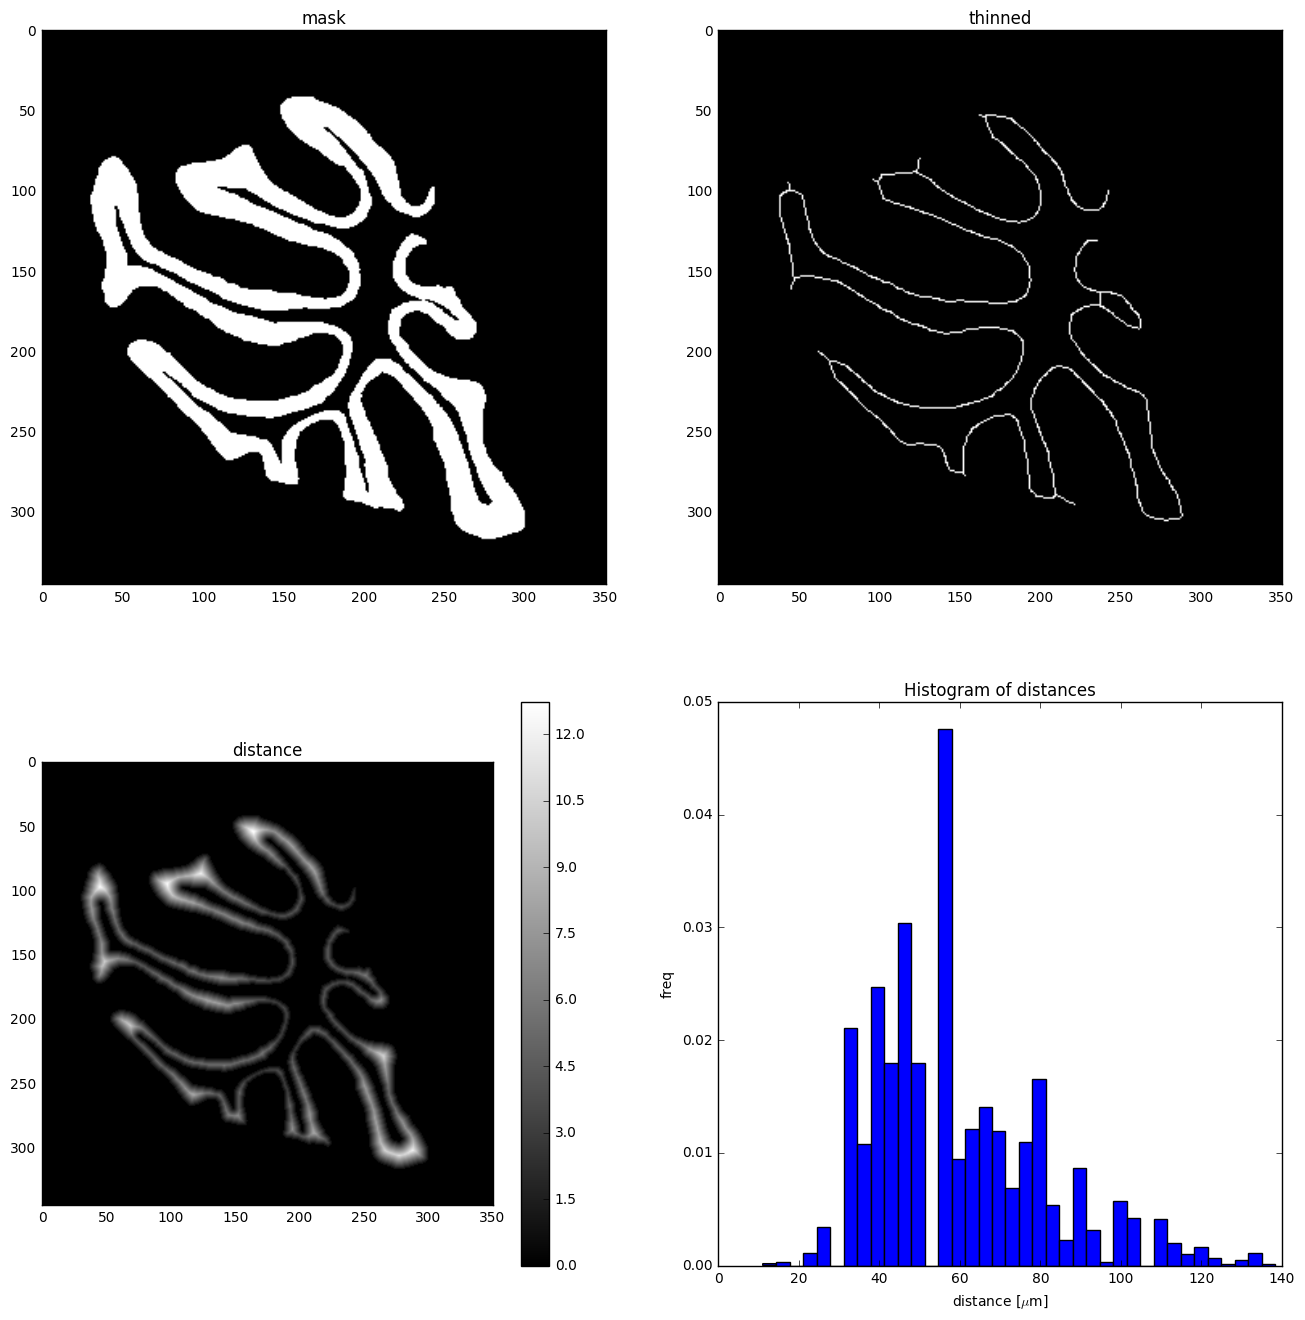

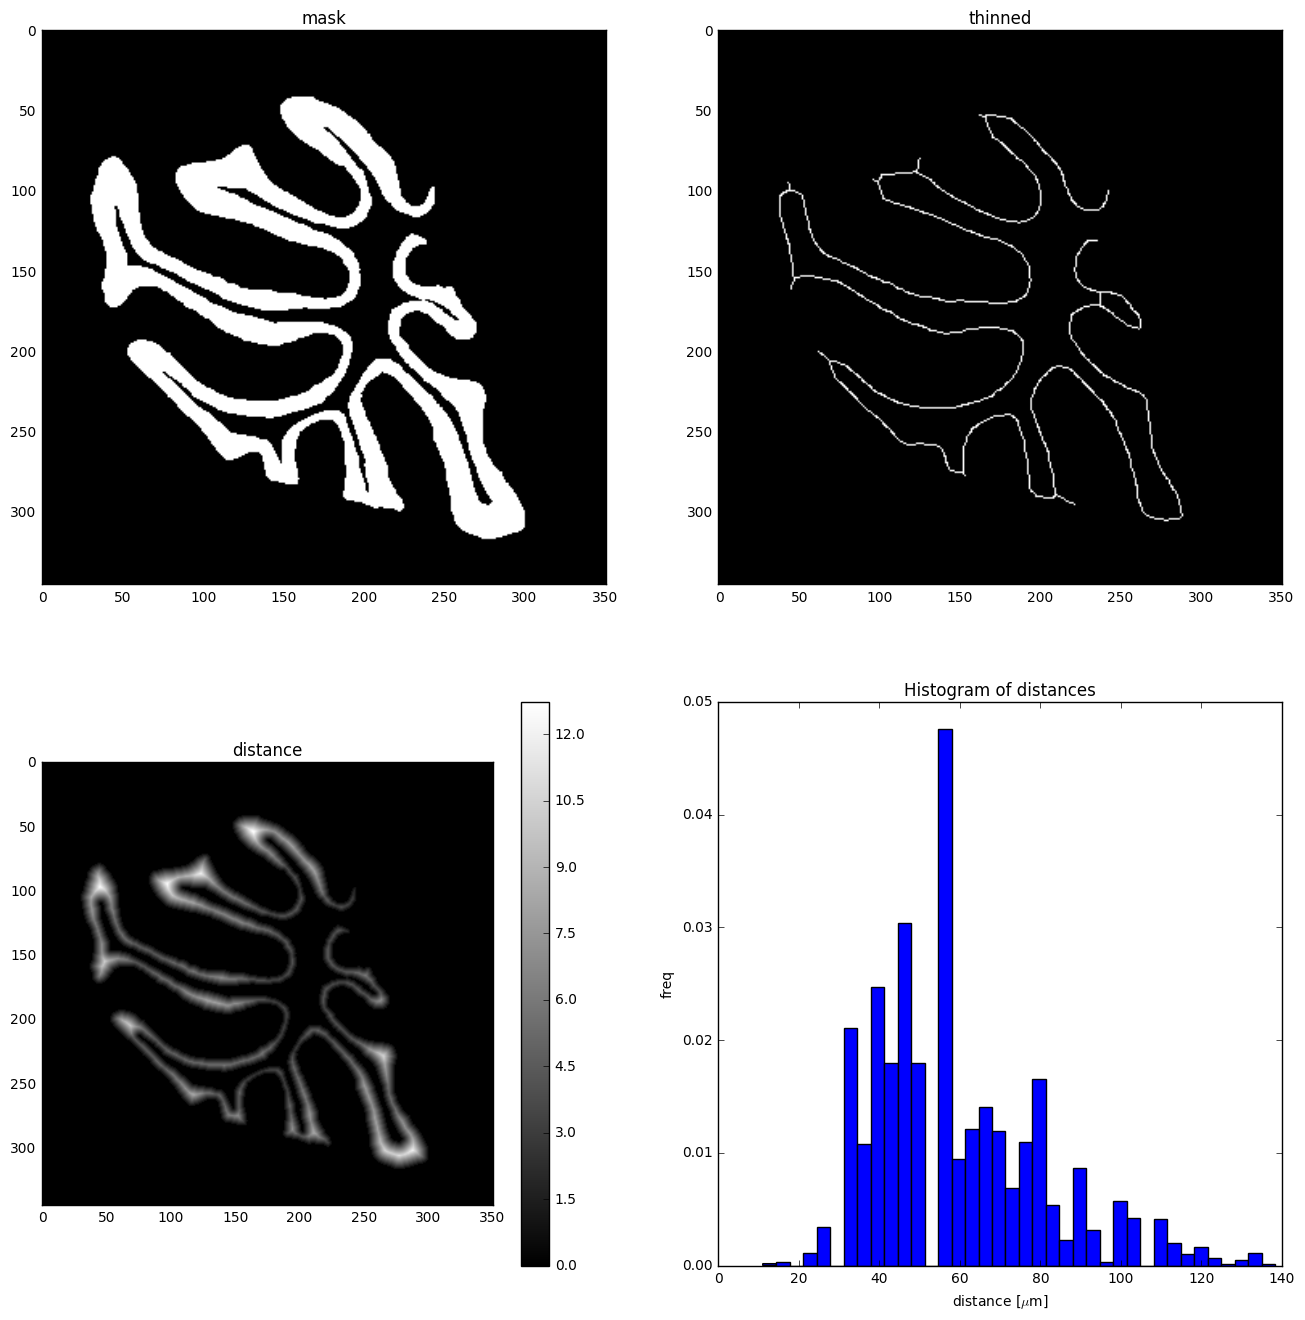

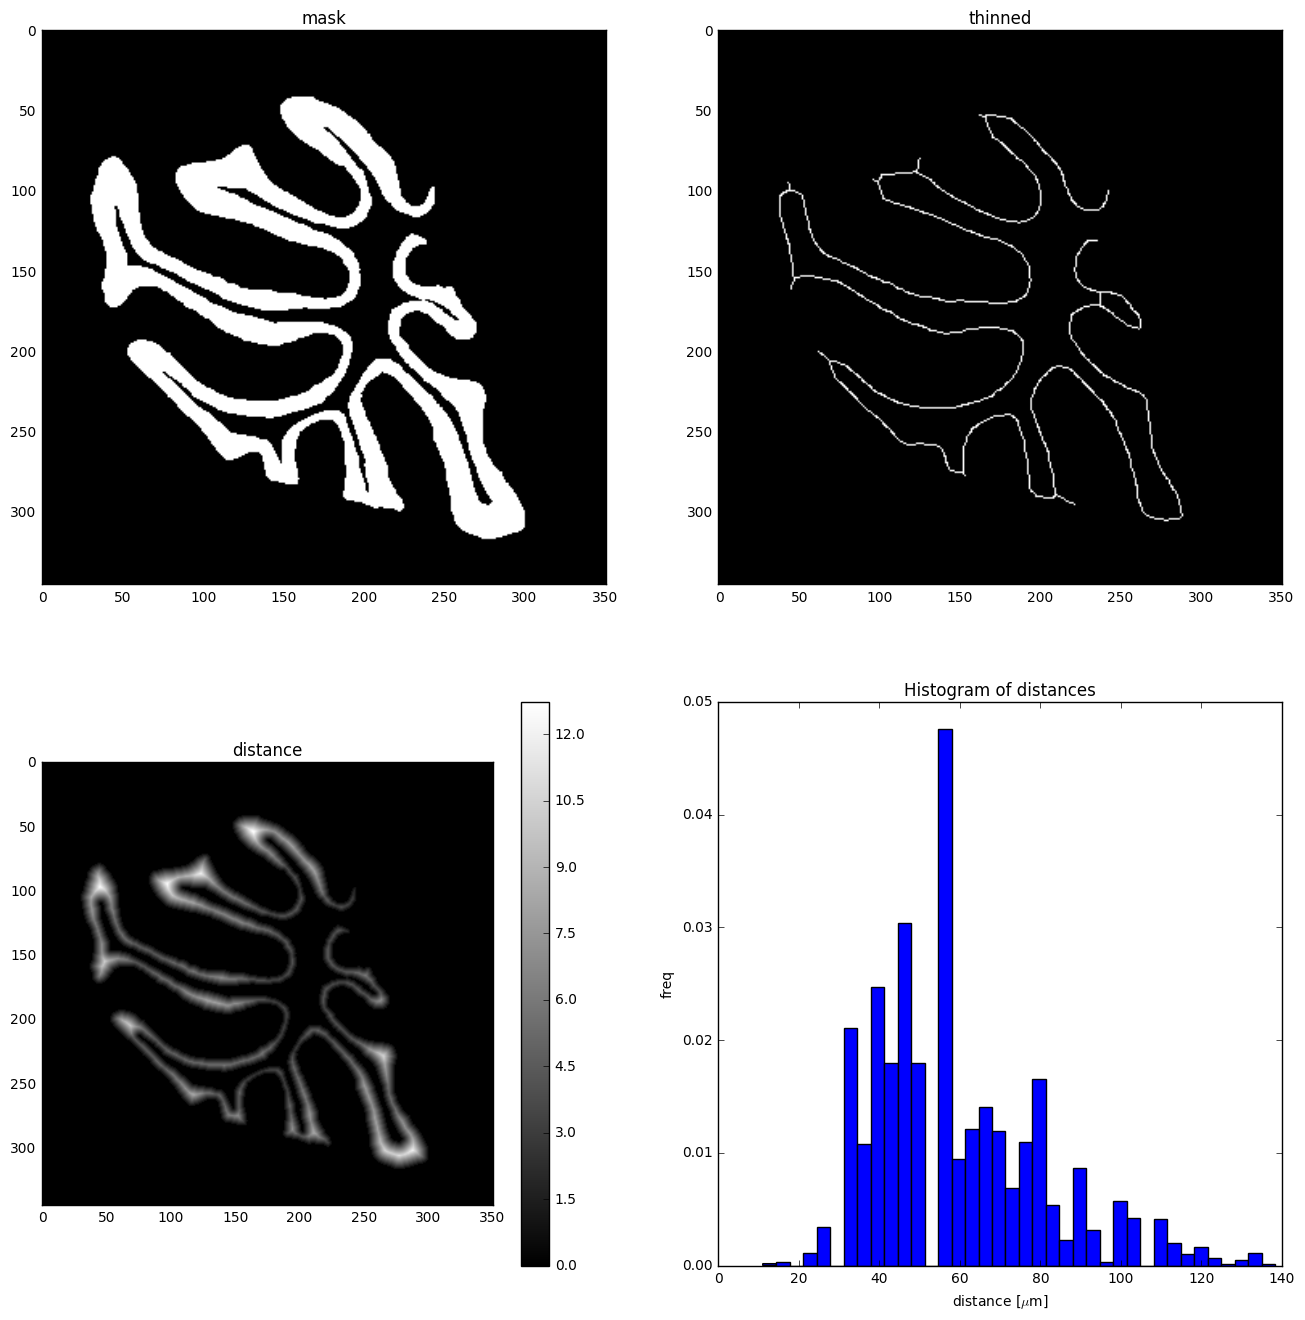

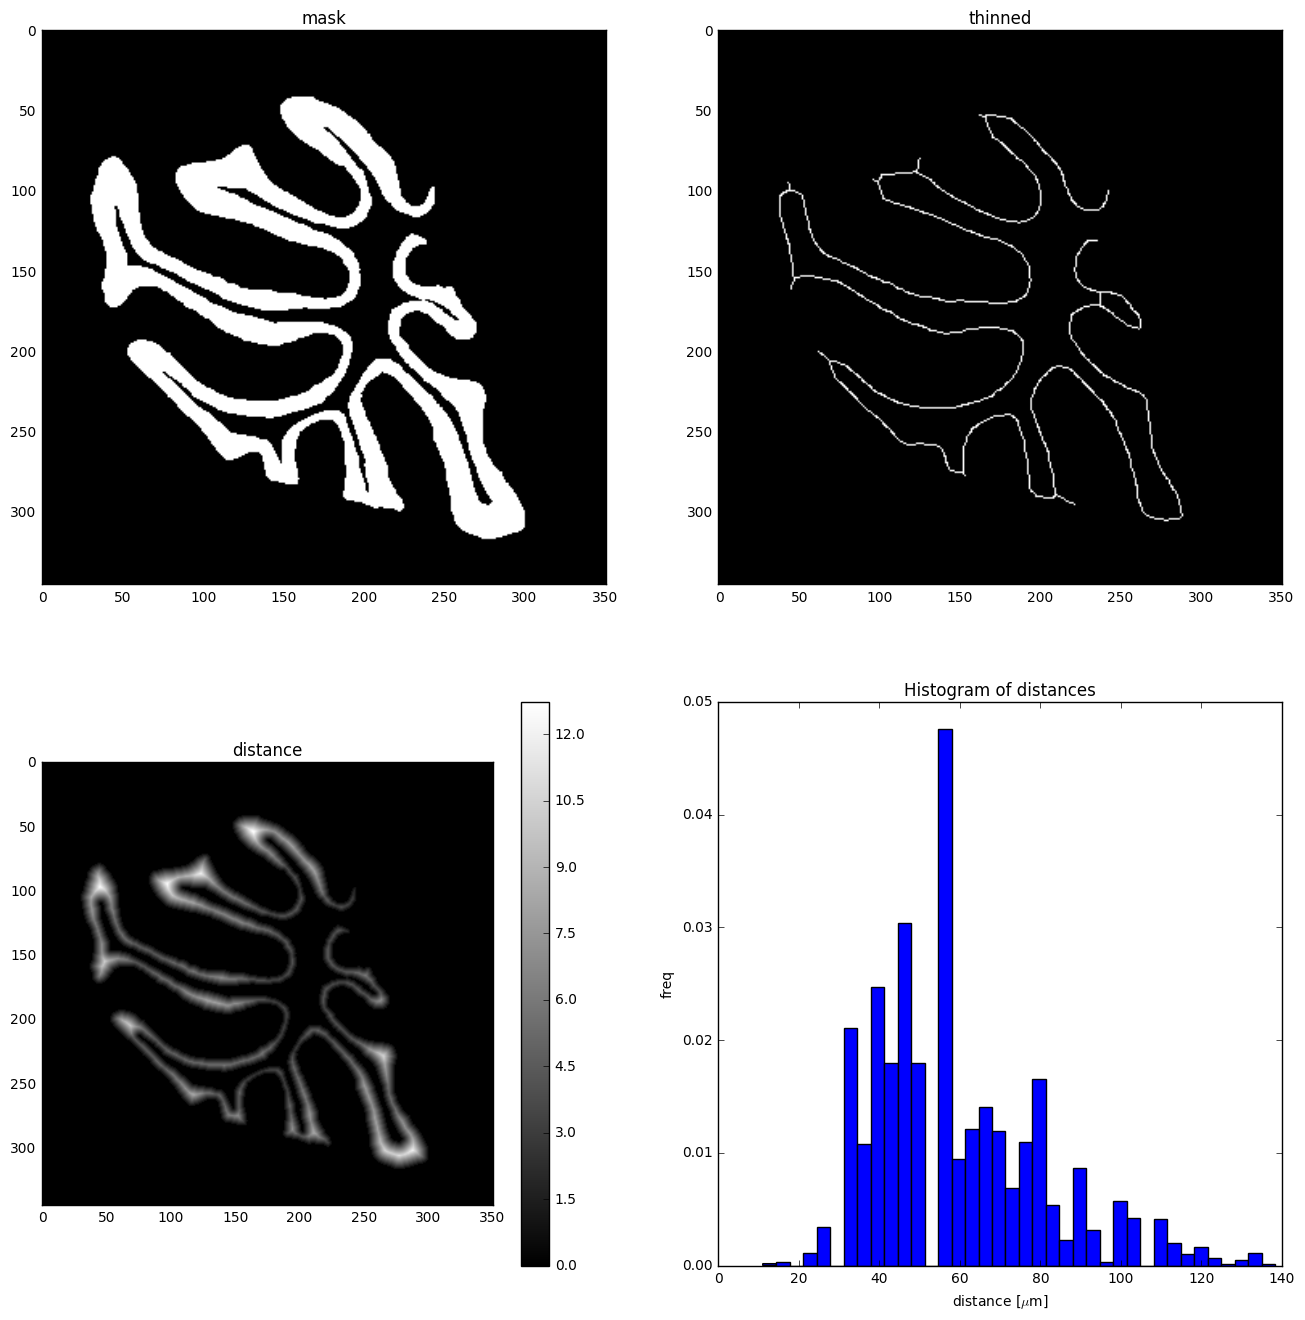

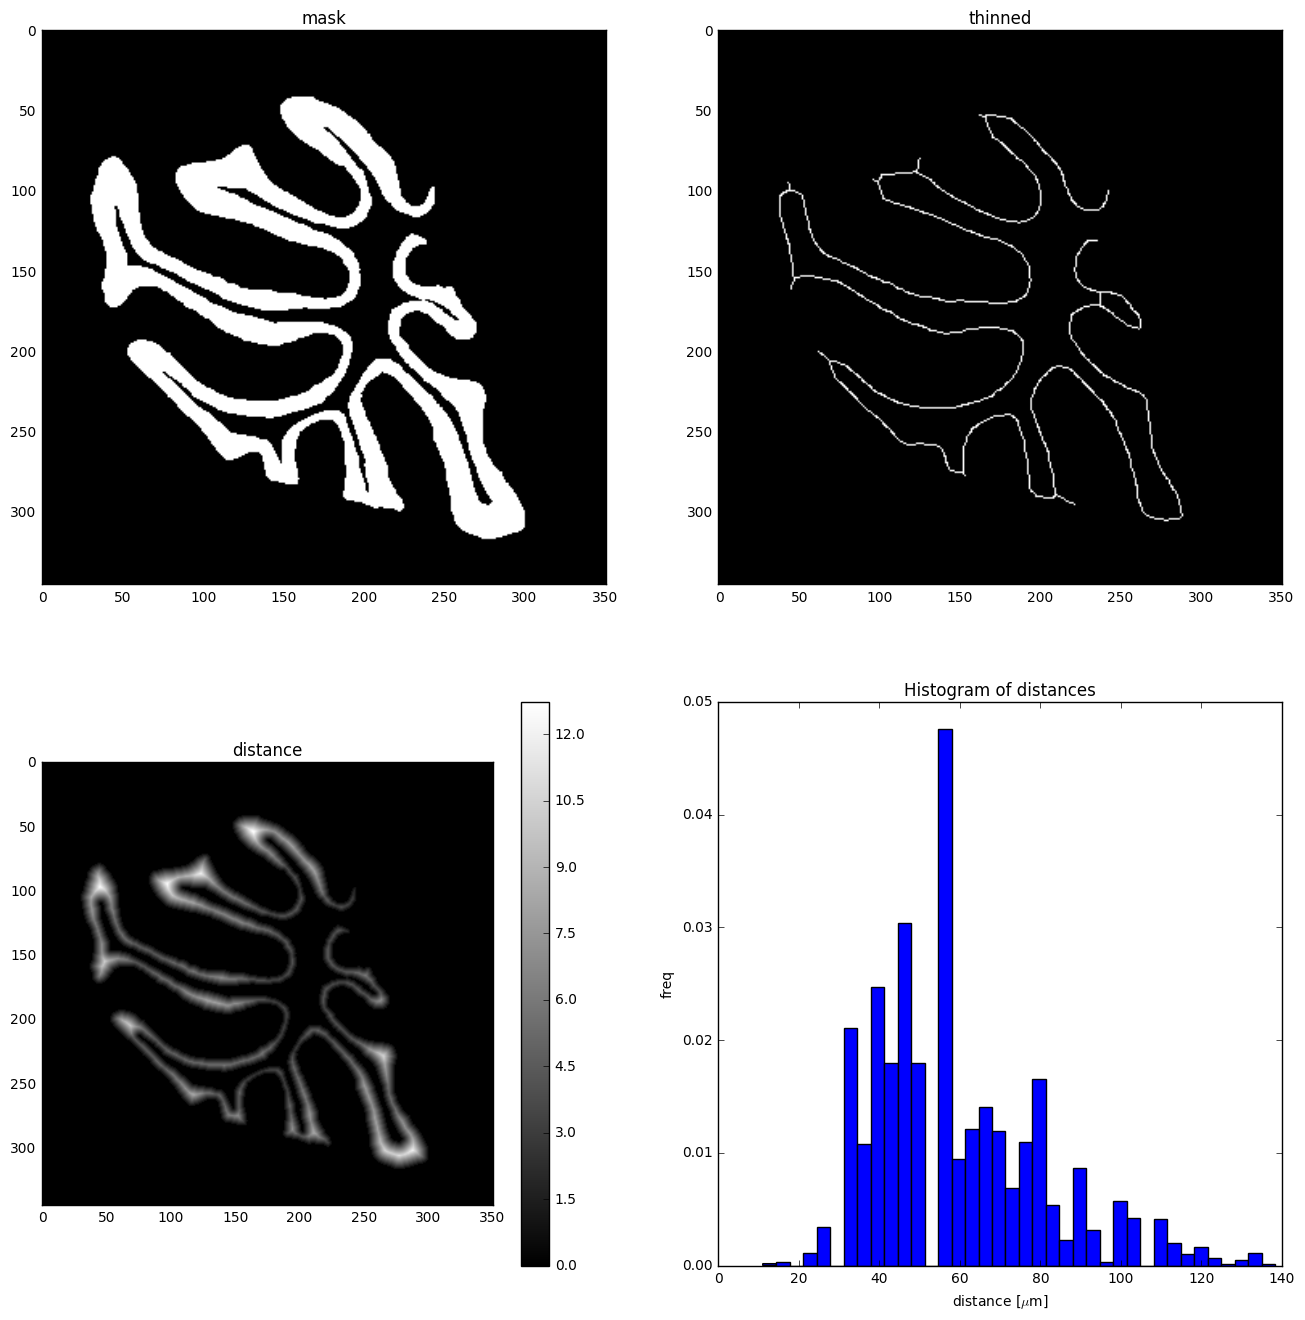

In [17]:
for mask in results:
    plt.figure(figsize=(16,16))
    plt.subplot(221)
    plt.title('mask')
    plt.imshow(mask_bw,cmap='gray')
    plt.subplot(222)
    plt.title('thinned')
    plt.imshow(bw2,cmap='gray')
    plt.subplot(223)
    plt.title('distance')
    plt.imshow(dist,cmap='gray')
    plt.colorbar()
    plt.subplot(224)
    #n, bins, patches = 
    plt.hist(th_values,bins=int(np.ceil(1.87*len(th_values-1)**0.4)),normed=1, histtype='bar')
    plt.title('Histogram of distances')
    plt.xlabel(r'distance [$\mu$m]')
    #plt.text(0.6,0.2,r'$\mu$ = {0:.2f} | $\sigma$ = {1:.2f}'.format(results[mask][0],results[mask][1]))
    plt.ylabel('freq')
    plt.savefig(result_dir+mask+'_sp.png');

In [18]:
masks

['./masks_170719/Mask7-3a-1.tif',
 './masks_170719/BOX3-3 - DAPImask.tif',
 './masks_170719/BOX2-4 - DAPImask.tif',
 './masks_170719/Mask7-3-1.tif',
 './masks_170719/Mask10-6a-2.tif',
 './masks_170719/_BOX10-7__TUNEL_HOECST_01_01 - DAPImask.tif',
 './masks_170719/_BOX9-5__TUNEL_HOECST_01_01 - DAPImask.tif',
 './masks_170719/_BOX1-2__TUNEL_HOECST_01_01 - DAPImask.tif',
 './masks_170719/Mask6-2a-2.tif',
 './masks_170719/Mask7-3-2.tif',
 './masks_170719/BOX4-2 - DAPI mask.tif',
 './masks_170719/_BOX4-1__TUNEL_HOECST_01_01 - DAPI mask.tif',
 './masks_170719/_BOX3bis-3__TUNEL_HOECST_01_01 - DAPI mask.tif',
 './masks_170719/BOX1-1 - DAPImask.tif',
 './masks_170719/Mask6-2bis.tif',
 './masks_170719/BOX10-7 DAPI mask.tif',
 './masks_170719/Mask10-6-1.tif',
 './masks_170719/_BOX1-5__TUNEL_HOECST_01_01 - DAPImask.tif',
 './masks_170719/BOX5-1 DAPI mask.tif',
 './masks_170719/BOX8-4 - DAPI mask.tif',
 './masks_170719/_BOX3-4__TUNEL_HOECST_01_01 - DAPImask.tif',
 './masks_170719/Mask3-4-1.tif',
 '

In [19]:
import pprint

In [20]:
pprint.pprint(results)

{'BOX1-1 - DAPImask': (69.534309, 26.664473, 1061),
 'BOX1-2 - DAPImask': (59.345303, 21.32852, 1826),
 'BOX10-7 DAPI mask': (52.734959, 22.148426, 1309),
 'BOX2-4 - DAPImask': (59.053474, 25.102726, 1425),
 'BOX3-3 - DAPImask': (55.123974, 22.890474, 1403),
 'BOX3-5- DAPI mask': (58.738091, 24.7642, 1834),
 'BOX4-2 - DAPI mask': (56.527126, 24.752352, 1968),
 'BOX5-1 DAPI mask': (48.783985, 21.140888, 1279),
 'BOX7-3-DAPImask': (48.745796, 16.6047, 1065),
 'BOX8-4 - DAPI mask': (48.907688, 19.690081, 1378),
 'BOX9-5 DAPI mask': (51.075939, 20.843378, 1269),
 'Mask10-6-1': (56.150646, 21.777122, 1418),
 'Mask10-6-2': (56.641079, 24.972195, 1440),
 'Mask10-6a-1': (61.364601, 24.605206, 1532),
 'Mask10-6a-2': (59.279774, 22.555094, 1501),
 'Mask3-4': (58.37431, 23.342072, 1562),
 'Mask3-4-1': (57.679359, 22.434418, 1480),
 'Mask3-4a-1': (61.86076, 22.639557, 1457),
 'Mask6-2a-1': (58.634186, 22.21653, 1276),
 'Mask6-2a-2': (56.604553, 20.613455, 1416),
 'Mask6-2bis': (55.543636, 23.63481